# Hoover Dam Seismology Project
## Authors: Luke Mazza, Justin Ball

Note About the Authors:
This notebook was written,formatted, and coded by Luke Mazza. The main source of oversight, data analysis, and bug-fixing on this project was Justin Ball. Dr. Ball was a crucial addition to this project and it would not have been possiblee without him. 

# Introduction

### Hoover Dam consists of six different sensor groups, each one with a unique set of sensors and dataloggers. The cables connecting these sensors and loggers have been suspected of altering the signal transmitted between the two devices. This can lead to inaccurate signals being recorded on the data logger. The electrical properties of these cables, which can lead to input signals from the sensors being misconstrude, can be evaluated from a series of signal processing methods. These methods follow the order of:
    - Waveform Amplitude Filtering
    - Waveform Alignment through Cross Correlation
    - Signal extraction from alingned waveforms
    - Implementation of Fourier Transforms on extracted signals
    - spectral ratio analysis of atlogger and atsensor fourier signals
    - polynomial regression modeling of spectral ratio plots

### This notebook will explore the listed methods and also serve as a resource for those who desire to analyze behavior of electrical systems that make up a seismic data system. 
### Towards the end of this notebook, there will be an additional exploration into seismic subspace detection, a method of extracting signals of interest based on a pre-built waveform template. 

# The HOVR seismic Data format 

## All data collected from the HOVR dam is assorted in a directory tree format of HOOVERCALS -> Atlogger/Atsensorite -> {Station} -> {Channel} -> {location_code} -> {data}, where atlogger/atsensorsite are the dataloggers or sensors. 

## Obspy, a python third party module, is the main method we will be using to open these seismic files, which come in .sac format. Reading a file follows as:

In [ ]:
#Import Neccessarry libraries
from obspy import read
import numpy as np
import matplotlib.pyplot as plt

A stream is the main data source extracted from these sac files. A stream is composed of 'traces' which explore different parts of the waveform. Traces can be simply extracted by simply indexing a stream. EX: st = [tr0,tr1]

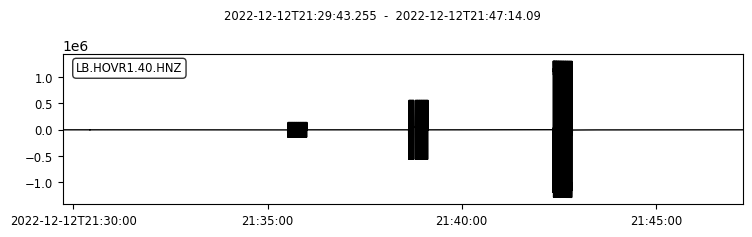

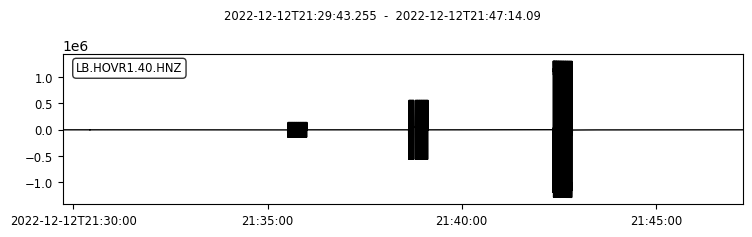

In [62]:
sac = read('Hoover_cals/HooverCals/Atsensorsite/HOVR1/HNZ.D/346/LB.HOVR1.40.HNZ.D.2022.346.21')
sac.plot()

### Let's investigate a trace contained with the above stream and use matplotlib to display it using tr.data

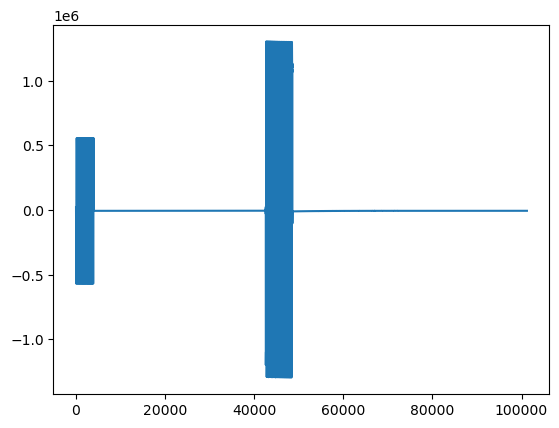

In [67]:
tr = sac[1]
info = tr.data
plt.plot(info)
plt.show()
#Rightmost part of the initial stream

In [68]:
tr.stats
#tr.stats contain useful info like dates and station/channel info

         network: LB
         station: HOVR1
        location: 40
         channel: HNZ
       starttime: 2022-12-12T21:38:48.000000Z
         endtime: 2022-12-12T21:47:14.090000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 101219
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 268, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 278528})

# Amplitude Filtering

### The waveforms we will be investigate are calibration signals generated by the sensors and data loggers at hoover dam. The signals of interest we want to experiment with are the ones with the highest amplitude in a given trace. We are going to implement a basic amplitude filter, which zeros out all data points lower than the max value of the trace. A threshold of -30000 is implemented to decrease the sensitivity of the signal. 

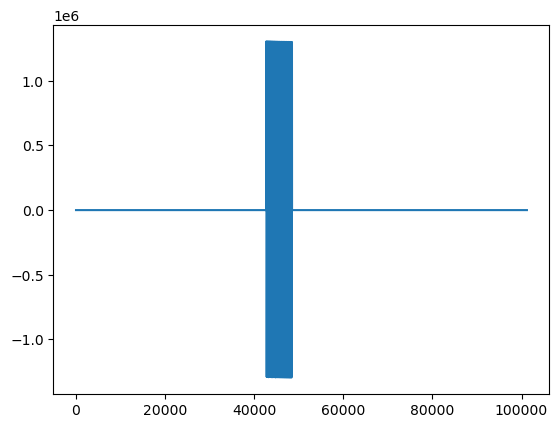

In [72]:
threshold = np.max(info) - 30000
good_info = np.where(np.abs(info) >=threshold, info, info*0)
plt.plot(good_info)
plt.show()

# Atlogger and Atsensorsite Waveform cross correlation/alignment

### To properly take spectral ratios (dividing out) of the signals from our two systems, we need to align their recorded waveforms. This can be done through a process called cross-correlation. Cross Correlation is taking a part of a waveform, sliding it across another different whole waveform, and recording where they match the most. A parameter known as the shift is returned by this. The shift tells us how much distance one waveform needs to be shifted to be lined up with the input. 

### We will first run through the cross correlation for the atlogger system, where our correlation waveforms will be a few external sample calibration signals. Once the code is done running, it will return a dicitonary filled with the atlogger correlation signals we will use on atsensor. More details of this process will be shown in the code.

In [91]:
#Import Neccessary Libraries
import obspy as ob
from scipy import signal
from obspy import read
from os import fsencode as fse
from os import fsdecode as fsd
from os import listdir as ld
from obspy.core import Trace,Stream
from obspy.signal.invsim import cosine_taper
import matplotlib.pyplot as plt
import numpy as np
from cmath import exp
import math
from matplotlib.ticker import ScalarFormatter
def abs2(x):
    return x.real**2 + x.imag**2
from numpy import float64
import pandas as pd
from numpy import mean, sqrt, square, arange
from obspy.signal.cross_correlation import correlate, xcorr_max
from obspy.signal.filter import envelope
from obspy.signal.util import smooth
import plotly
import plotly.express as px

HOVR
1 Trace(s) in Stream:
LE.HOVR.30.EN1 | 2022-12-13T19:56:32.160000Z - 2022-12-13T20:00:00.465000Z | 200.0 Hz, 41662 samples
1 Trace(s) in Stream:
LE.HOVR.30.EN1 | 2022-12-13T20:00:00.470000Z - 2022-12-13T20:09:54.180000Z | 200.0 Hz, 118743 samples


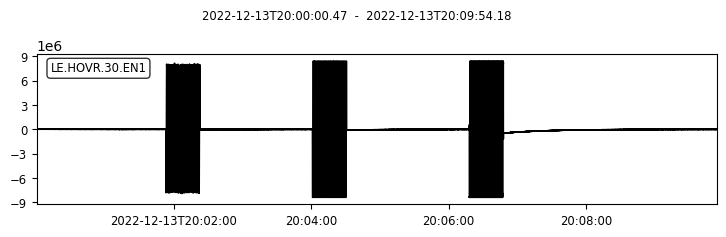

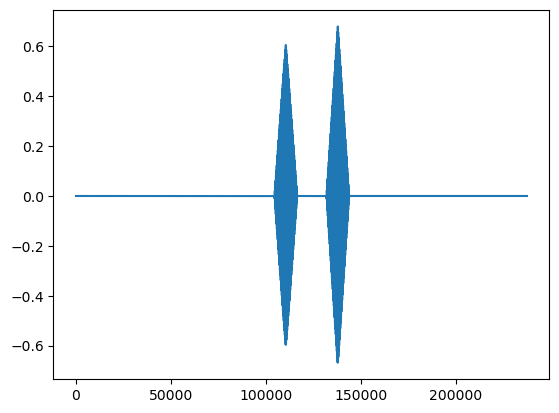

Shift and correlation values: 19135 0.6796494501744231


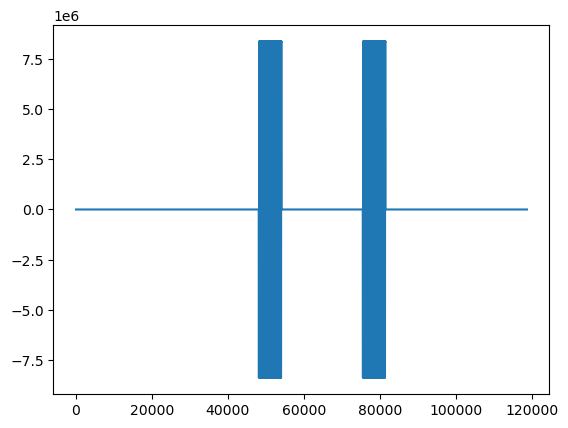

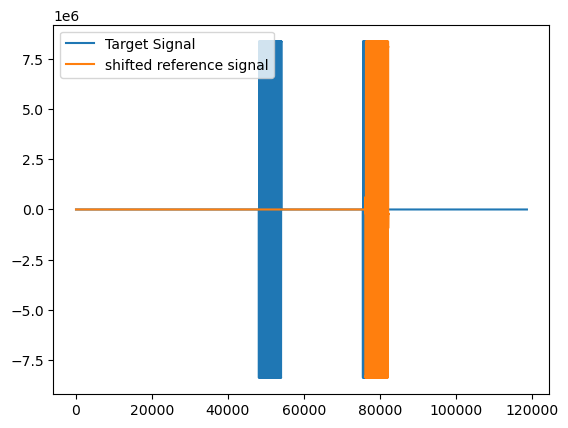

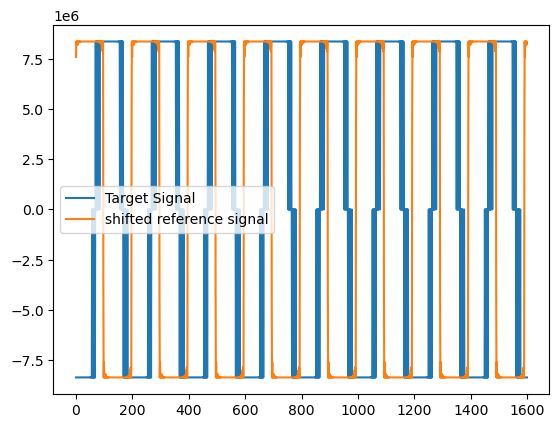

1 Trace(s) in Stream:
LE.HOVR.30.EN2 | 2022-12-13T19:56:32.350000Z - 2022-12-13T20:00:00.210000Z | 200.0 Hz, 41573 samples
1 Trace(s) in Stream:
LE.HOVR.30.EN2 | 2022-12-13T20:00:00.215000Z - 2022-12-13T20:09:54.260000Z | 200.0 Hz, 118810 samples


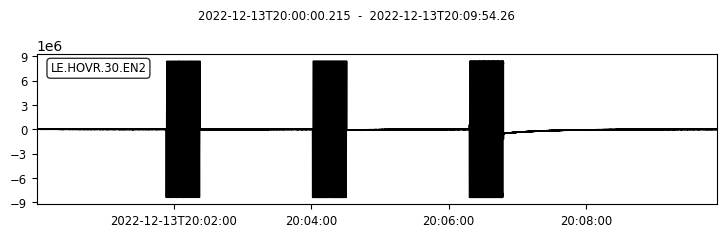

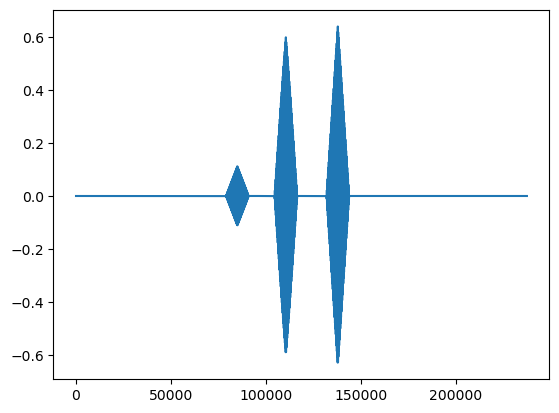

Shift and correlation values: 19152.5 0.6392614536566439


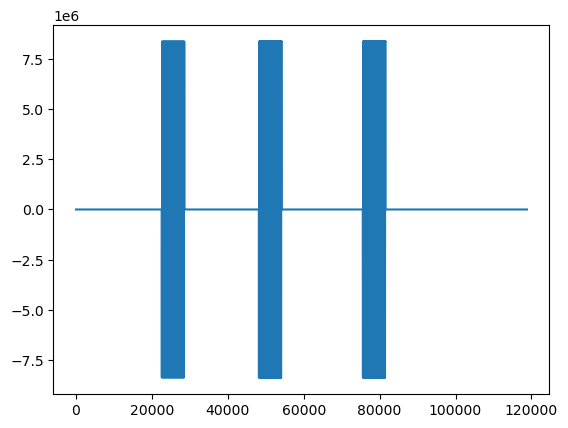

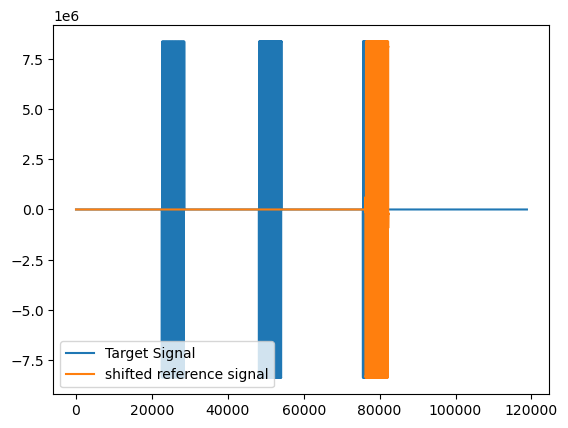

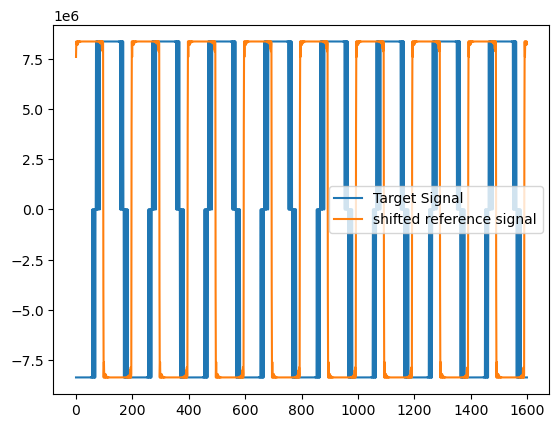

1 Trace(s) in Stream:
LE.HOVR.30.ENZ | 2022-12-13T19:56:32.105000Z - 2022-12-13T20:00:00.670000Z | 200.0 Hz, 41714 samples
1 Trace(s) in Stream:
LE.HOVR.30.ENZ | 2022-12-13T20:00:00.675000Z - 2022-12-13T20:09:53.840000Z | 200.0 Hz, 118634 samples


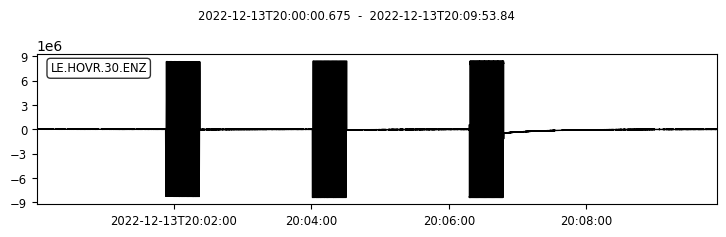

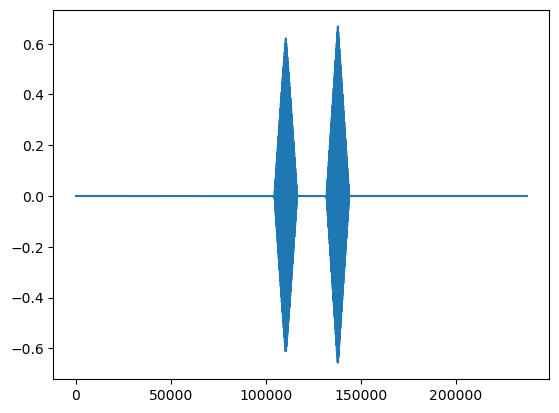

Shift and correlation values: 19148.5 0.6678242710545961


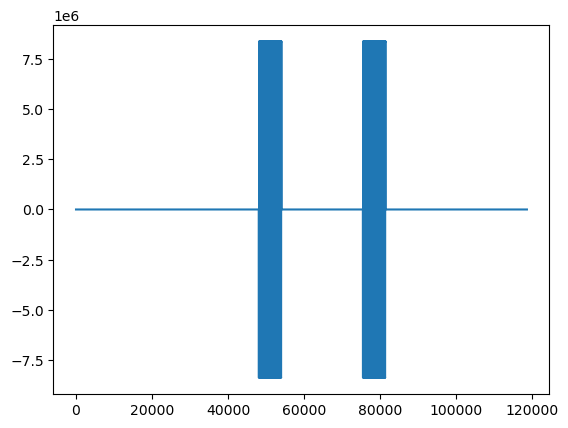

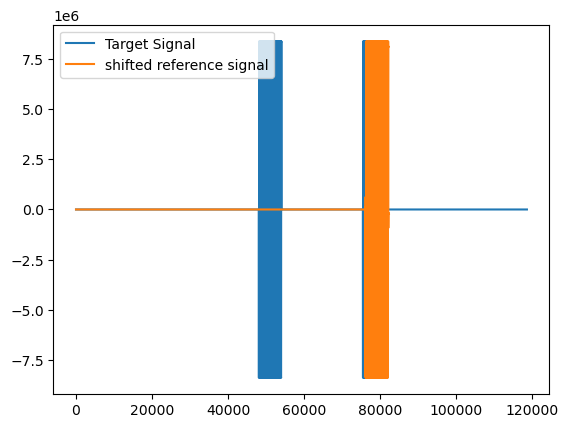

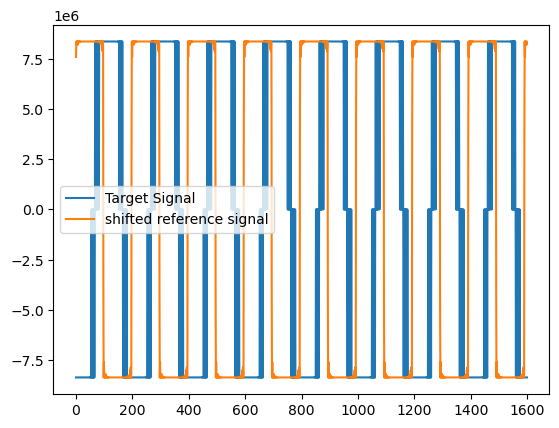

HOVR1
1 Trace(s) in Stream:
LE.HOVR1.40.EN1 | 2022-12-13T21:31:54.215000Z - 2022-12-13T21:43:43.075000Z | 200.0 Hz, 141773 samples


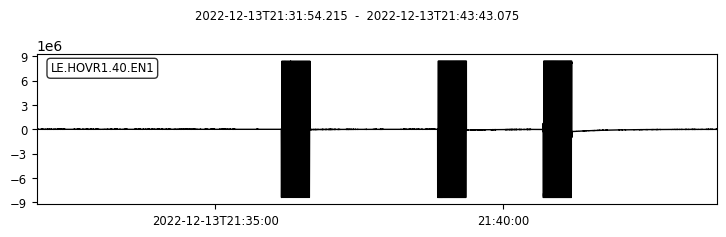

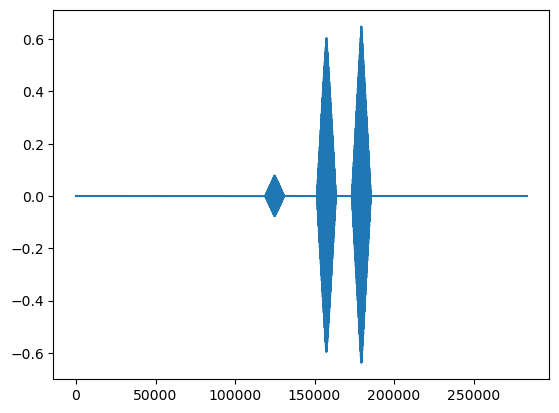

Shift and correlation values: 37671 0.6483909905187837


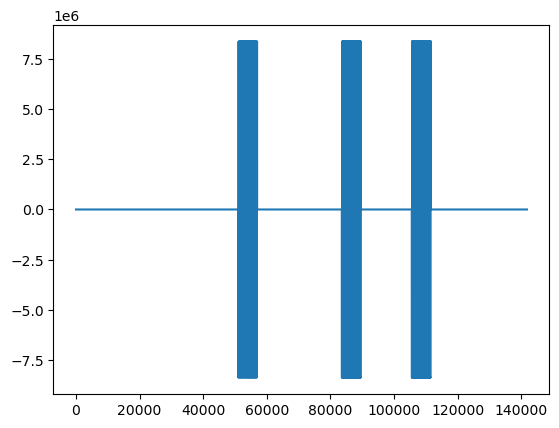

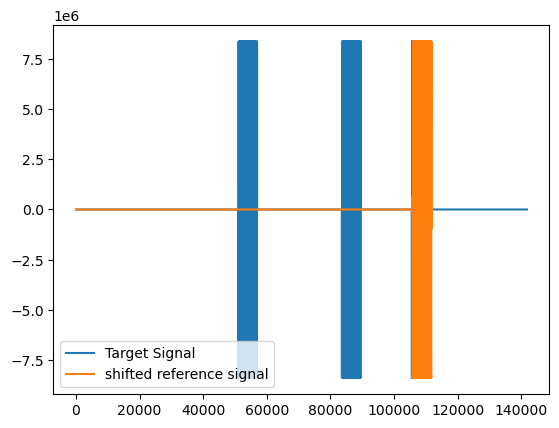

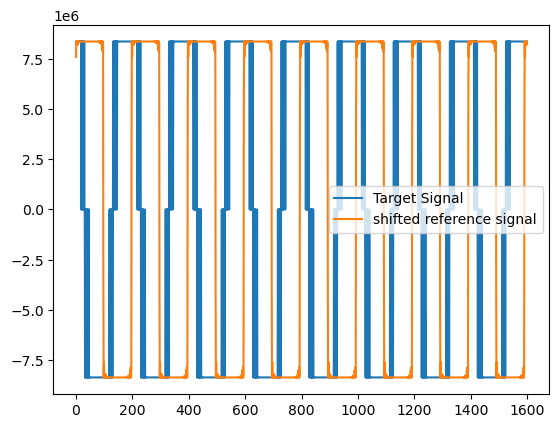

1 Trace(s) in Stream:
LE.HOVR1.40.EN2 | 2022-12-13T21:31:54.250000Z - 2022-12-13T21:43:43.050000Z | 200.0 Hz, 141761 samples


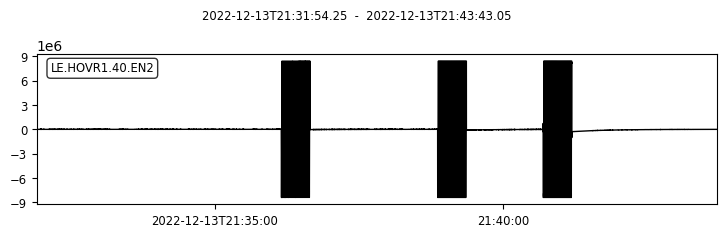

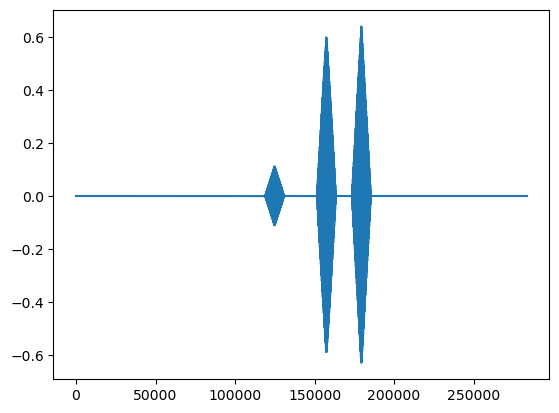

Shift and correlation values: 37670 0.6395353435446326


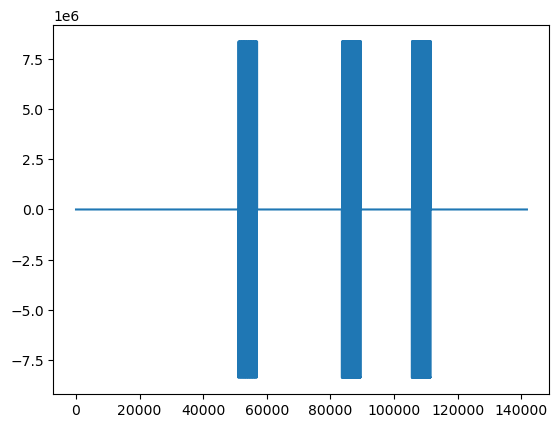

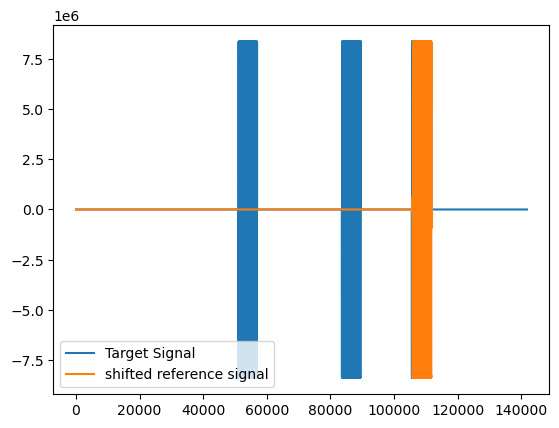

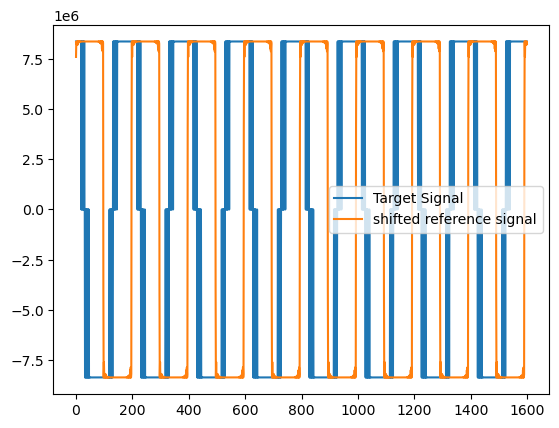

1 Trace(s) in Stream:
LE.HOVR1.40.ENZ | 2022-12-13T21:31:54.195000Z - 2022-12-13T21:43:43.255000Z | 200.0 Hz, 141813 samples


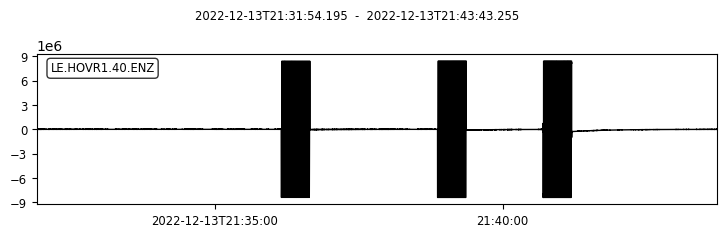

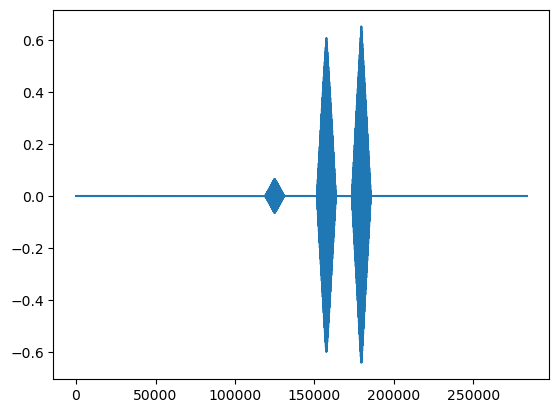

Shift and correlation values: 37655 0.6514122024366649


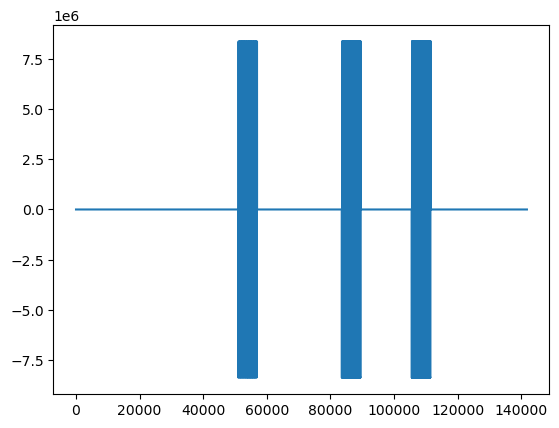

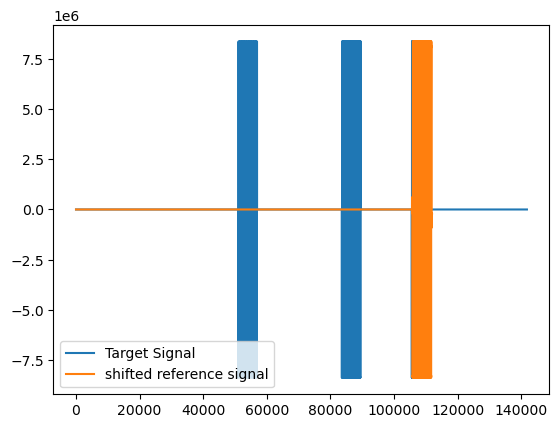

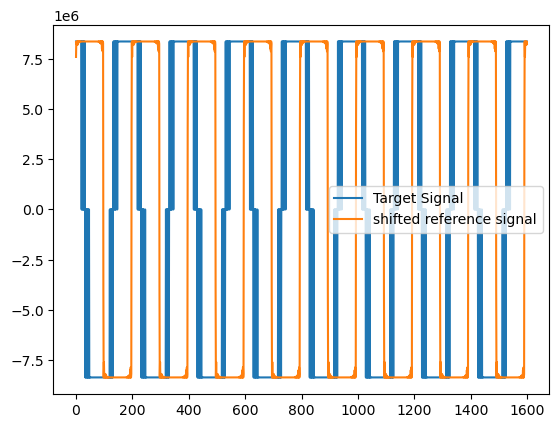

HOVR2
1 Trace(s) in Stream:
LE.HOVR2.11.EN1 | 2022-12-13T21:50:15.150000Z - 2022-12-13T22:00:00.160000Z | 200.0 Hz, 117003 samples
1 Trace(s) in Stream:
LE.HOVR2.11.EN1 | 2022-12-13T22:00:00.165000Z - 2022-12-13T22:00:55.780000Z | 200.0 Hz, 11124 samples
1 Trace(s) in Stream:
LE.HOVR2.11.EN2 | 2022-12-13T21:50:15.150000Z - 2022-12-13T22:00:00.030000Z | 200.0 Hz, 116977 samples
1 Trace(s) in Stream:
LE.HOVR2.11.EN2 | 2022-12-13T22:00:00.035000Z - 2022-12-13T22:00:55.650000Z | 200.0 Hz, 11124 samples
1 Trace(s) in Stream:
LE.HOVR2.11.ENZ | 2022-12-13T21:50:15.150000Z - 2022-12-13T22:00:00.960000Z | 200.0 Hz, 117163 samples
1 Trace(s) in Stream:
LE.HOVR2.11.ENZ | 2022-12-13T22:00:00.965000Z - 2022-12-13T22:00:55.550000Z | 200.0 Hz, 10918 samples
HOVR3
1 Trace(s) in Stream:
LE.HOVR3.32.EN1 | 2022-12-13T21:14:04.955000Z - 2022-12-13T21:25:20.615000Z | 200.0 Hz, 135133 samples
1 Trace(s) in Stream:
LE.HOVR3.32.EN2 | 2022-12-13T21:14:04.820000Z - 2022-12-13T21:25:20.715000Z | 200.0 Hz, 135180

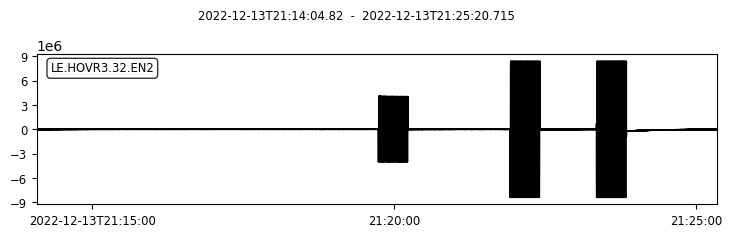

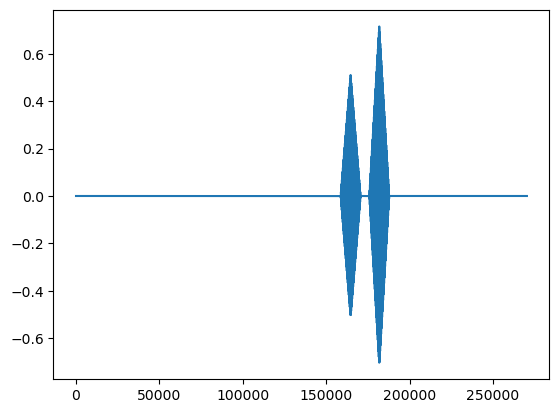

Shift and correlation values: 46646.5 0.7159777450768465


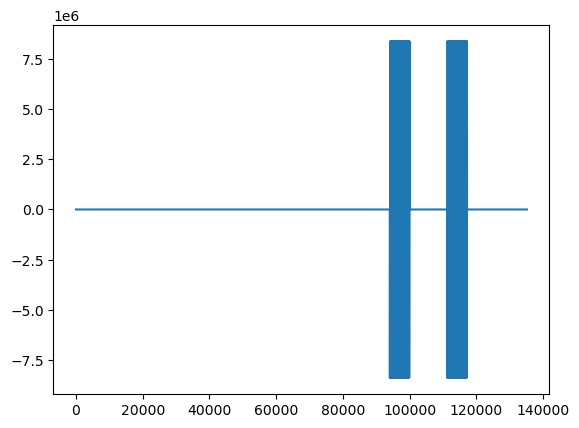

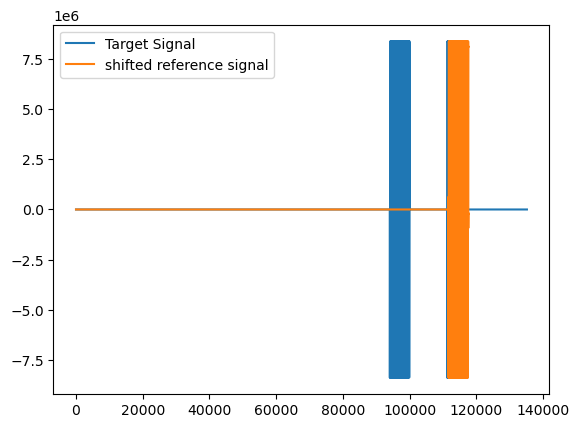

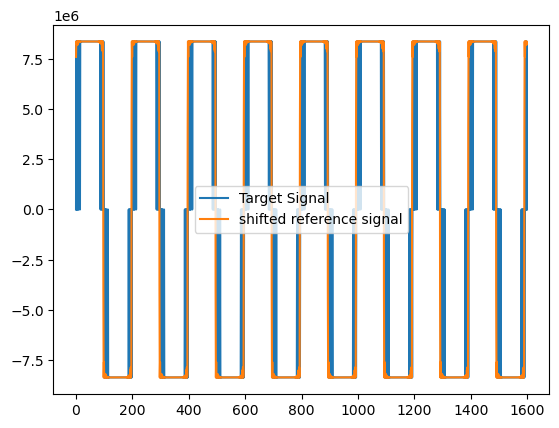

1 Trace(s) in Stream:
LE.HOVR3.32.ENZ | 2022-12-13T21:14:05.080000Z - 2022-12-13T21:25:20.130000Z | 200.0 Hz, 135011 samples


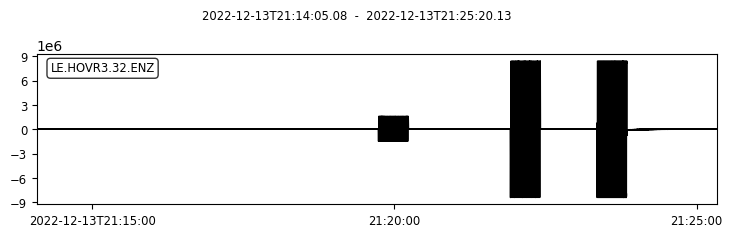

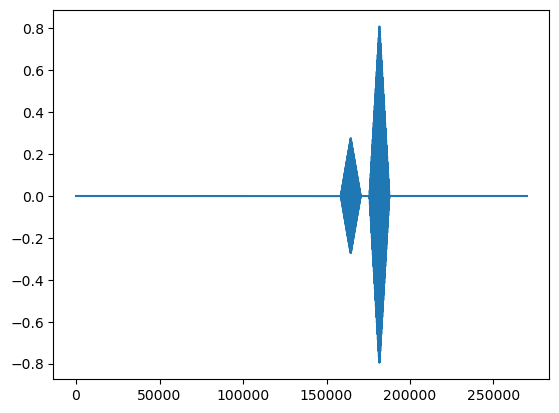

Shift and correlation values: 46679 0.8090582168755724


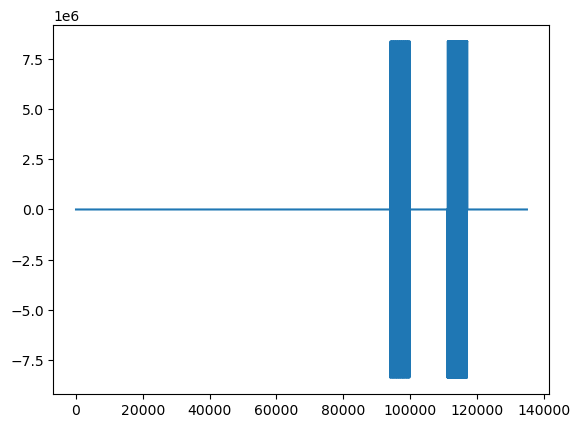

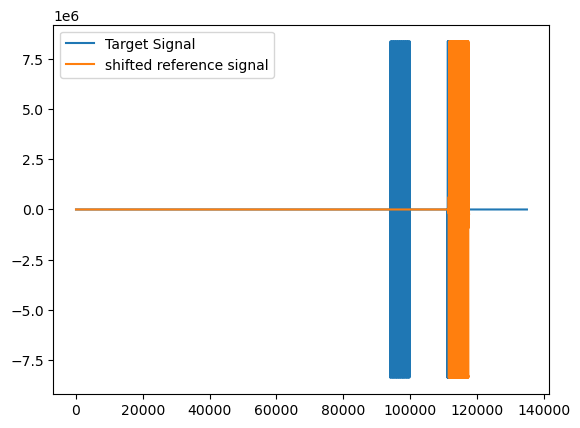

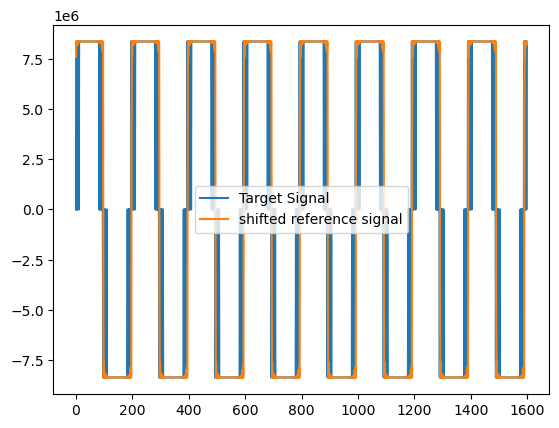

HOVR4
1 Trace(s) in Stream:
LE.HOVR4.42.EN1 | 2022-12-13T22:06:15.330000Z - 2022-12-13T22:24:29.925000Z | 200.0 Hz, 218920 samples


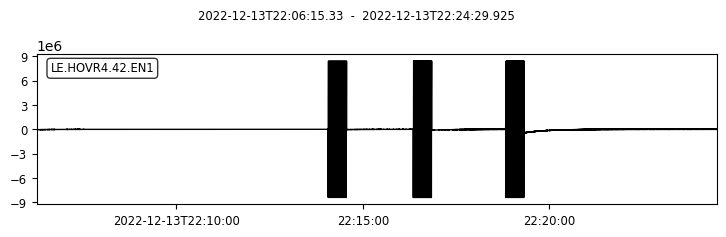

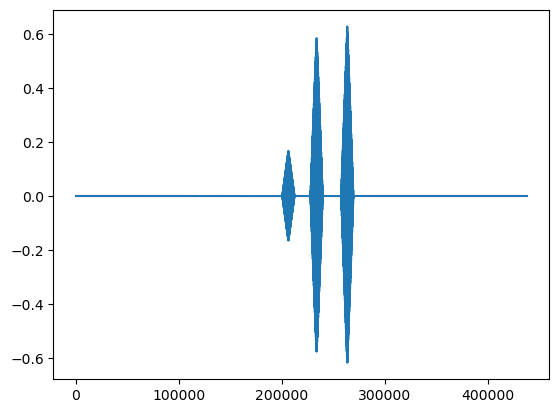

Shift and correlation values: 44474.5 0.6271053253036122


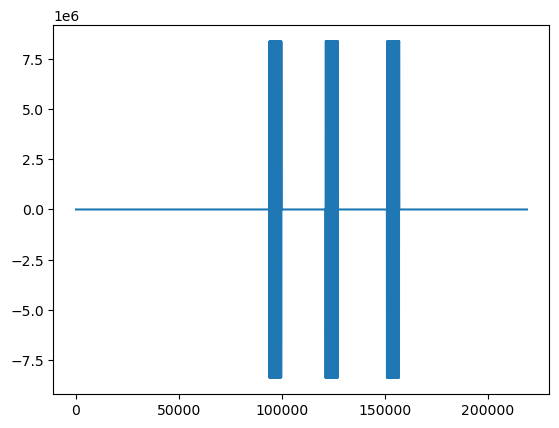

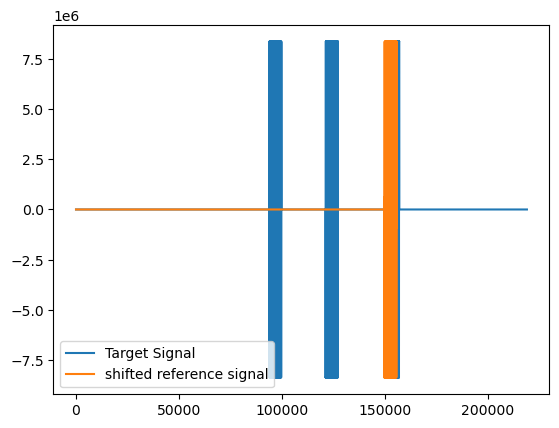

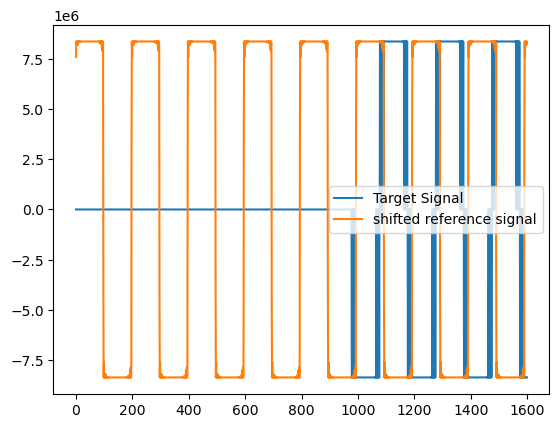

1 Trace(s) in Stream:
LE.HOVR4.42.EN2 | 2022-12-13T22:06:15.355000Z - 2022-12-13T22:24:29.995000Z | 200.0 Hz, 218929 samples


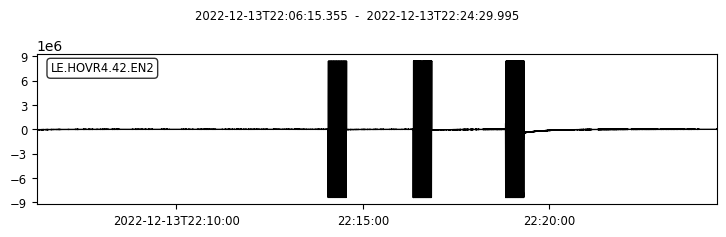

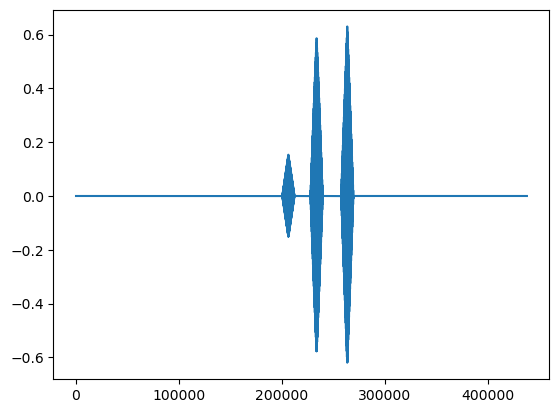

Shift and correlation values: 44465 0.6303089031426067


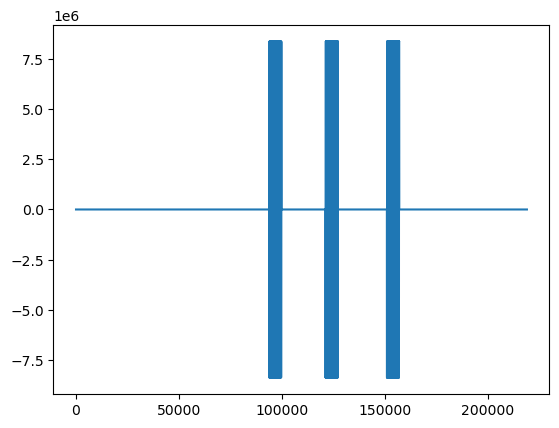

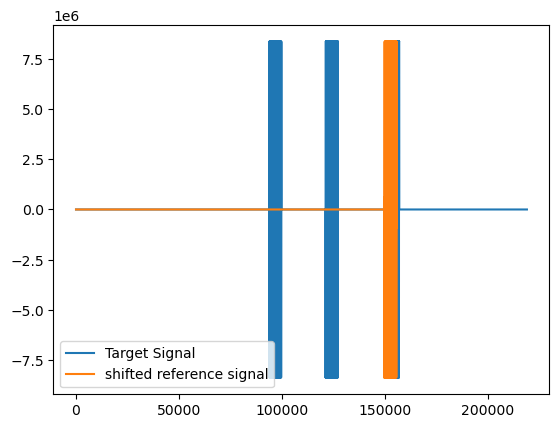

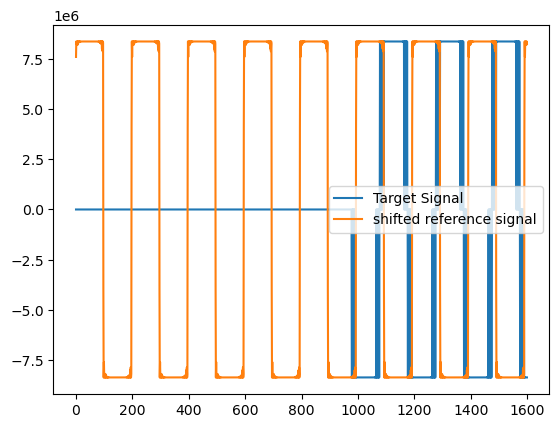

1 Trace(s) in Stream:
LE.HOVR4.42.ENZ | 2022-12-13T22:06:15.410000Z - 2022-12-13T22:24:29.720000Z | 200.0 Hz, 218863 samples


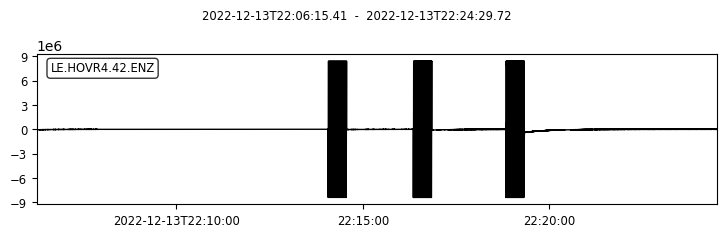

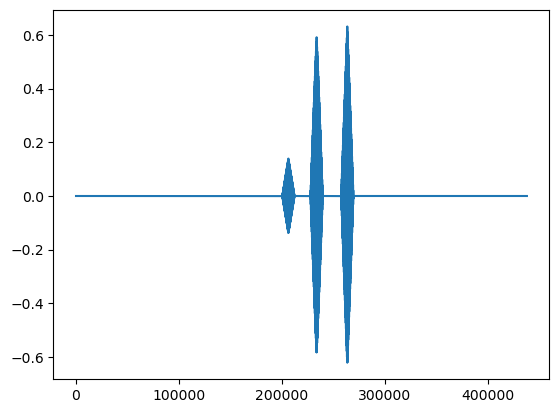

Shift and correlation values: 44487 0.6317262230291755


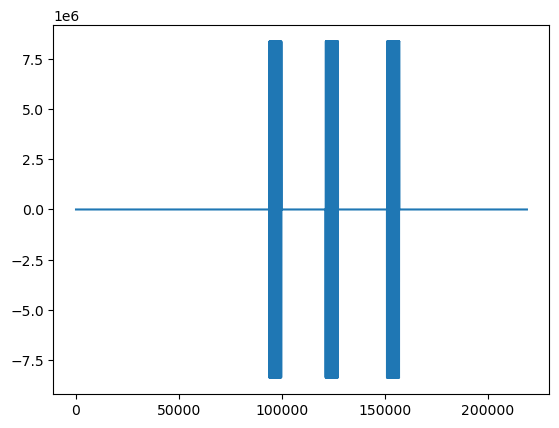

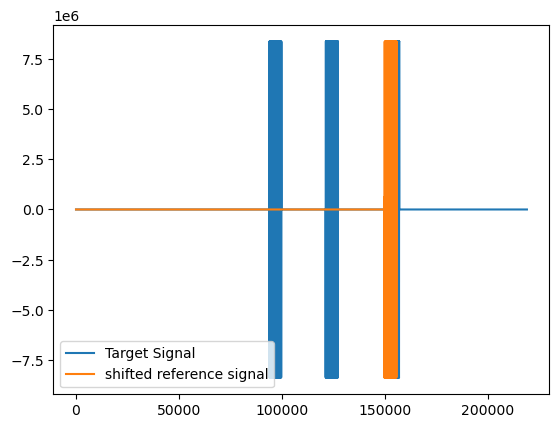

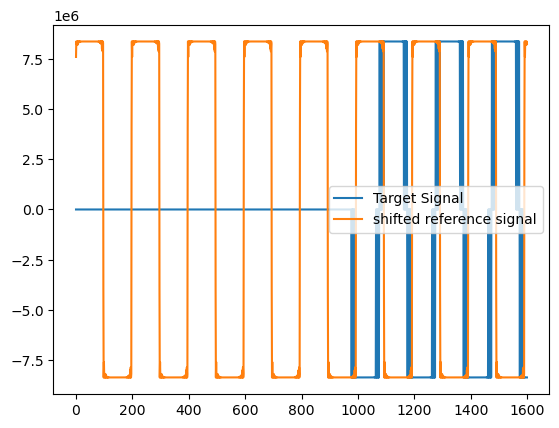

HOVR5
1 Trace(s) in Stream:
LE.HOVR5.50.EN1 | 2022-12-13T20:51:36.500000Z - 2022-12-13T21:00:00.730000Z | 200.0 Hz, 100847 samples


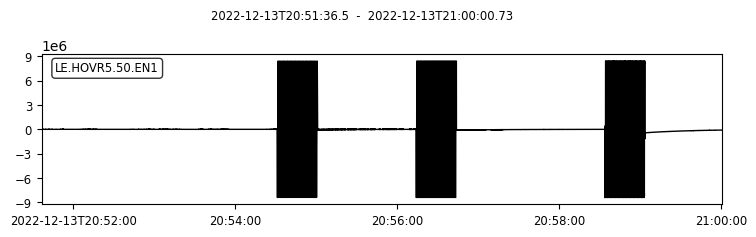

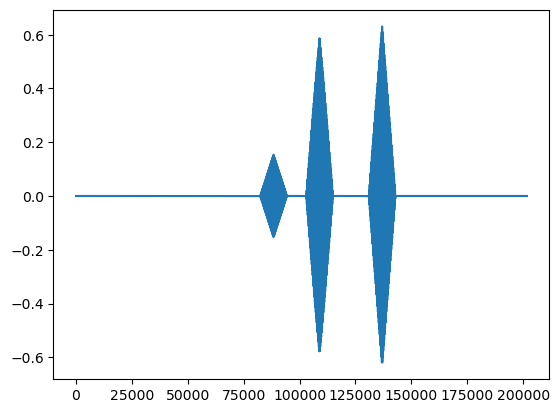

Shift and correlation values: 36077 0.6306579127853164


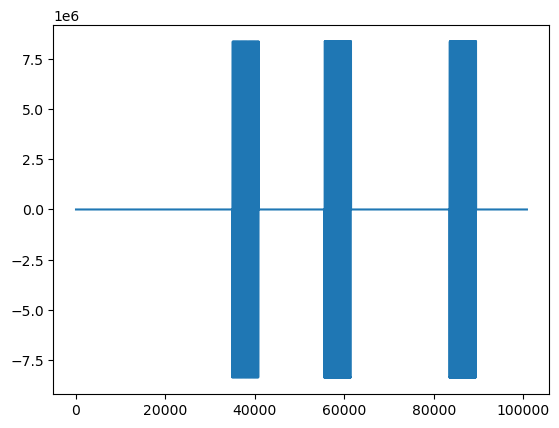

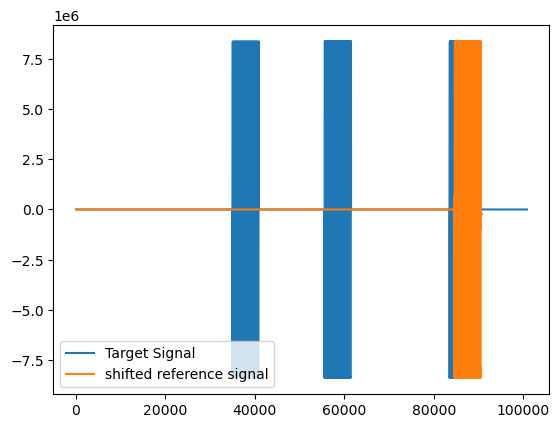

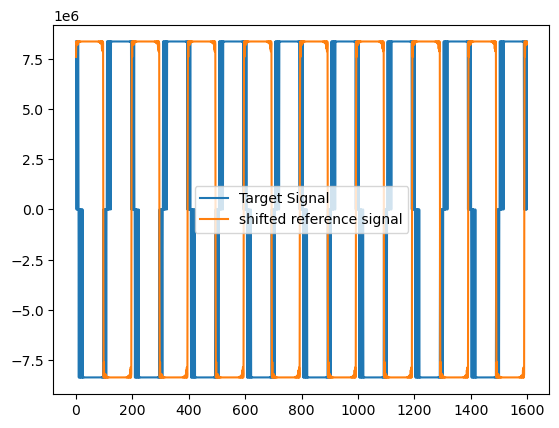

1 Trace(s) in Stream:
LE.HOVR5.50.EN1 | 2022-12-13T21:00:00.735000Z - 2022-12-13T21:01:39.620000Z | 200.0 Hz, 19778 samples
1 Trace(s) in Stream:
LE.HOVR5.50.EN2 | 2022-12-13T20:51:36.515000Z - 2022-12-13T21:00:00.140000Z | 200.0 Hz, 100726 samples


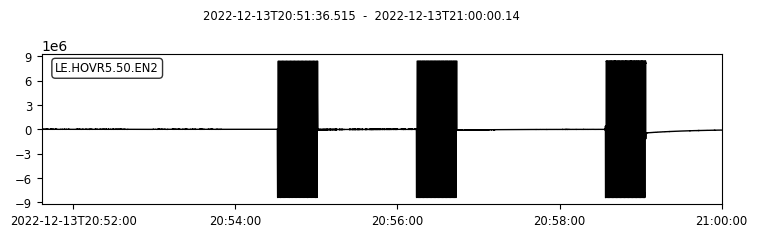

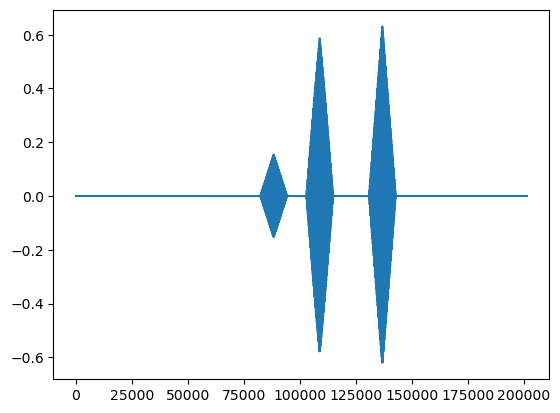

Shift and correlation values: 36134.5 0.6306007150749257


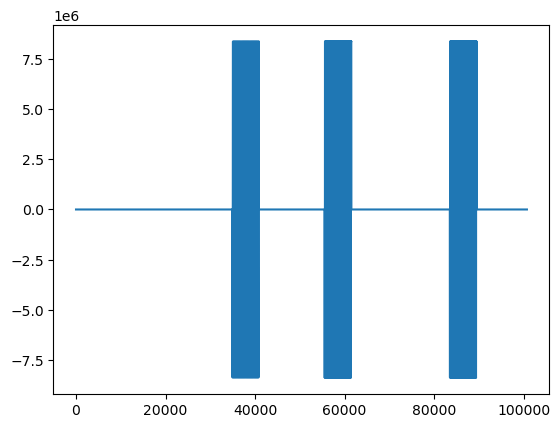

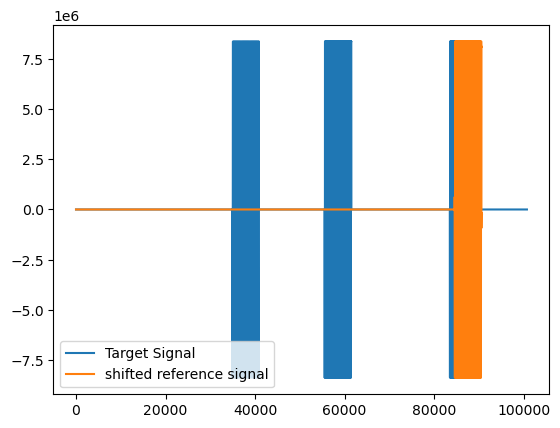

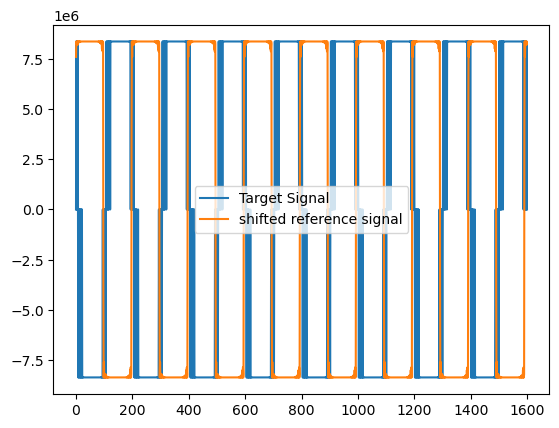

1 Trace(s) in Stream:
LE.HOVR5.50.EN2 | 2022-12-13T21:00:00.145000Z - 2022-12-13T21:01:40.305000Z | 200.0 Hz, 20033 samples
1 Trace(s) in Stream:
LE.HOVR5.50.ENZ | 2022-12-13T20:51:36.520000Z - 2022-12-13T21:00:00.350000Z | 200.0 Hz, 100767 samples


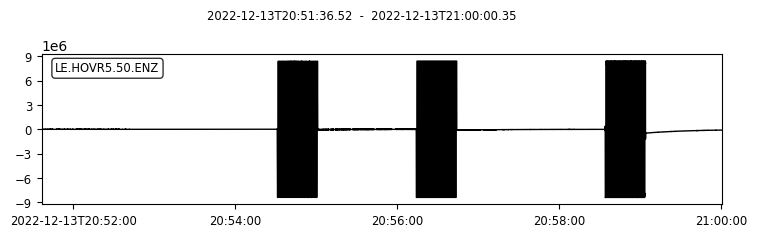

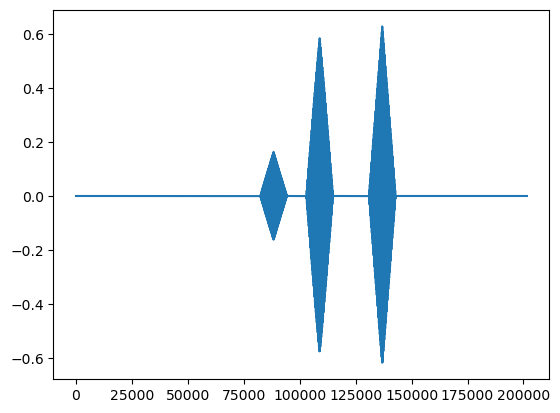

Shift and correlation values: 36113 0.6283879830298844


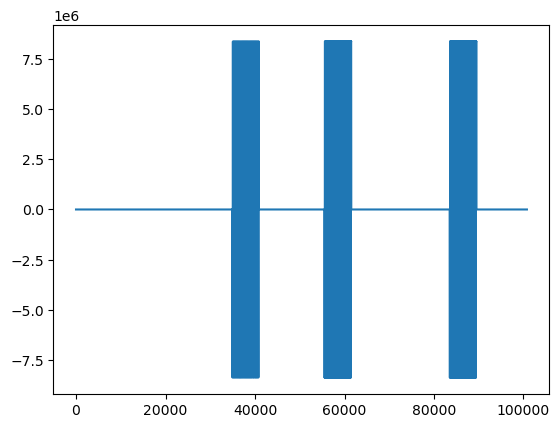

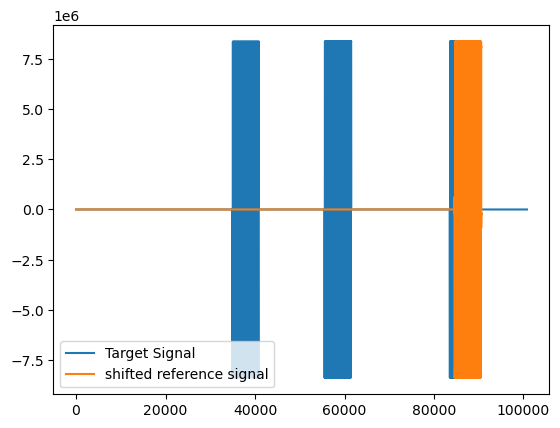

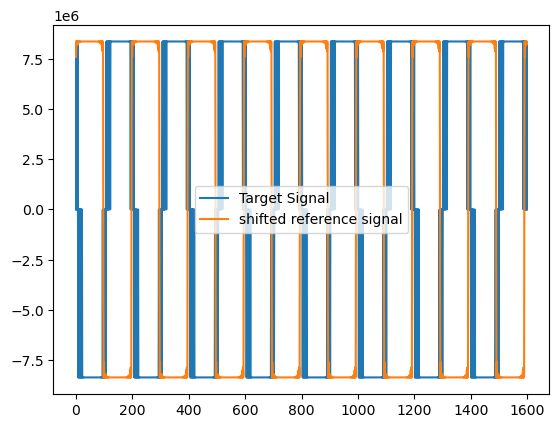

1 Trace(s) in Stream:
LE.HOVR5.50.ENZ | 2022-12-13T21:00:00.355000Z - 2022-12-13T21:01:40.505000Z | 200.0 Hz, 20031 samples
HOVR6
1 Trace(s) in Stream:
LE.HOVR6.52.EN1 | 2022-12-13T20:21:25.460000Z - 2022-12-13T20:35:57.040000Z | 200.0 Hz, 174317 samples


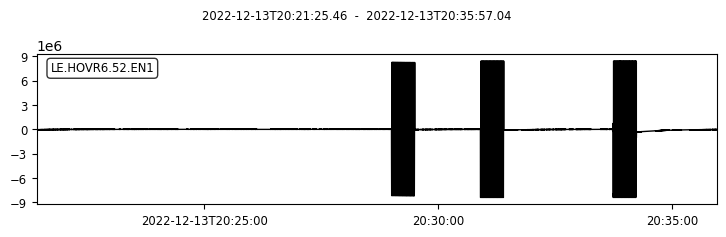

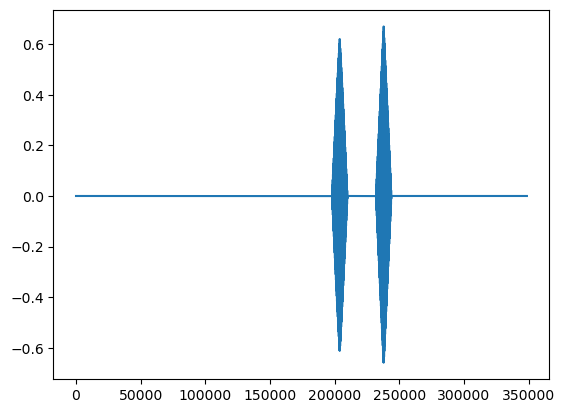

Shift and correlation values: 63550 0.6697844236279927


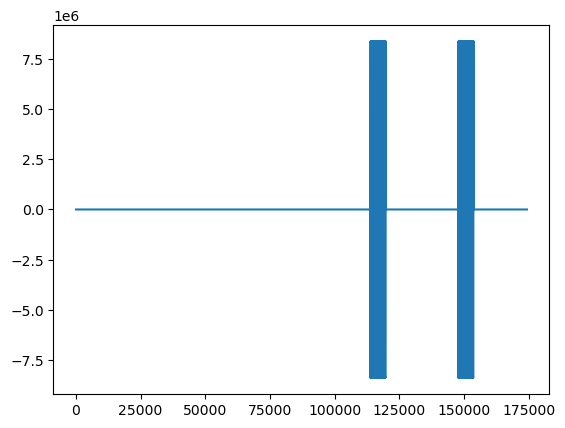

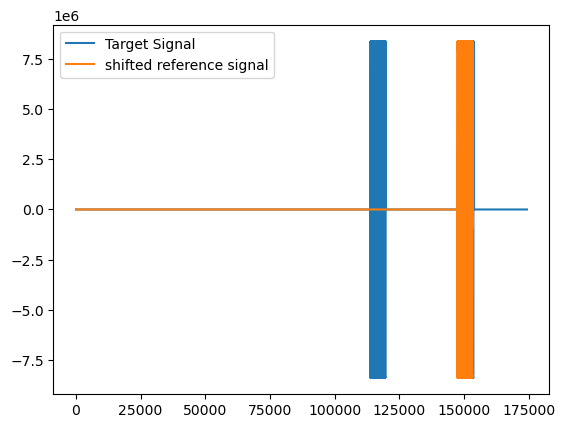

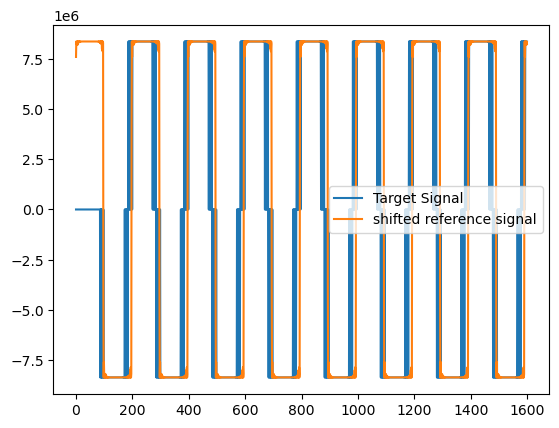

1 Trace(s) in Stream:
LE.HOVR6.52.EN2 | 2022-12-13T20:21:25.485000Z - 2022-12-13T20:35:57.475000Z | 200.0 Hz, 174399 samples


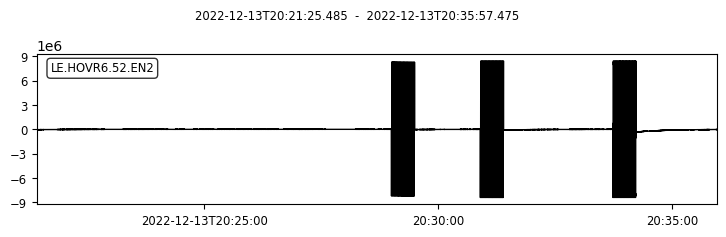

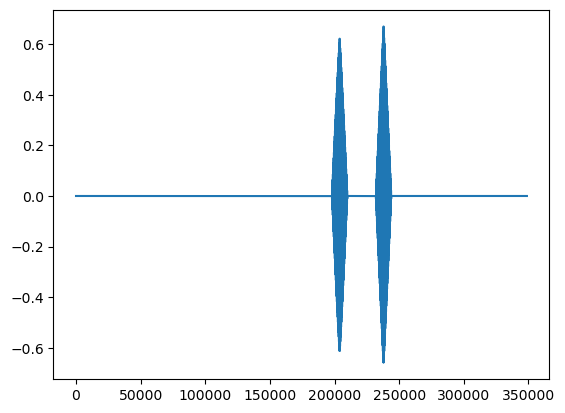

Shift and correlation values: 63504 0.6694515094164765


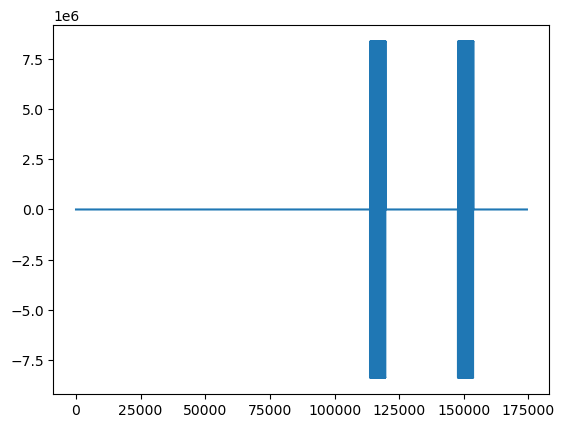

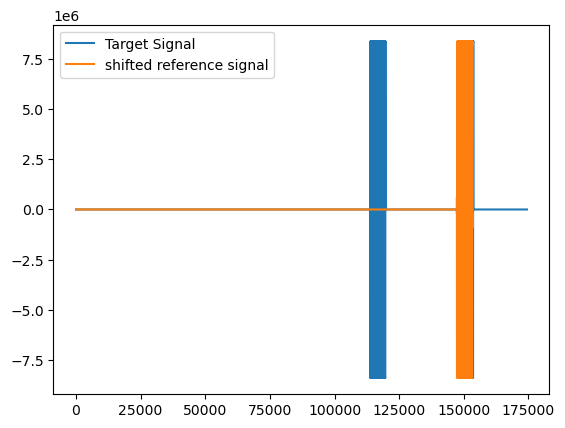

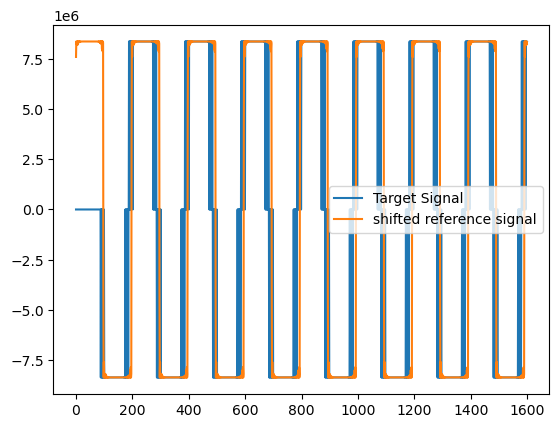

1 Trace(s) in Stream:
LE.HOVR6.52.ENZ | 2022-12-13T20:21:25.505000Z - 2022-12-13T20:35:57.695000Z | 200.0 Hz, 174439 samples


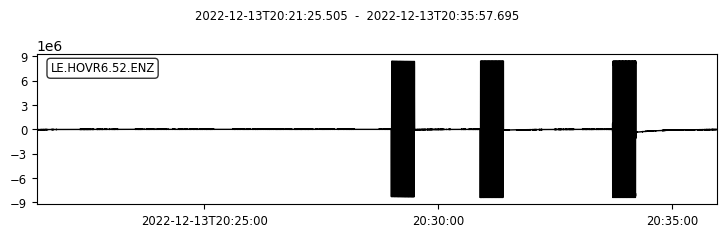

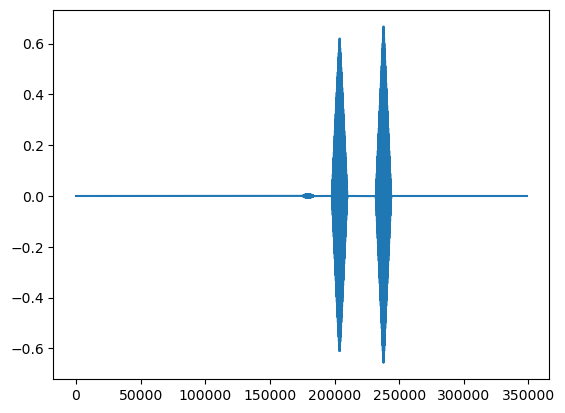

Shift and correlation values: 63480 0.6671661170306001


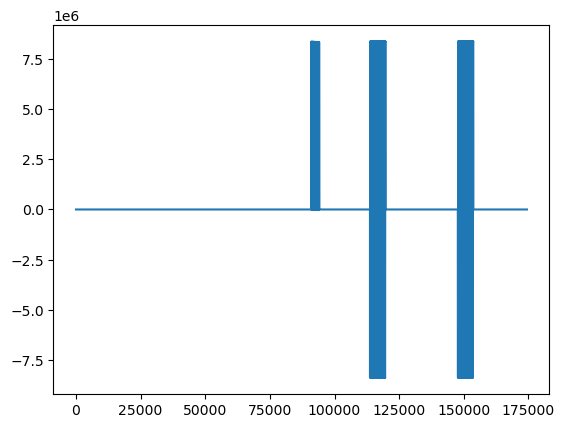

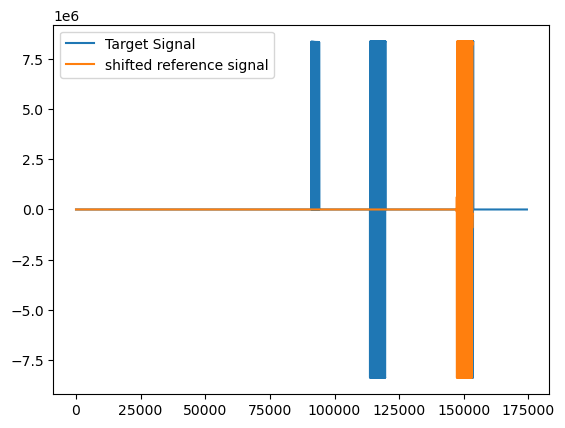

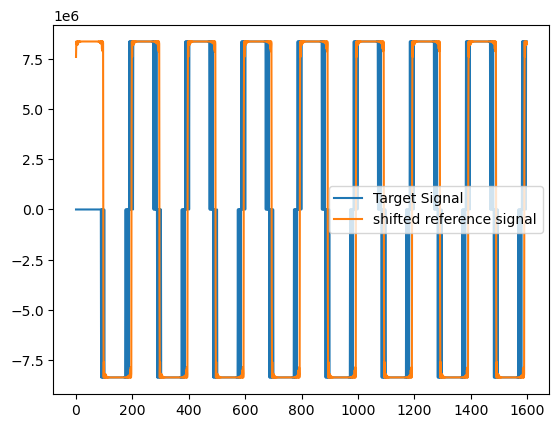

In [104]:
def get_atlogger_references():
    #Encode the top directory 
    directory = fse('Hoover_cals/HooverCals/Atlogger/')
    #Make three reference streams that will be used for cross correlation
    reference = read('LB.HOVR.30.EN1.square.sac')
    reference2 = read('LB.HOVR.30.EN2.square.sac')
    reference3 = read('LB.HOVR.30.ENZ.square.sac')
    reference_correlate_list = [reference[0].data,reference2[0].data,reference3[0].data]
    #List the Files of the Encoded directory
    storage = ld(directory)
    #Make a dictionary that will contain all of the data.
    station_dict = {}
    #Loop through all the entries in the Encoded Directory
    for dir in storage:
        #Decode the directory and encode its contents  
        file = fsd(dir)
        #Print the filename, which in this case is the station ID
        print(file)
        new_dir = fse(f'Hoover_cals/HooverCals/Atlogger/{file}')
        # Create a new list of the directory's encoded sub-directories
        new_storage = ld(new_dir)
        #Create a list that will contain all the data for a given station
        channel_list = []
        i = -1
        #Loop through the encoded contents of the most recently decoded directory
        for dir2 in new_storage:
            #Decode the most recently encoded directory. A pattern is Emerging here. Essentially, we follow this convention of encoding and decoding the filesystem until we reach all the sac files at the bottom 
            #of the Directory Tree. 
            file2 = fsd(dir2)
            #For this project, we are only concerned with all the EN* stations on Hoover, so all HN* stations will be ingored. 
            if file2[0] != 'E':
                continue
            new_dir2 = fse(f'Hoover_cals/HooverCals/Atlogger/{file}/{file2}')
            new_storage2 = ld(new_dir2)
            i+=1
            #Loop through the encoded contents of the recently decoded directory. 
            for dir3 in new_storage2:
                file3 = fsd(dir3)
                new_dir3 = fse(f'Hoover_cals/HooverCals/Atlogger/{file}/{file2}/{file3}')
                new_storage3 = ld(new_dir3)
                #We have finally reached the sac files we want to work with. Let's perform some operations 
                for sac_file in new_storage3:
                    #Read in the data stream from the sac file using Obspy 
                    sac_obs = fsd(sac_file)
                    st = read(f'Hoover_cals/HooverCals/Atlogger/{file}/{file2}/{file3}/{sac_obs}')
                    #print the stream information, and loop through it if it contains more than one trace
                    print(st)
                    if len(st) != 1:
                        dominant_trace = st[0]
                        #Compare the Root-Mean_squared values of the traces. We do this to extract the trace with the 'most' data in it to make our results accurate
                        for tr in st[1:]:
                            if sqrt(mean(square(tr.data))) > sqrt(mean(square(dominant_trace.data))):
                                dominant_trace = tr
                        #Retrieve the data of the dominant trace, establish a threshold, and perform amplitude filtering. 
                        info = dominant_trace.data
                        threshold = np.max(info) - 30000
                        good_info = np.where(np.abs(info) >= threshold, info, info*0)
                        #Cross correlate a reference signal reference waveform. This will make an array with correlation constants.
                        cc = correlate(good_info,reference_correlate_list[i],len(good_info))
                    else:
                        #Same process, but no need to loop through a single-trace stream. 
                        dominant_trace = st[0]
                        info = dominant_trace.data
                        threshold = np.max(info) - 30000
                        good_info = np.where(np.abs(info) >= threshold, info, info*0)
                        x = np.arange(0,len(info))
                        cc = correlate(good_info,reference_correlate_list[i],len(good_info))
                    #We only want to move forward if the correlation is at least a little strong. Any stations/channels that do not make the correlation
                    #threshold wont't be included. 
                    if np.max(cc) > 0.1:
                        #Plot the dominant trace to display station and channel ID. 
                        dominant_trace.plot()
                        #Plot the correlation coefficients. 
                        plt.plot(np.arange(0,len(cc)),cc)
                        plt.show()
                        #Find the shift value and max correlation value of the waveforms, and print them out. 
                        shift,correlation_value = xcorr_max(cc)
                        print('Shift and correlation values:',shift,correlation_value)
                        # We found emperically that the shift alone is not enough to align a lot of the waveforms. So we will have to make an add on 
                        # Based on the length of the original data array and the correlation array. 
                        if len(info) < 1e5:
                            add_on = len(cc)*0.2153
                        else:
                            add_on = len(cc)*0.24
                        #Make an alignment waveform based on the shift value. (sometimes it is negative)
                        if shift < 0:
                            check = np.concatenate((reference_correlate_list[i],np.zeros(np.abs(int(shift)))))
                        else:
                            check = np.concatenate((np.zeros(np.abs(int(shift+add_on))),reference_correlate_list[i]))
                        #Plot the data array by itself, and then along with the alignment waveform. 
                        plt.plot(good_info)
                        plt.show()
                        plt.plot(good_info)
                        plt.plot(check)
                        plt.legend(['Target Signal','shifted reference signal'])
                        plt.show()
                        #Based on the shift value, plot a zoomed in version of the data array and alingment waveform. 
                        if shift > 0:
                            midpoint = check.argmax()
                            plt.plot(good_info[midpoint+200:midpoint+1800])
                            plt.plot(check[midpoint+200:midpoint+1800])
                            plt.legend(['Target Signal','shifted reference signal'])
                            plt.show()
                        else:
                            midpoint = check.argmax()
                            plt.plot(good_info[:midpoint])
                            plt.plot(check[:midpoint])
                            plt.legend(['Target Signal','shifted reference signal'])
                            plt.show()
                        #Save the atlogger waveform to the channel list 
                        channel_list.append(good_info[midpoint+1300:midpoint+4800])
        #Save all the channel lists from a given station to the dictionary. 
        station_dict[f'{file}'] = channel_list
    return(station_dict)
    
station_dict= get_atlogger_references()
          

If you look at the returned dictionary, no data was extracted for HOVR2. HOVR2 turned out to have the longest cable conneected between the data logger and main sensor. We deduced the lack of returned data was due to the HOVR2 cable changing the signals to the point that there was not enough correlation between the waveforms. Let's delete this part of the dictionary. 

In [105]:
del station_dict['HOVR2']
station_dict

{'HOVR': [array([ 8388606,  8388606,  8388606, ..., -8386326, -8386326, -8386326]),
  array([ 8388606,  8388606,  8388606, ..., -8386326, -8386326, -8386326]),
  array([ 8388606,  8388606,  8388606, ..., -8386326, -8386326, -8386326])],
 'HOVR1': [array([-8386381, -8385154, -8384508, ...,  8388607,        0,  8388607]),
  array([-8386381, -8385154, -8384508, ...,  8388607,        0,  8388607]),
  array([-8386348, -8386382, -8385156, ...,        0,  8388607,        0])],
 'HOVR3': [array([-8388608,        0, -8388608, ...,  8388607,  8384892,  8387838]),
  array([-8388608, -8382595,        0, ...,  8386712,  8388407,  8388607])],
 'HOVR4': [array([ 8387827,  8386711,  8388406, ..., -8386326, -8386326, -8386326]),
  array([ 8387826,  8386712,  8388407, ..., -8386326, -8386326, -8386326]),
  array([ 8386711,  8388406,  8388607, ..., -8386326, -8386326, -8386326])],
 'HOVR5': [array([-8388608,        0, -8388608, ...,        0,        0,        0]),
  array([-8388608,        0,        0, .

### So now we have our atlogger correlation waveforms. Let's repeat this process by cross correlating our atlogger signals with the atsensor signals. This code block is almost identical to the above one, with the exception of the addition of an atlogger dictoinary we will store data in for the spectral ratios. 

2 Trace(s) in Stream:
LB.HOVR.30.EN1 | 2022-12-09T20:52:28.400000Z - 2022-12-09T20:56:41.995000Z | 200.0 Hz, 50720 samples
LB.HOVR.30.EN1 | 2022-12-09T20:57:10.000000Z - 2022-12-09T21:00:00.360000Z | 200.0 Hz, 34073 samples
0.05737709165956857
5 Trace(s) in Stream:
LB.HOVR.30.EN1 | 2022-12-09T21:00:00.365000Z - 2022-12-09T21:02:46.995000Z | 200.0 Hz, 33327 samples
LB.HOVR.30.EN1 | 2022-12-09T21:07:02.000000Z - 2022-12-09T21:10:45.995000Z | 200.0 Hz, 44800 samples
LB.HOVR.30.EN1 | 2022-12-09T21:18:42.000000Z - 2022-12-09T21:19:18.995000Z | 200.0 Hz, 7400 samples
LB.HOVR.30.EN1 | 2022-12-09T21:23:23.000000Z - 2022-12-09T21:24:29.995000Z | 200.0 Hz, 13400 samples
LB.HOVR.30.EN1 | 2022-12-09T21:28:14.000000Z - 2022-12-09T21:34:00.530000Z | 200.0 Hz, 69307 samples
0.03711582364587417
1 Trace(s) in Stream:
LB.HOVR.32.EN1 | 2022-12-12T20:22:50.795000Z - 2022-12-12T20:41:12.595000Z | 200.0 Hz, 220361 samples
0.547962314241332


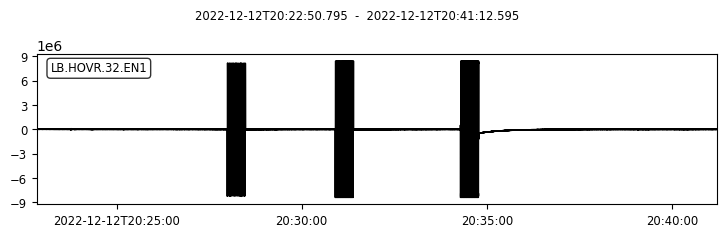

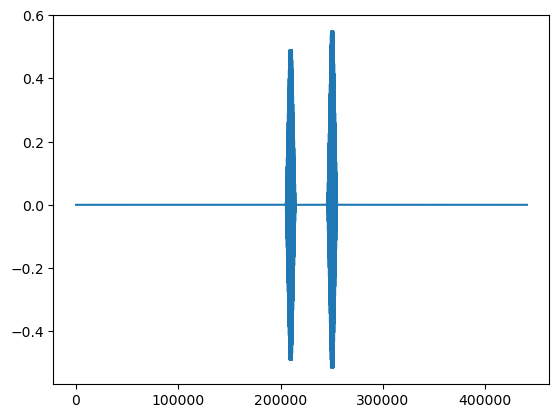

28948.5 0.547962314241332


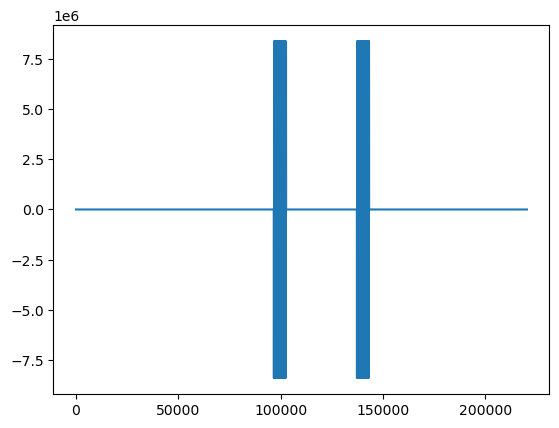

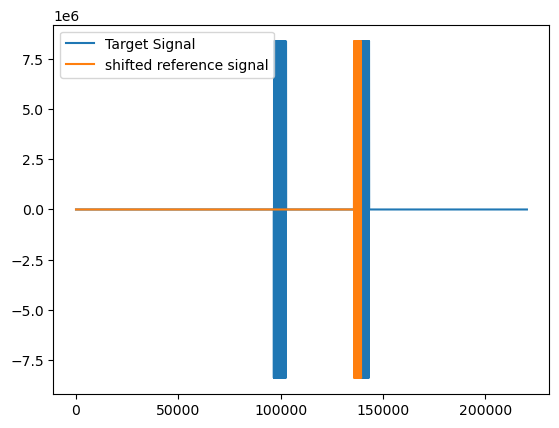

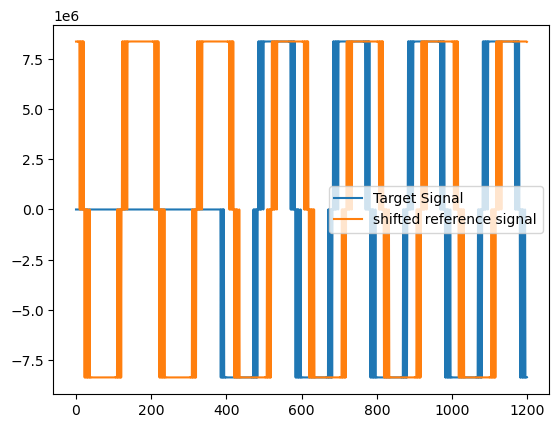

2 Trace(s) in Stream:
LB.HOVR.30.EN2 | 2022-12-09T20:52:28.055000Z - 2022-12-09T20:56:41.995000Z | 200.0 Hz, 50789 samples
LB.HOVR.30.EN2 | 2022-12-09T20:57:10.000000Z - 2022-12-09T21:00:00.660000Z | 200.0 Hz, 34133 samples
0.05717909144097155
5 Trace(s) in Stream:
LB.HOVR.30.EN2 | 2022-12-09T21:00:00.665000Z - 2022-12-09T21:02:46.995000Z | 200.0 Hz, 33267 samples
LB.HOVR.30.EN2 | 2022-12-09T21:07:02.000000Z - 2022-12-09T21:10:45.995000Z | 200.0 Hz, 44800 samples
LB.HOVR.30.EN2 | 2022-12-09T21:18:42.000000Z - 2022-12-09T21:19:18.995000Z | 200.0 Hz, 7400 samples
LB.HOVR.30.EN2 | 2022-12-09T21:23:23.000000Z - 2022-12-09T21:24:29.995000Z | 200.0 Hz, 13400 samples
LB.HOVR.30.EN2 | 2022-12-09T21:28:14.000000Z - 2022-12-09T21:34:00.400000Z | 200.0 Hz, 69281 samples
0.710624407102004


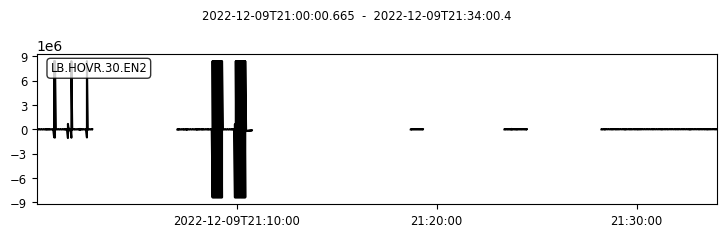

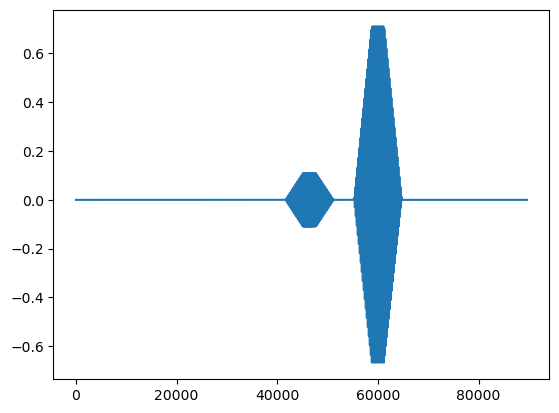

14485 0.710624407102004


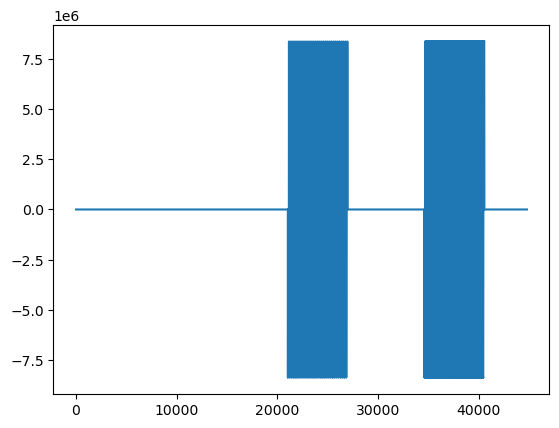

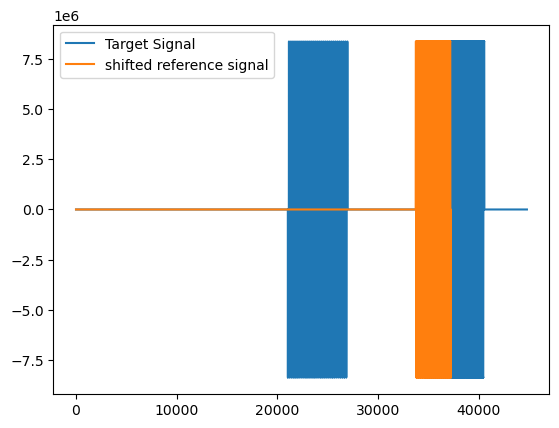

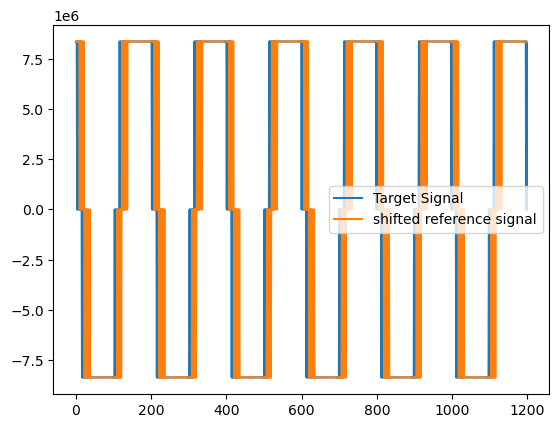

1 Trace(s) in Stream:
LB.HOVR.32.EN2 | 2022-12-12T20:22:50.995000Z - 2022-12-12T20:41:12.860000Z | 200.0 Hz, 220374 samples
0.5176833612865875


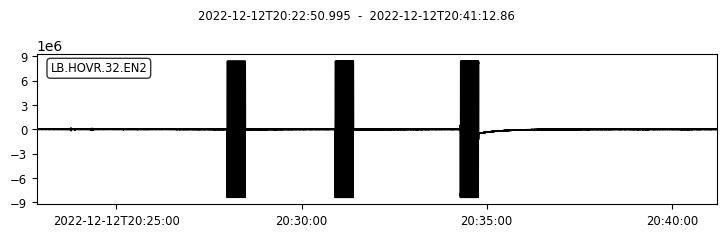

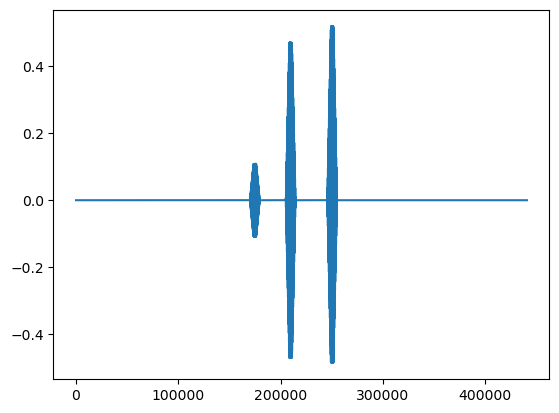

30891 0.5176833612865875


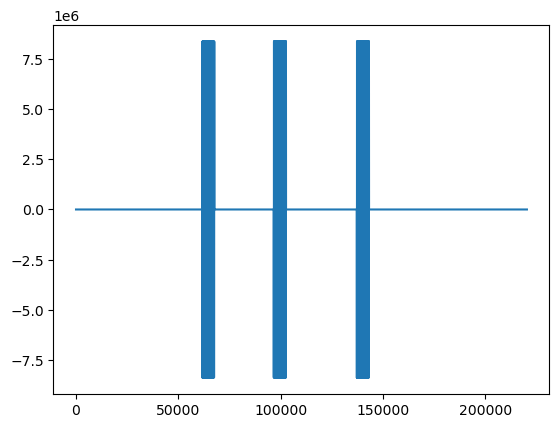

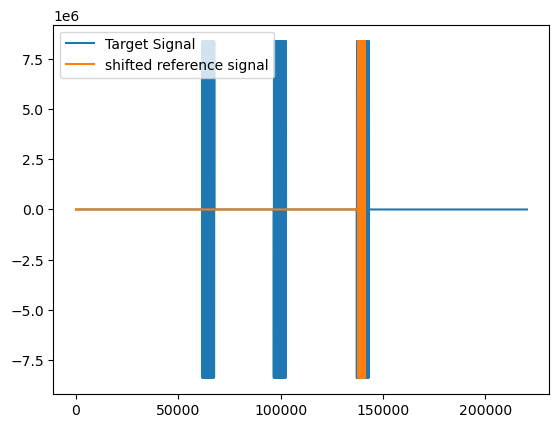

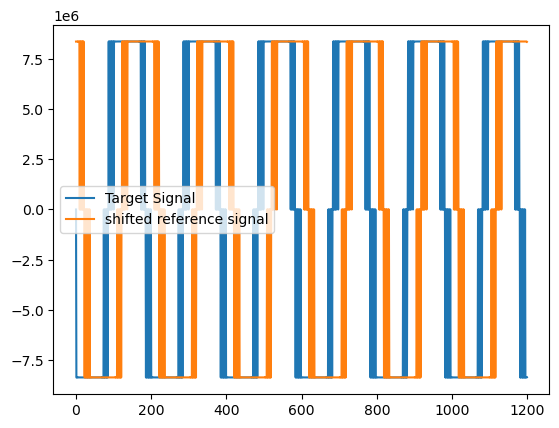

2 Trace(s) in Stream:
LB.HOVR.30.ENZ | 2022-12-09T20:52:28.450000Z - 2022-12-09T20:56:41.995000Z | 200.0 Hz, 50710 samples
LB.HOVR.30.ENZ | 2022-12-09T20:57:10.000000Z - 2022-12-09T21:00:00.225000Z | 200.0 Hz, 34046 samples
0.057354486991582534
5 Trace(s) in Stream:
LB.HOVR.30.ENZ | 2022-12-09T21:00:00.230000Z - 2022-12-09T21:02:46.995000Z | 200.0 Hz, 33354 samples
LB.HOVR.30.ENZ | 2022-12-09T21:07:02.000000Z - 2022-12-09T21:10:45.995000Z | 200.0 Hz, 44800 samples
LB.HOVR.30.ENZ | 2022-12-09T21:18:42.000000Z - 2022-12-09T21:19:18.995000Z | 200.0 Hz, 7400 samples
LB.HOVR.30.ENZ | 2022-12-09T21:23:23.000000Z - 2022-12-09T21:24:29.995000Z | 200.0 Hz, 13400 samples
LB.HOVR.30.ENZ | 2022-12-09T21:28:14.000000Z - 2022-12-09T21:34:01.080000Z | 200.0 Hz, 69417 samples
0.013070009530636785
1 Trace(s) in Stream:
LB.HOVR.32.ENZ | 2022-12-12T20:22:50.545000Z - 2022-12-12T20:41:12.820000Z | 200.0 Hz, 220456 samples
0.5342575260263531


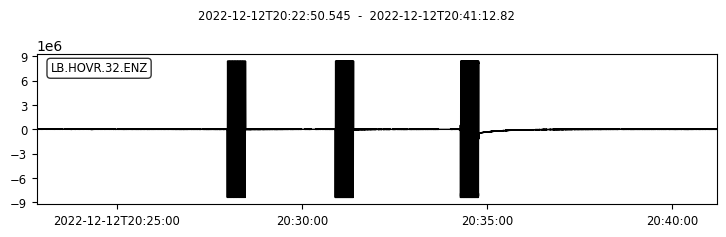

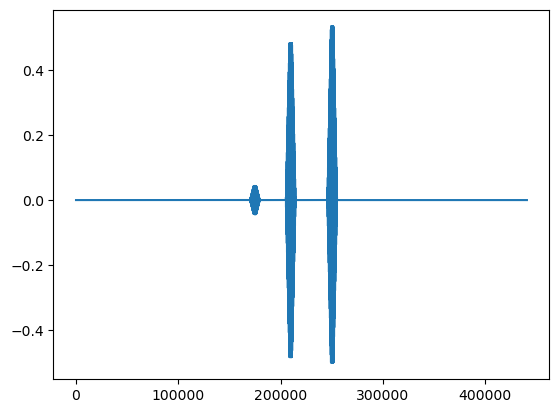

30545 0.5342575260263531


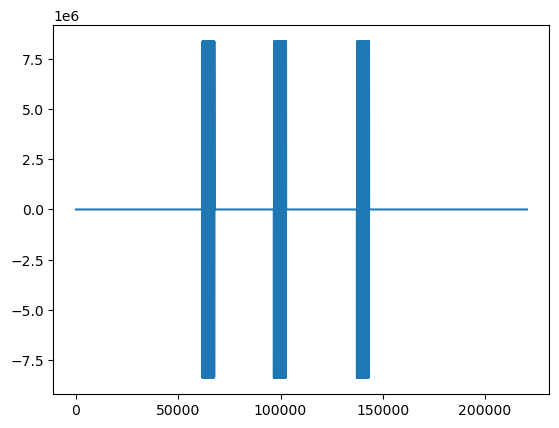

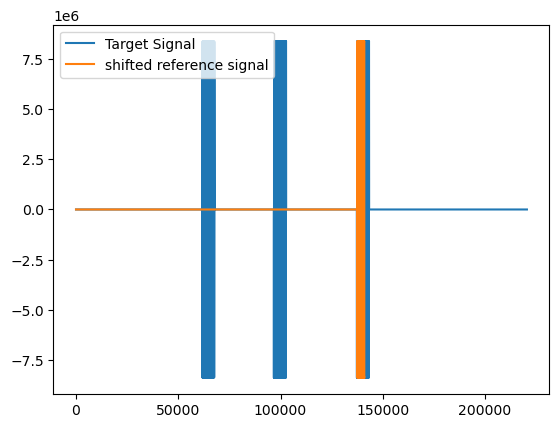

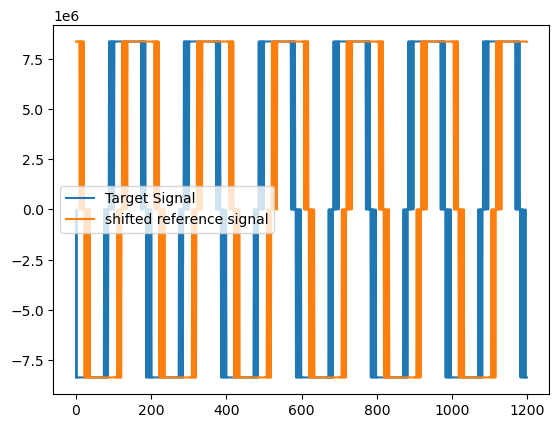

2 Trace(s) in Stream:
LB.HOVR1.40.EN1 | 2022-12-12T21:29:44.185000Z - 2022-12-12T21:38:46.995000Z | 200.0 Hz, 108563 samples
LB.HOVR1.40.EN1 | 2022-12-12T21:38:48.000000Z - 2022-12-12T21:47:14.650000Z | 200.0 Hz, 101331 samples
0.5954795319268156


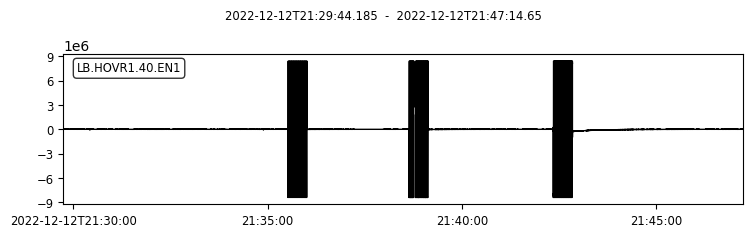

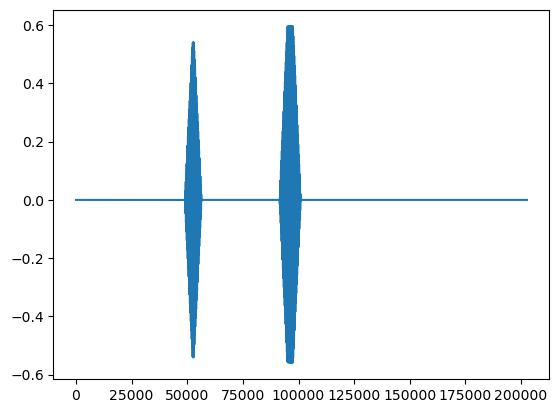

-3851.5 0.5954795319268156


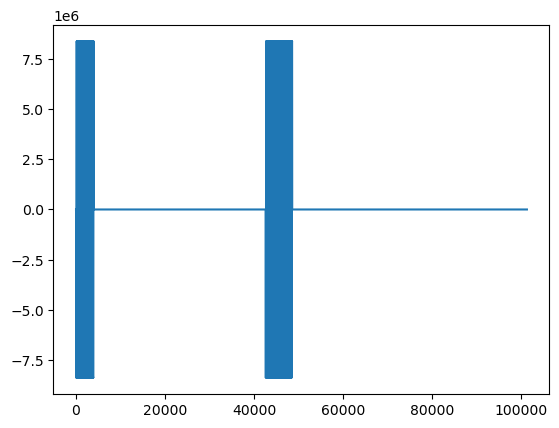

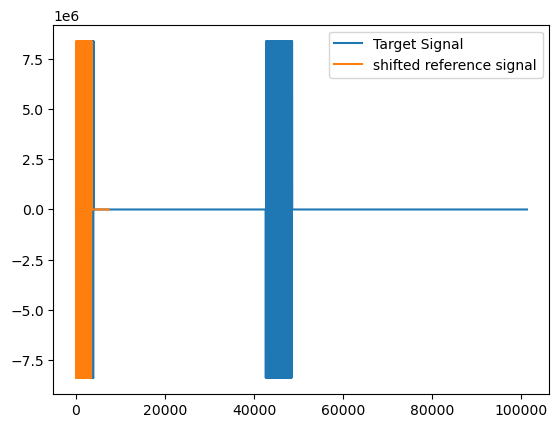

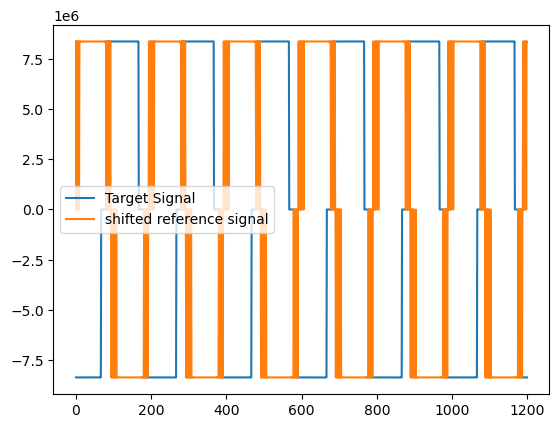

2 Trace(s) in Stream:
LB.HOVR1.40.EN2 | 2022-12-12T21:29:44.205000Z - 2022-12-12T21:38:46.995000Z | 200.0 Hz, 108559 samples
LB.HOVR1.40.EN2 | 2022-12-12T21:38:48.000000Z - 2022-12-12T21:47:14.270000Z | 200.0 Hz, 101255 samples
0.5961403854098539


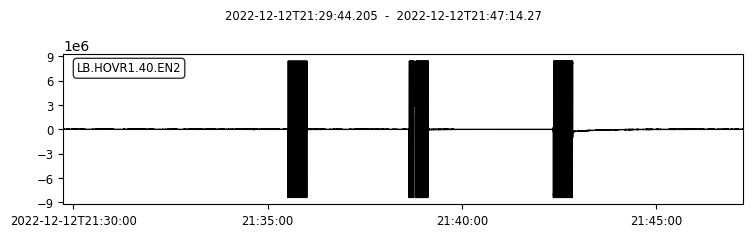

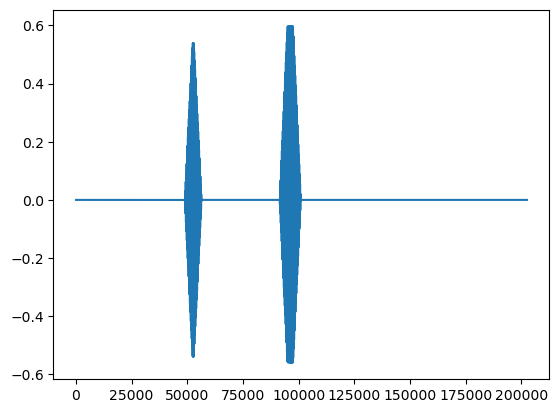

-3813.5 0.5961403854098539


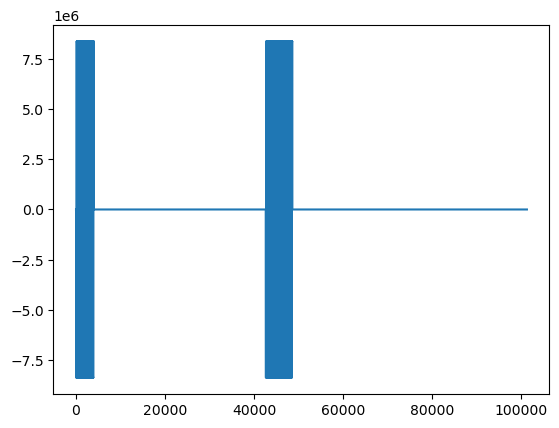

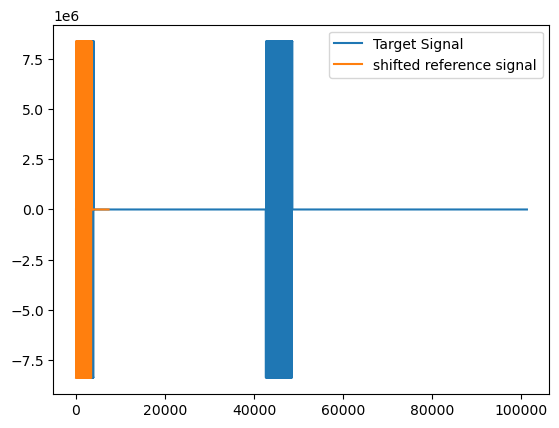

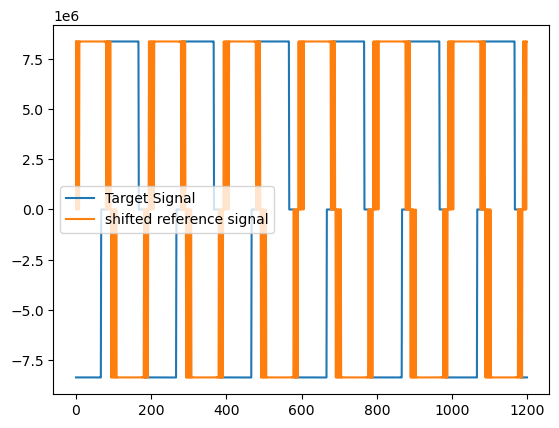

2 Trace(s) in Stream:
LB.HOVR1.40.ENZ | 2022-12-12T21:29:44.160000Z - 2022-12-12T21:38:46.995000Z | 200.0 Hz, 108568 samples
LB.HOVR1.40.ENZ | 2022-12-12T21:38:48.000000Z - 2022-12-12T21:47:13.865000Z | 200.0 Hz, 101174 samples
0.5959422137815023


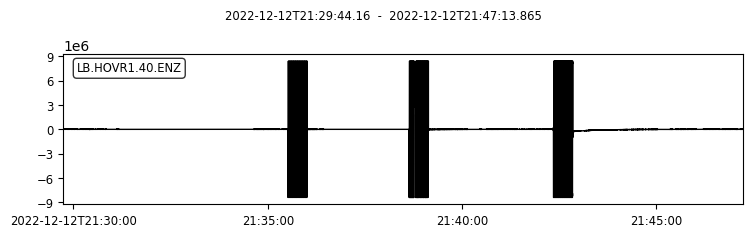

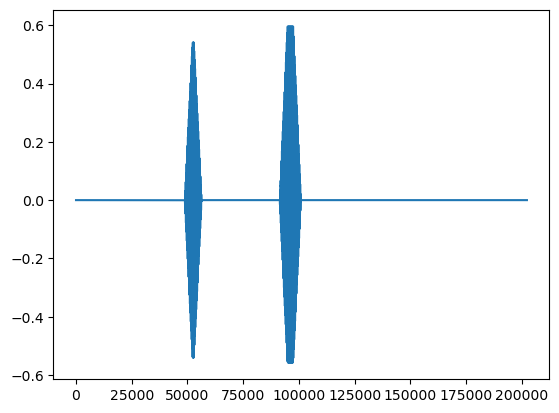

-3774 0.5959422137815023


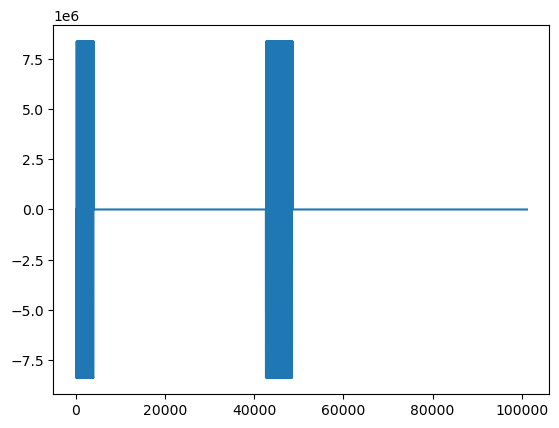

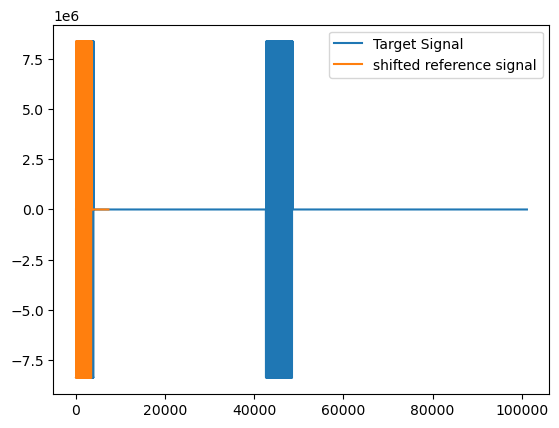

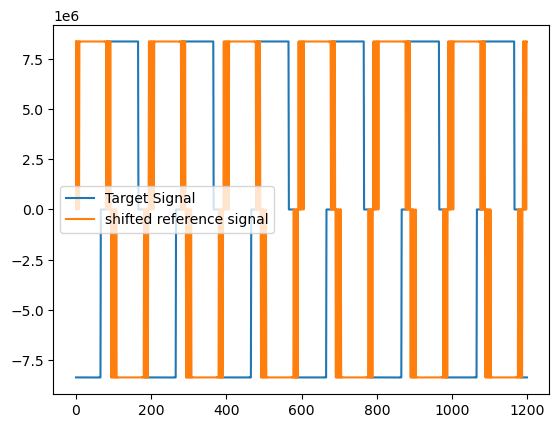

2 Trace(s) in Stream:
LB.HOVR3.32.EN1 | 2022-12-12T19:31:11.300000Z - 2022-12-12T19:36:14.995000Z | 200.0 Hz, 60740 samples
LB.HOVR3.32.EN1 | 2022-12-12T19:38:29.000000Z - 2022-12-12T19:50:17.505000Z | 200.0 Hz, 141702 samples
0.018548390262135846
2 Trace(s) in Stream:
LB.HOVR3.32.EN2 | 2022-12-12T19:31:11.905000Z - 2022-12-12T19:36:14.995000Z | 200.0 Hz, 60619 samples
LB.HOVR3.32.EN2 | 2022-12-12T19:38:29.000000Z - 2022-12-12T19:50:18.055000Z | 200.0 Hz, 141812 samples
0.539762443405096


C:\Users\lmazza\AppData\Local\Temp\2\ipykernel_17472\2047314468.py:43: RuntimeWarning:

invalid value encountered in sqrt



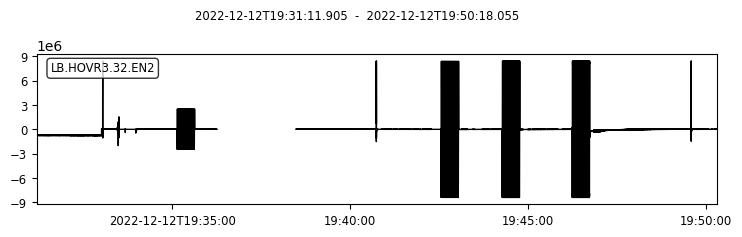

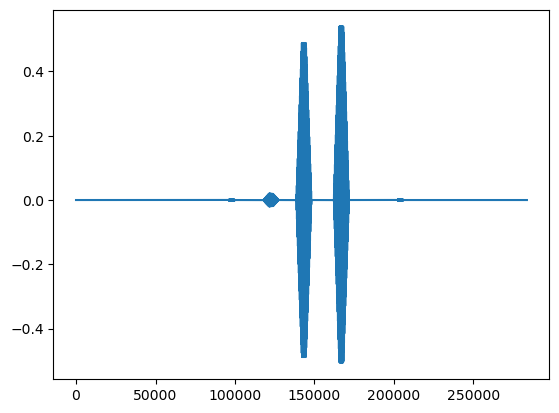

25647 0.539762443405096


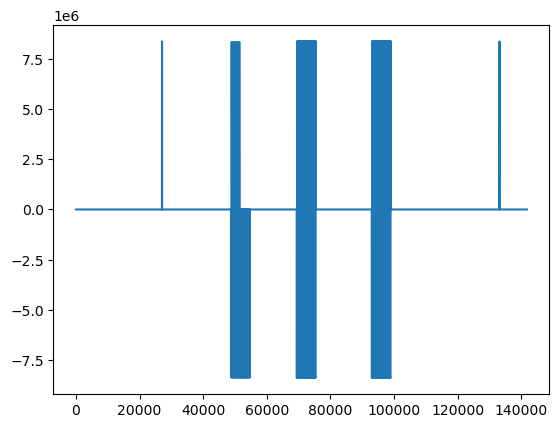

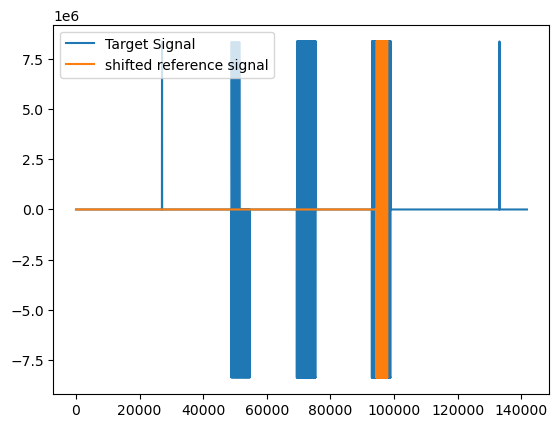

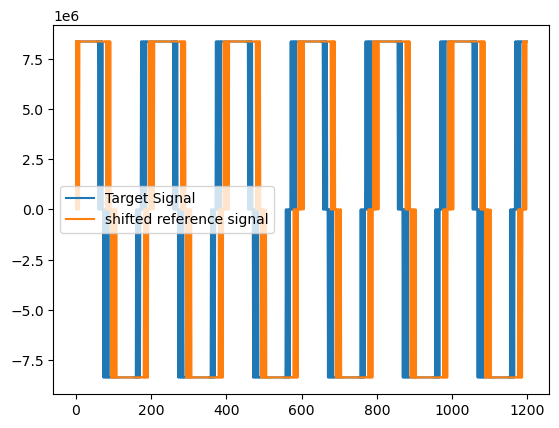

1 Trace(s) in Stream:
LB.HOVR4.42.EN1 | 2022-12-12T22:10:27.375000Z - 2022-12-12T22:25:40.535000Z | 200.0 Hz, 182633 samples
0.5103148082184948


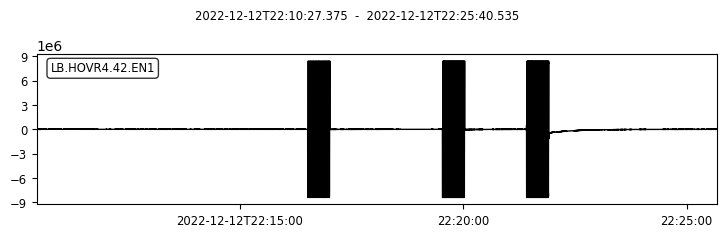

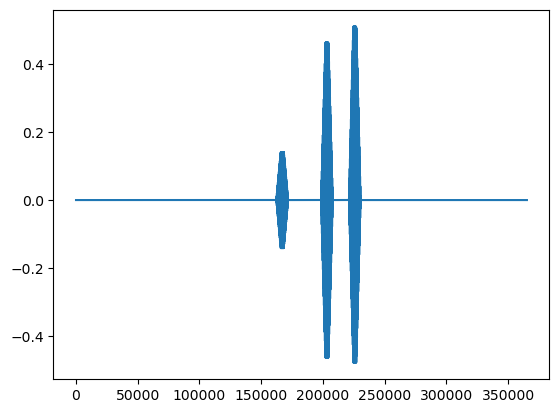

42083.5 0.5103148082184948


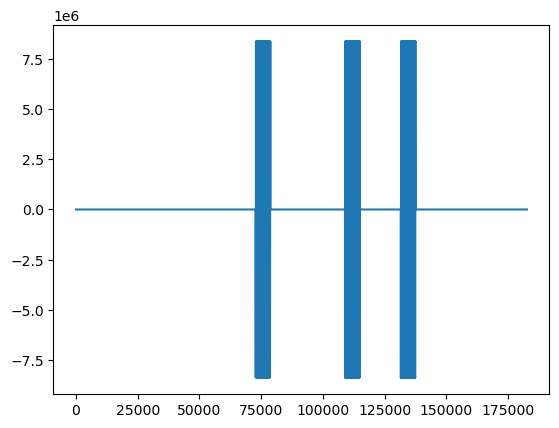

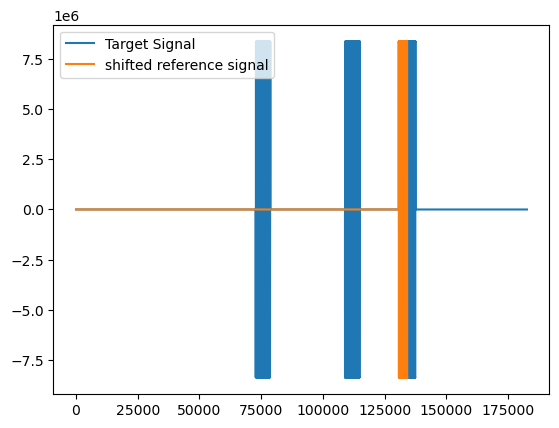

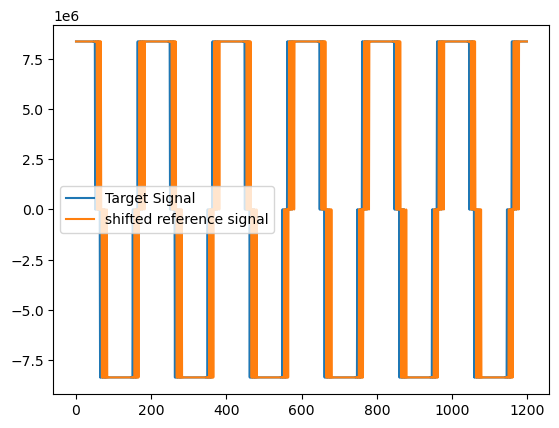

1 Trace(s) in Stream:
LB.HOVR4.42.EN2 | 2022-12-12T22:10:26.365000Z - 2022-12-12T22:25:40.330000Z | 200.0 Hz, 182794 samples
0.5124739429223661


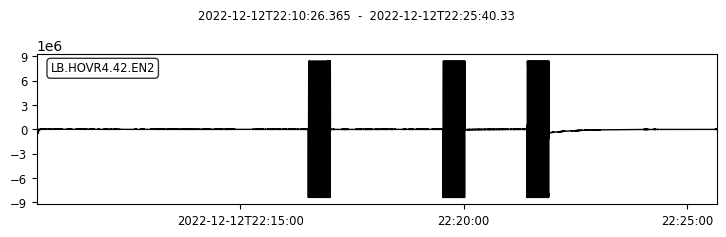

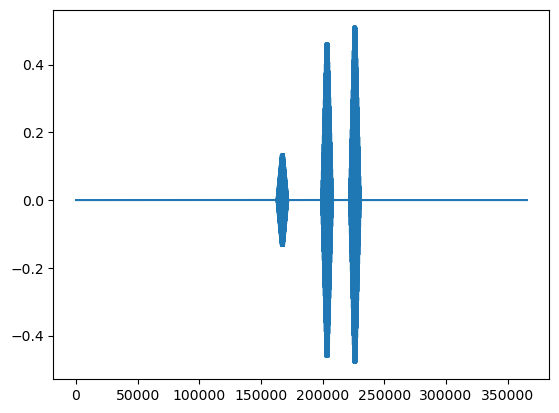

42603 0.5124739429223661


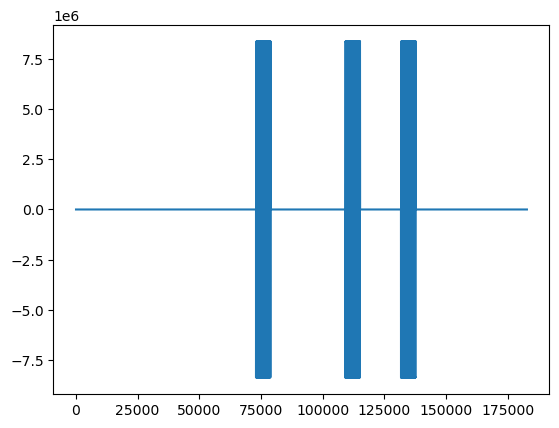

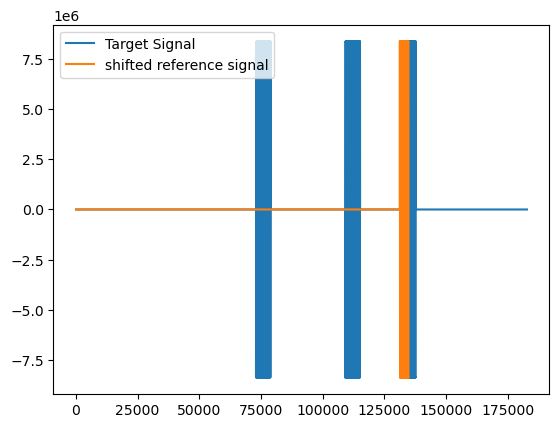

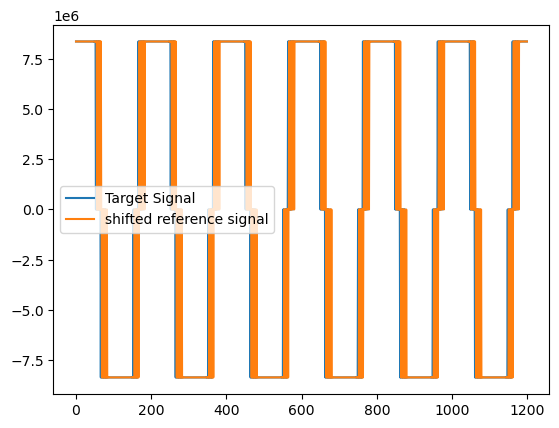

1 Trace(s) in Stream:
LB.HOVR4.42.ENZ | 2022-12-12T22:10:26.080000Z - 2022-12-12T22:25:40.095000Z | 200.0 Hz, 182804 samples
0.5142888259398617


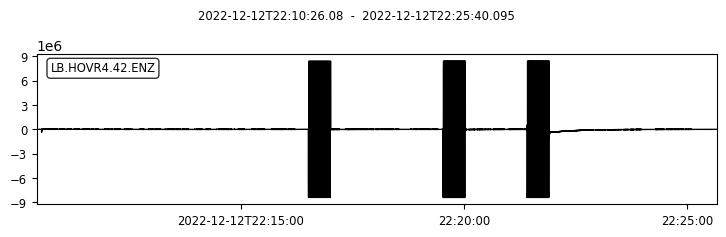

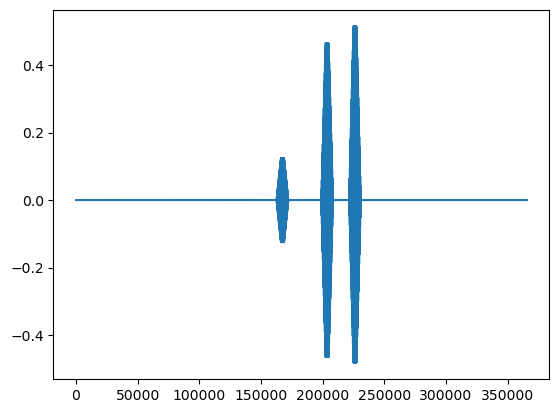

42656 0.5142888259398617


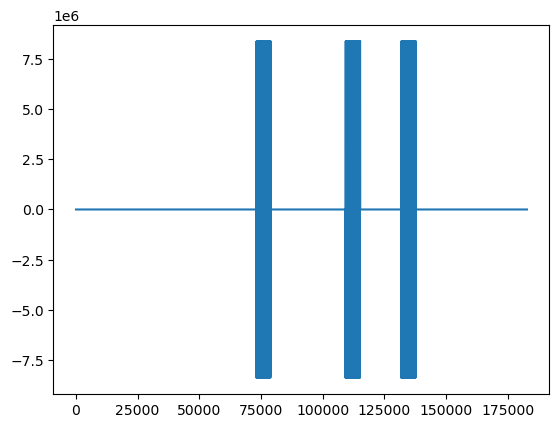

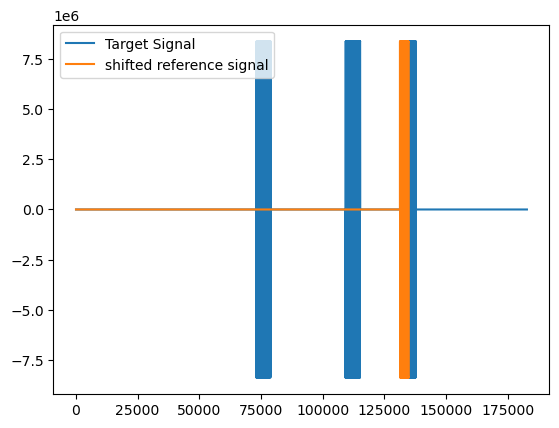

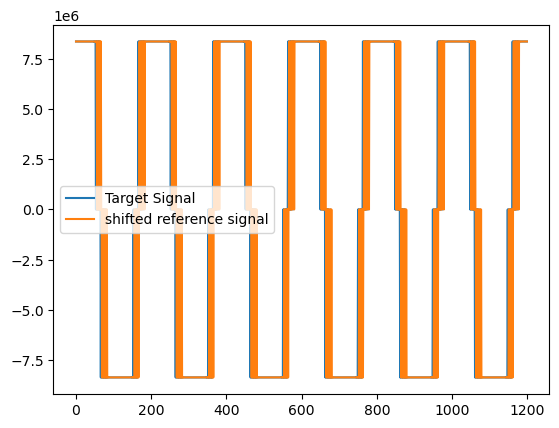

2 Trace(s) in Stream:
LB.HOVR5.50.EN1 | 2022-12-13T17:11:54.385000Z - 2022-12-13T17:16:45.995000Z | 200.0 Hz, 58323 samples
LB.HOVR5.50.EN1 | 2022-12-13T17:16:47.000000Z - 2022-12-13T17:26:48.615000Z | 200.0 Hz, 120324 samples
0.4833995807369546


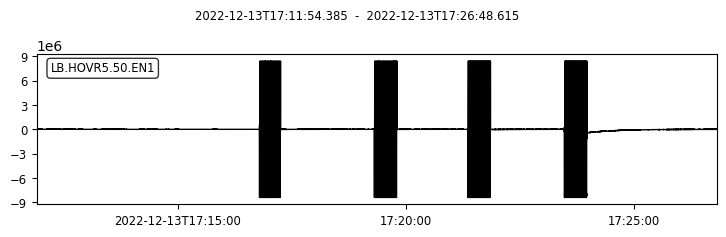

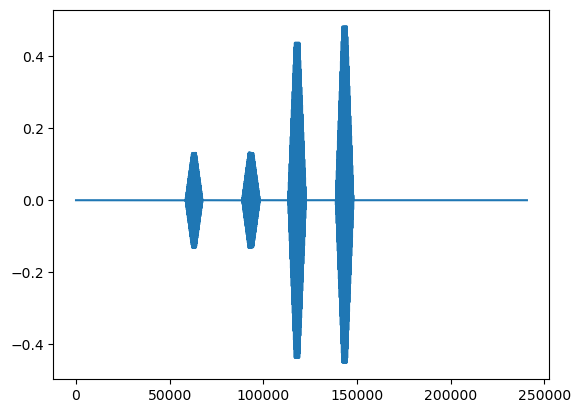

23080 0.4833995807369546


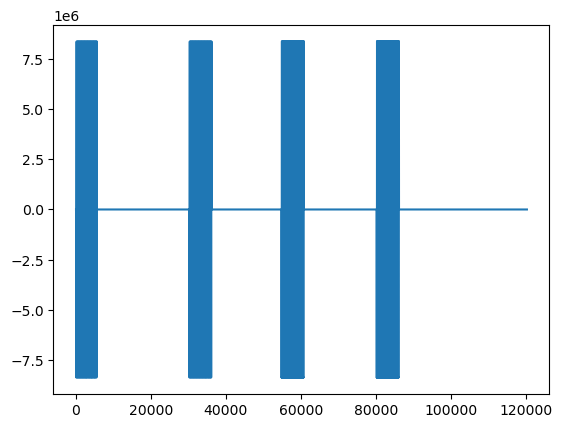

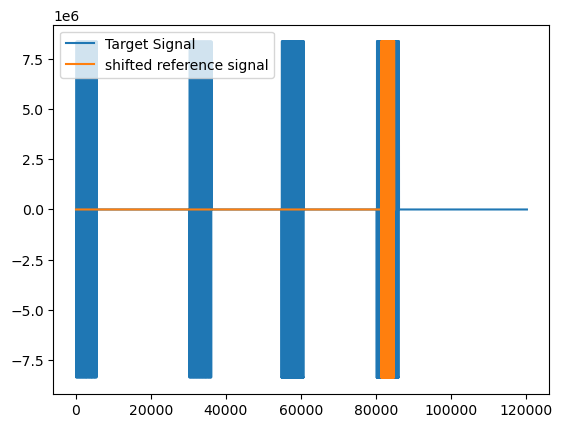

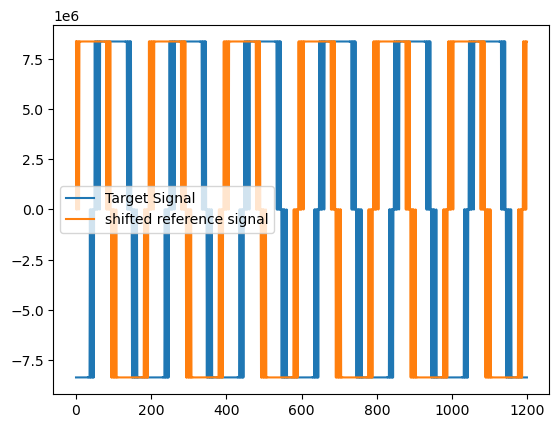

2 Trace(s) in Stream:
LB.HOVR5.50.EN2 | 2022-12-13T17:11:54.360000Z - 2022-12-13T17:16:45.995000Z | 200.0 Hz, 58328 samples
LB.HOVR5.50.EN2 | 2022-12-13T17:16:47.000000Z - 2022-12-13T17:26:48.295000Z | 200.0 Hz, 120260 samples
0.4828242966228857


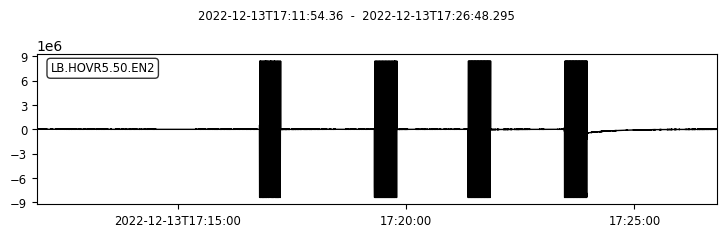

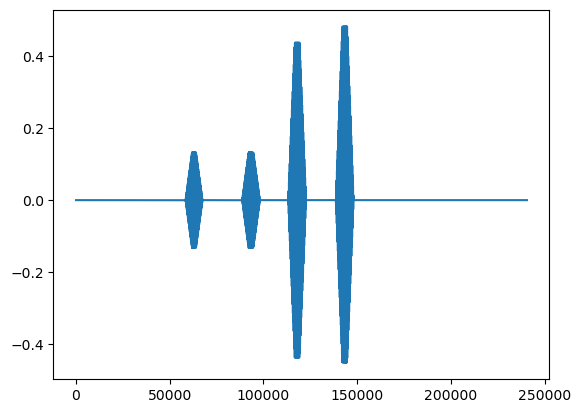

23512 0.4828242966228857


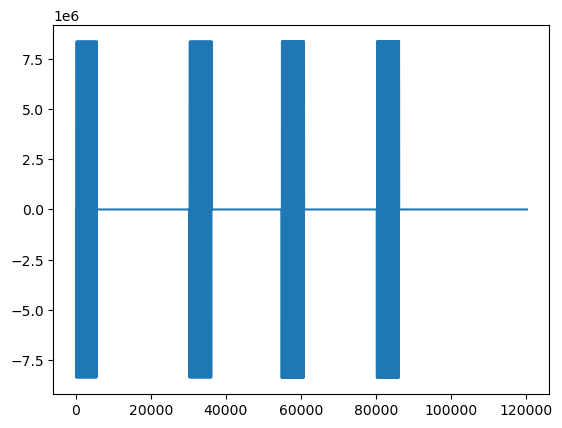

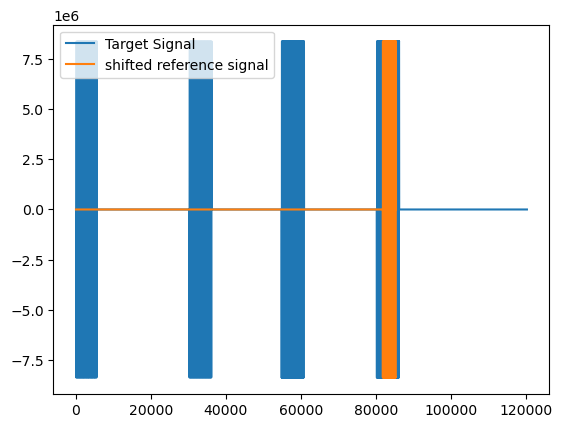

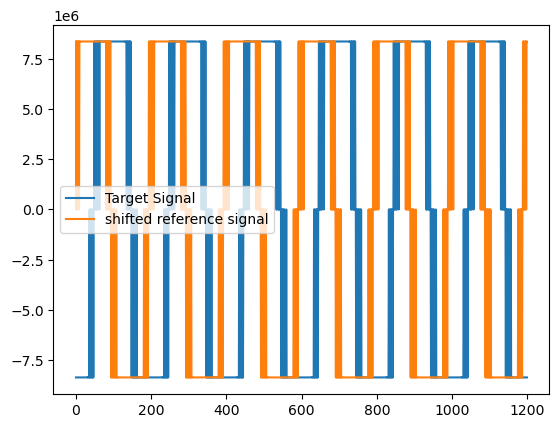

2 Trace(s) in Stream:
LB.HOVR5.50.ENZ | 2022-12-13T17:11:54.345000Z - 2022-12-13T17:16:45.995000Z | 200.0 Hz, 58331 samples
LB.HOVR5.50.ENZ | 2022-12-13T17:16:47.000000Z - 2022-12-13T17:26:48.540000Z | 200.0 Hz, 120309 samples
0.4816723232704213


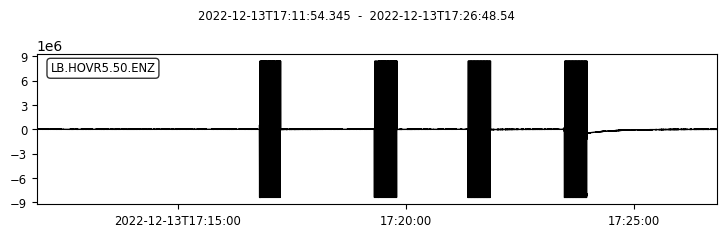

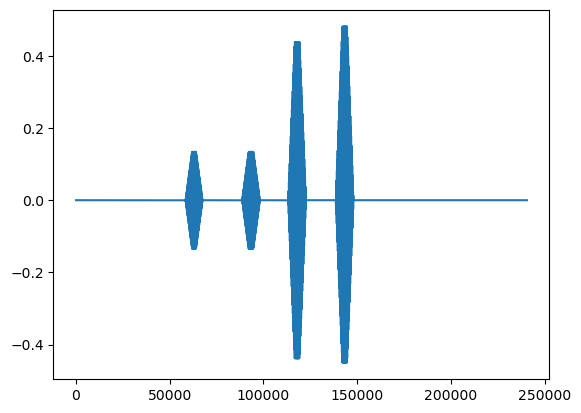

23089.5 0.4816723232704213


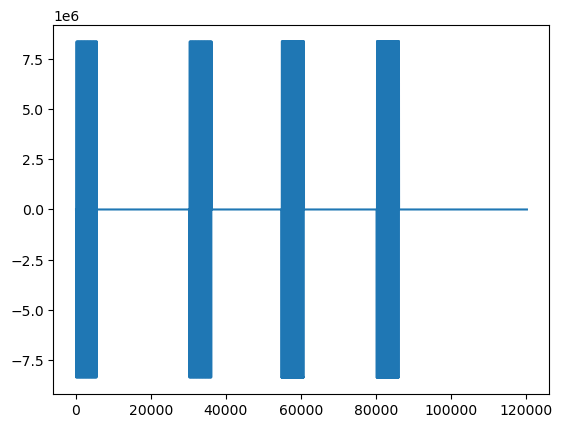

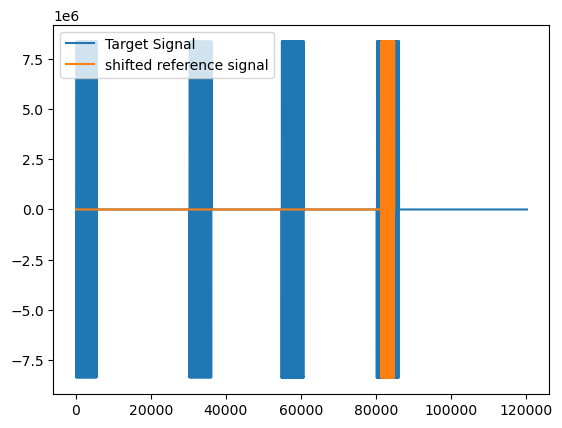

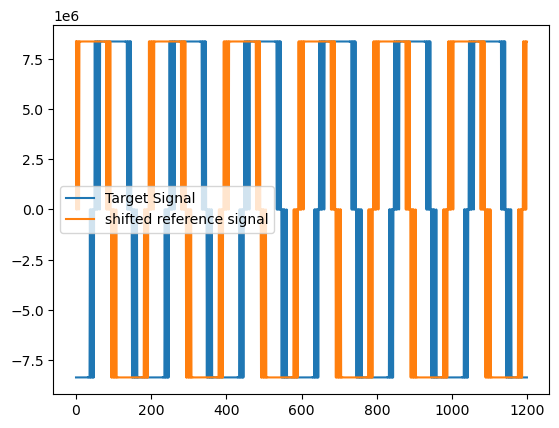

1 Trace(s) in Stream:
LB.HOVR6.52.EN1 | 2022-12-13T16:22:31.250000Z - 2022-12-13T16:40:59.320000Z | 200.0 Hz, 221615 samples
0.5461911862104435


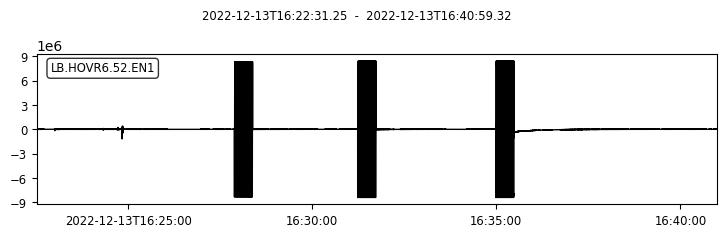

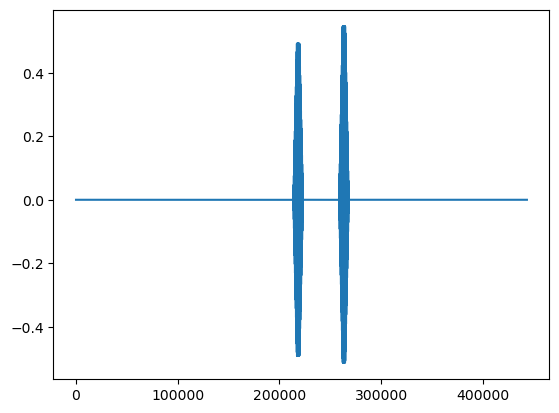

41111.5 0.5461911862104435


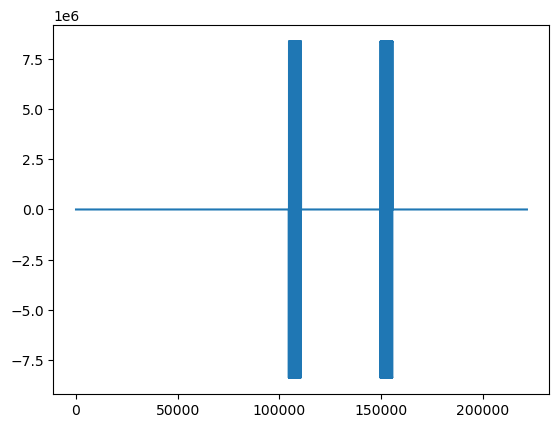

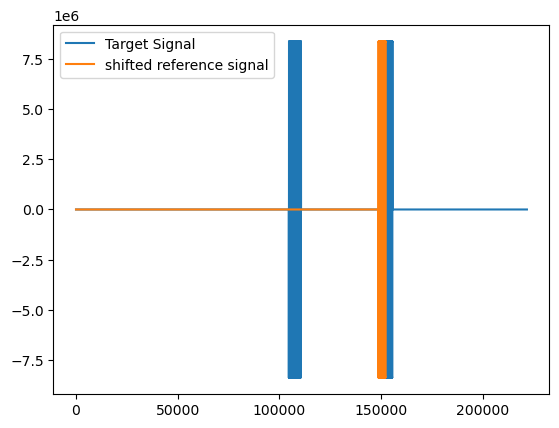

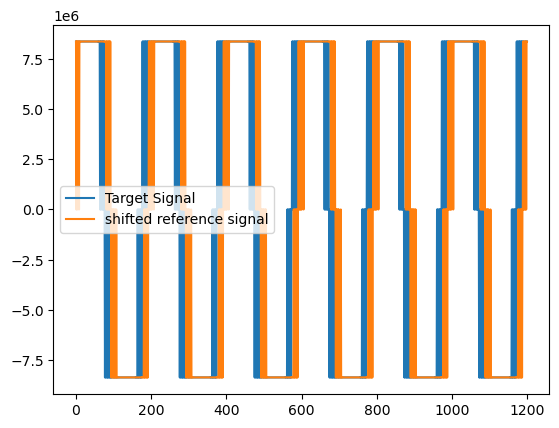

1 Trace(s) in Stream:
LB.HOVR6.52.EN2 | 2022-12-13T16:22:31.280000Z - 2022-12-13T16:40:59.125000Z | 200.0 Hz, 221570 samples
0.5427051411642255


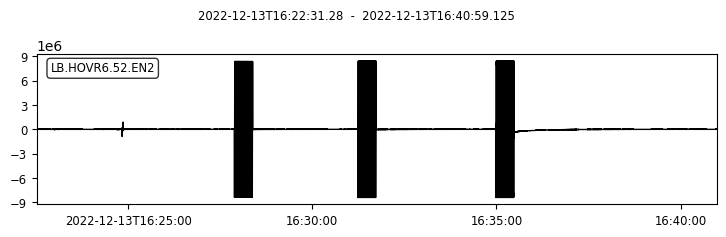

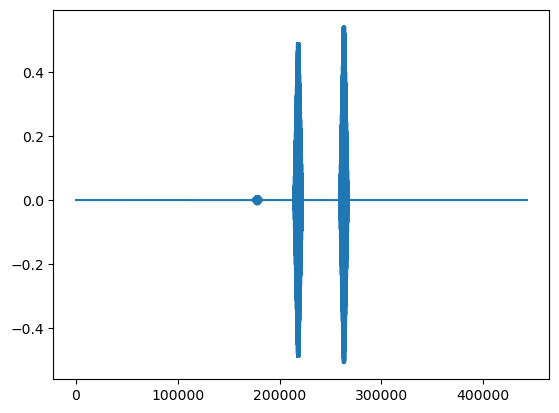

41126 0.5427051411642255


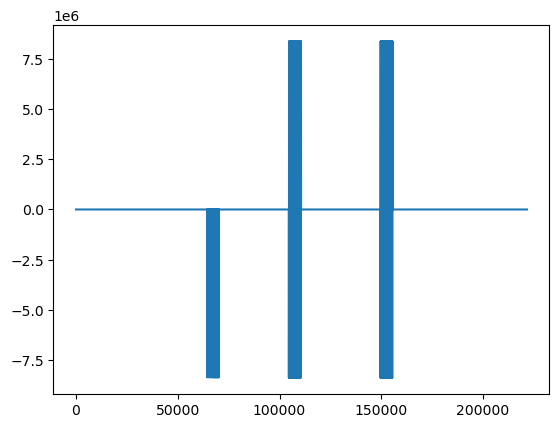

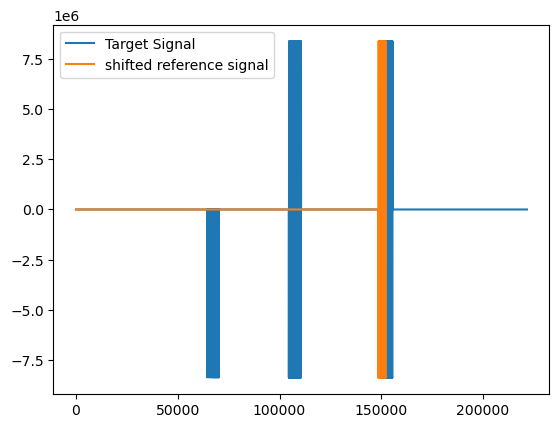

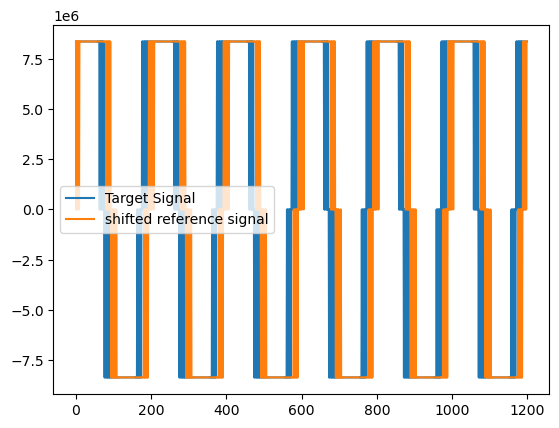

1 Trace(s) in Stream:
LB.HOVR6.52.ENZ | 2022-12-13T16:22:31.280000Z - 2022-12-13T16:40:58.950000Z | 200.0 Hz, 221535 samples
0.5317085778831822


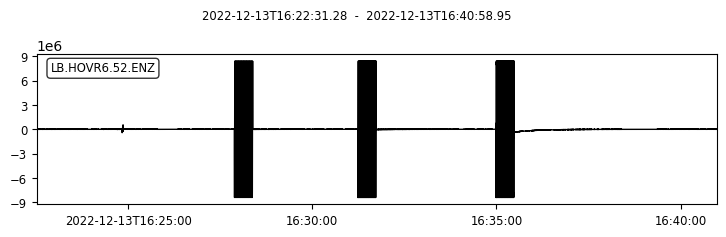

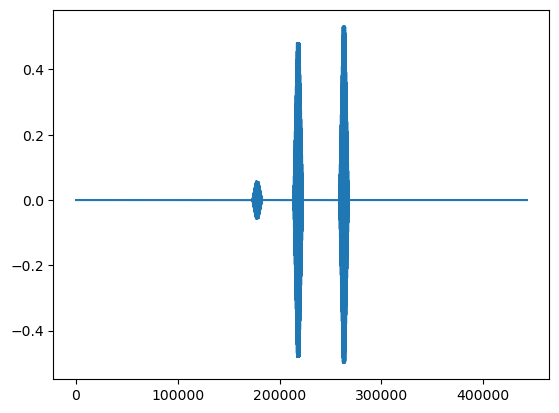

41142.5 0.5317085778831822


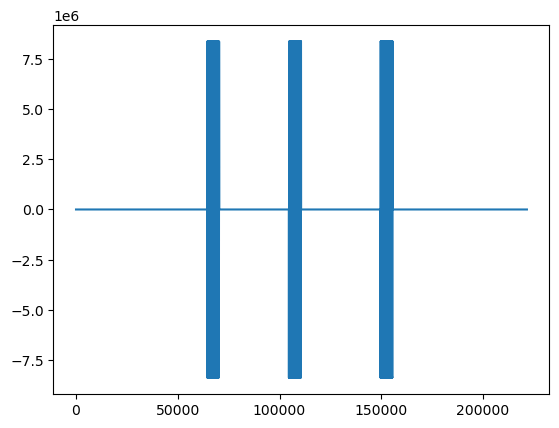

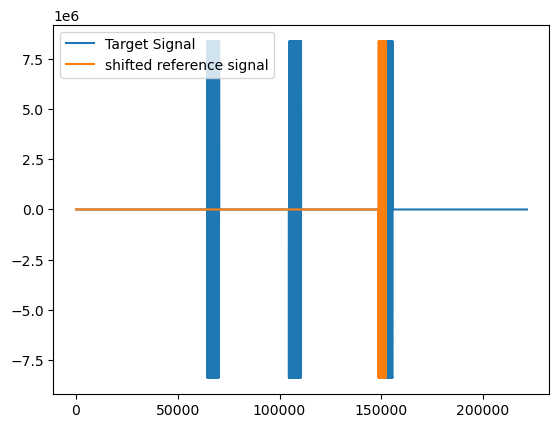

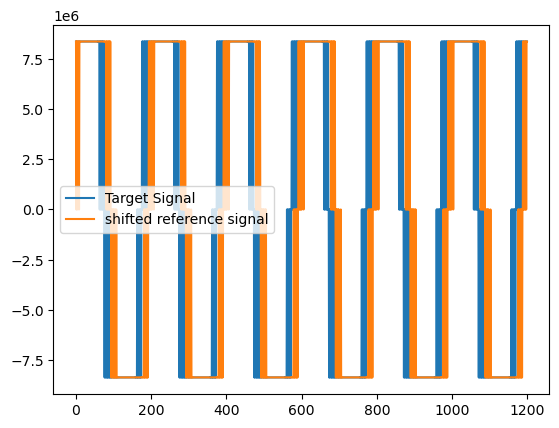

In [102]:
def get_atsensor_signals(station_dict):
    #Encode the top directory 
    directory = fse('Hoover_cals/HooverCals/Atsensorsite/')
    #List the Files of the Encoded directory
    storage = ld(directory)
    #Loop through all the entries in the Encoded Directory
    station_dict_atsens = {}
    station_dict_atlog = {}
    for dir in storage:
        #Decode the directory and encode its contents
        sig_list_log = []
        sig_list_sens = []
        file = fsd(dir)
        if file == 'HOVR2':
            continue
        new_dir = fse(f'Hoover_cals/HooverCals/Atsensorsite/{file}')
        # Create a new list of the directory's encoded sub-directories
        new_storage = ld(new_dir)
        i = -1
        #Loop through the encoded contents of the most recently decoded directory
        for dir2 in new_storage:
            #Decode the most recently encoded directory. A pattern is Emerging here. Essentially, we follow this convention of encoding and decoding the filesystem until we reach all the sac files at the bottom 
            #of the Directory Tree. 
            file2 = fsd(dir2)
            if file2[0] != 'E' or (file == 'HOVR3' and i == 1):
                continue
            new_dir2 = fse(f'Hoover_cals/HooverCals/Atsensorsite/{file}/{file2}')
            new_storage2 = ld(new_dir2)
            i+=1
            for dir3 in new_storage2:
                file3 = fsd(dir3)
                new_dir3 = fse(f'Hoover_cals/HooverCals/Atsensorsite/{file}/{file2}/{file3}')
                new_storage3 = ld(new_dir3)
                #We have finally reached the sac files we want to work with. Let's perform some operations 
                for sac_file in new_storage3: 
                    #Read in the data from the sac file using Obspy 
                    sac_obs = fsd(sac_file)
                    st = read(f'Hoover_cals/HooverCals/Atsensorsite/{file}/{file2}/{file3}/{sac_obs}')
                    print(st)
                    if len(st) != 1:
                        dominant_trace = st[0]
                        for tr in st[1:]:
                            if sqrt(mean(square(tr.data))) > sqrt(mean(square(dominant_trace.data))):
                                dominant_trace = tr
                        info = dominant_trace.data
                        threshold = np.max(info) - 30000
                        good_info = np.where(np.abs(info) >= threshold, info, info*0)
                        x = np.arange(0,len(info))
                        cc = correlate(good_info,station_dict[f'{file}'][i],len(good_info))
                    else:
                        dominant_trace = st[0]
                        info = dominant_trace.data
                        threshold = np.max(info) - 30000
                        good_info = np.where(np.abs(info) >= threshold, info, info*0)
                        x = np.arange(0,len(info))
                        cc = correlate(good_info,station_dict[f'{file}'][i],len(good_info))
                    print(np.max(cc))
                    if np.max(cc) > 0.1:
                        st.plot()
                        plt.plot(cc)
                        plt.show()
                        shift,correlation_value = xcorr_max(cc)
                        print(shift,correlation_value)
                        #Slightly different routine for the add_on derivation
                        if len(info) < 1e5:
                            add_on = len(cc)*0.215
                        else:
                            add_on = len(cc)*0.2425
                        if shift < 0:
                            check = np.concatenate((station_dict[f'{file}'][i],np.zeros(np.abs(int(shift)))))
                        else:
                            check = np.concatenate((np.zeros(np.abs(int(shift+add_on))),station_dict[f'{file}'][i]))
                        plt.plot(good_info)
                        plt.show()
                        plt.plot(good_info)
                        plt.plot(check)
                        plt.legend(['Target Signal','shifted reference signal'])
                        plt.show()
                        #Different indexing routine for plotting and saving the aligned waveforms. 
                        if shift > 0:
                            midpoint = check.argmax()
                            plt.plot(good_info[midpoint+1000:midpoint+2200])
                            plt.plot(check[midpoint+1000:midpoint+2200])
                            plt.legend(['Target Signal','shifted reference signal'])
                            plt.show()
                        else:
                            midpoint = check.argmax()
                            plt.plot(good_info[midpoint+1000:midpoint+2200])
                            plt.plot(check[midpoint+1000:midpoint+2200])
                            plt.legend(['Target Signal','shifted reference signal'])
                            plt.show()
                        sig_list_sens.append(good_info[midpoint+1000:midpoint+2200])
                        sig_list_log.append(check[midpoint+1000:midpoint+2200])
        station_dict_atsens[f'{file}'] = sig_list_sens
        station_dict_atlog[f'{file}'] = sig_list_log
    return(station_dict_atsens,station_dict_atlog)
station_dict_atsens,station_dict_atlog = get_atsensor_signals(station_dict)

HOVR produced an additional, uneccessary data array for one of its channels. Let's remove it

In [103]:
del station_dict_atlog['HOVR'][2]
del station_dict_atsens['HOVR'][2]
station_dict_atlog

{'HOVR': [array([8384894., 8388607., 8387350., ..., 8382639., 8388607., 8370614.]),
  array([8384906., 8388607., 8387401., ..., 8382582., 8388607., 8370650.]),
  array([8384901., 8388607., 8387379., ..., 8382606., 8388607., 8370634.])],
 'HOVR1': [array([8388607.,       0., 8388607., ...,       0., 8388607., 8383132.]),
  array([8388607.,       0., 8388607., ...,       0., 8388607., 8383132.]),
  array([8388607.,       0., 8388607., ...,       0., 8388607., 8383325.])],
 'HOVR3': [array([8388607.,       0., 8388607., ...,       0., 8388607., 8382072.])],
 'HOVR4': [array([8388606., 8388606., 8388606., ..., 8388606., 8388606., 8388606.]),
  array([8388606., 8388606., 8388606., ..., 8388606., 8388606., 8388606.]),
  array([8388606., 8388606., 8388606., ..., 8388606., 8388606., 8388606.])],
 'HOVR5': [array([8388607.,       0., 8388607., ...,       0., 8388607., 8383325.]),
  array([8388607.,       0., 8388607., ...,       0., 8388607., 8383325.]),
  array([8388607.,       0., 8388607., .

# Manual Ratio modeling

### Now we're onto the good stuff! There will be two different conventions we follow with finding these spectral ratios. Some of these waveforms have interfering frequencies that make the spectral ratios innacurate and not able to be modeled. These include HOVR1,HOVR3, and HOVR4. Due to this, we will have to manually select points of a given waveform's fourier transform where a given frequency is the strongest. This will greatly simplify the signal while taking the least amount of important data out

In [114]:
#Extract two channel arrays from the dictinoaries and convert them to obspy traces. 
atlog_tr = Trace(station_dict_atsens['HOVR4'][1])
atsens_tr = Trace(station_dict_atlog['HOVR4'][1])
#Make a list containing all the traces and conver their sampling rates. 
tr_list = [atlog_tr,atsens_tr]
atlog_tr.stats.sampling_rate = 200
atsens_tr.stats.sampling_rate = 200

In [115]:
#Make a dictionary that will contain the coefficients from all the different stations we make our polynomial regression models with
ratio_dic_coefs = {}

In [116]:
#Make a list containing the polynomial regression coefficients for a given channel
coef_list = []

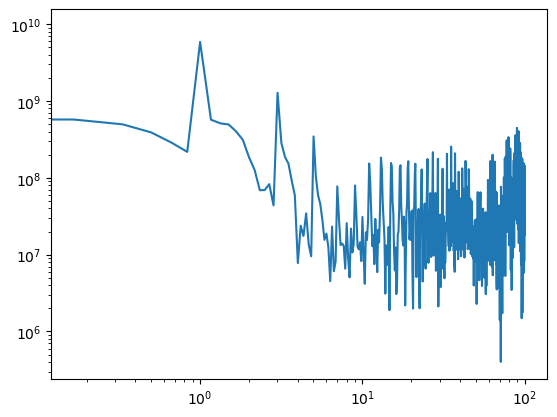

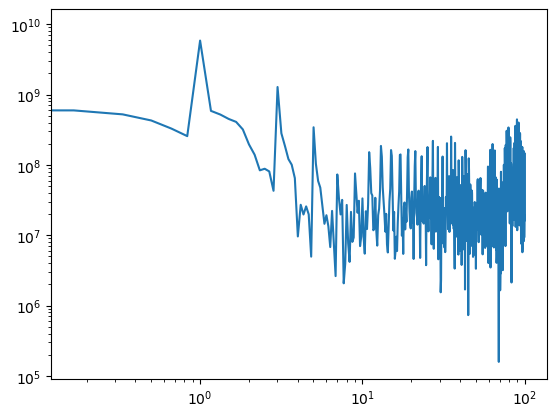

In [117]:
#The psd list will contain the data we will take the spectral ratios with
psd_list = []
#Loop through the trace list and take the irfourier transforms. Plot these using matplotlib and plotly 
for tr in tr_list:
    tr.detrend('demean')
    tr.detrend('simple')
    tr.taper(type='cosine',max_percentage=0.1,side='both')
    tr_fft = np.fft.fft(tr.data)
    fft00= len(tr_fft)
    if fft00 % 2 == 0:
        fftn2 = int(fft00/2)
    else:
        fftn2 = int((fft00-1)/2)
    df = tr.stats.sampling_rate
    df2 = int(df/2)
    tr_fft = tr_fft[0:fftn2]
    freq_axis = np.linspace(0,df2,fftn2)
    scale = 2.0/((fft00-1)*(fft00-1))
    tr_psd = scale*abs2(tr_fft)
    freq_axis = float64(freq_axis)
    tr_psd = float64(tr_psd)
    plt.loglog(freq_axis,np.abs(tr_fft))
    plt.show()
    fig = px.line(np.abs(tr_fft),log_x=True,log_y=True)
    fig.update_xaxes(range = [0.1,2.0])
    fig.show()
    #This line here must be adjusted based on the waveforms you are dealing with. Choose the first five highest peaks you see on your fourier transform.
    #You can use the plotly graph to decipher the indeces of the peaks. 
    psd_list.append([tr_fft[6],tr_fft[18],tr_fft[30],tr_fft[42],tr_fft[54]])

## Now that we have truncated our signals and taken their fourier transforms, we are ready to take some spectral ratios! We will utilize numpy's 2nd degree polynomial regression to accomplish this

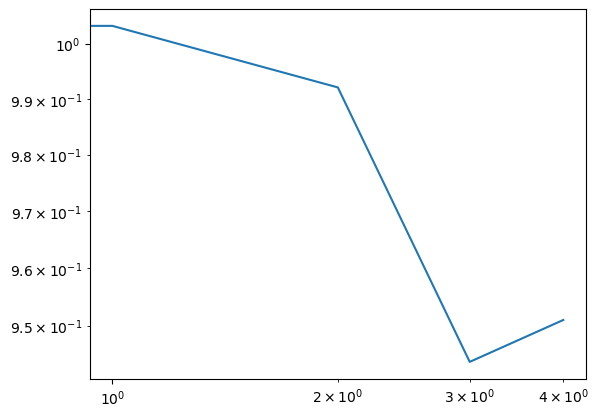

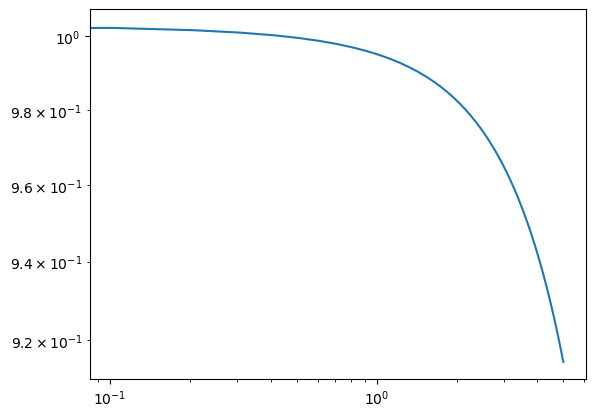

In [118]:
#Take the spectral ratio of the atsesnor/atlogger absolute value fourier transforms and plot them on a log-scale graph. 
ratio = np.abs(np.array(psd_list[1]))/np.abs(np.array(psd_list[0]))
plt.loglog(ratio)
plt.show()
#Perform 2nd degree polynmial regression on the ratio. Plot it out. 
x = np.arange(0,len(ratio))
model = np.poly1d(np.polyfit(x,ratio,2))
myline = np.linspace(0,len(ratio))
plt.loglog(myline, model(myline))
plt.show()

### Alright that looks pretty good! A sign of a good model in this case is a characteristic drop-off towards the end of the plot. Let's wrap up by adding our list to the dictionary. This process can be repeated by running through the loop again and not updating the dictionaries/lists. 

In [97]:
coef_list.append(model.coefficients)

In [98]:
coef_list

[array([-0.00248324, -0.00527158,  1.00289225])]

In [99]:
ratio_dic_coefs['HOVR'] = coef_list

In [100]:
ratio_dic_coefs

{'HOVR': [array([-0.00248324, -0.00527158,  1.00289225])]}

# Automated Ratio Modeling

### The rest of the waveforms from HOVR,HOVR5, and HOVR6 will be easier to model compared to the previous few. We can apply an automated method for these spectral ratios and models similar to our alignment code. Let's walk through the spectral ratio finder function, which takes the atlogger and atsensor waveform dictionaries in as inputs:

HOVR


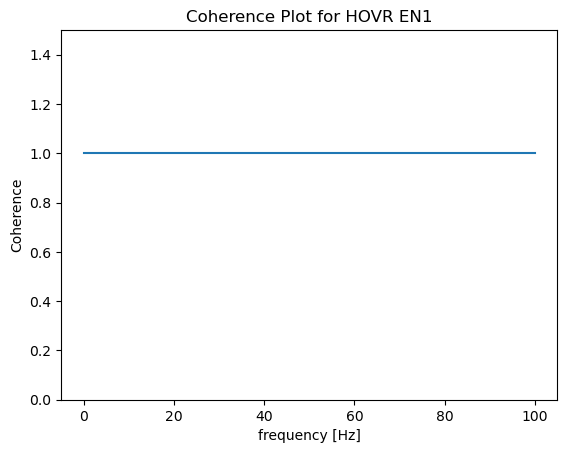

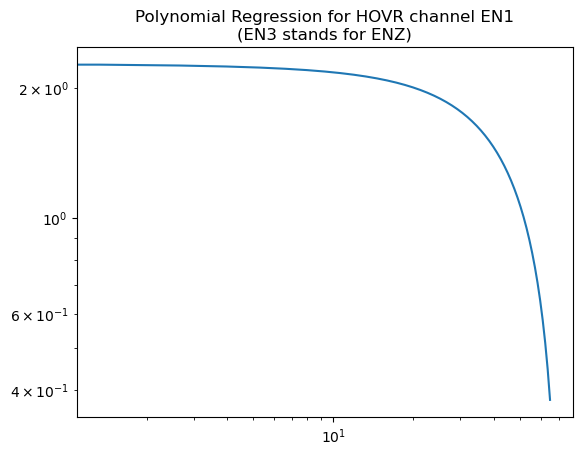

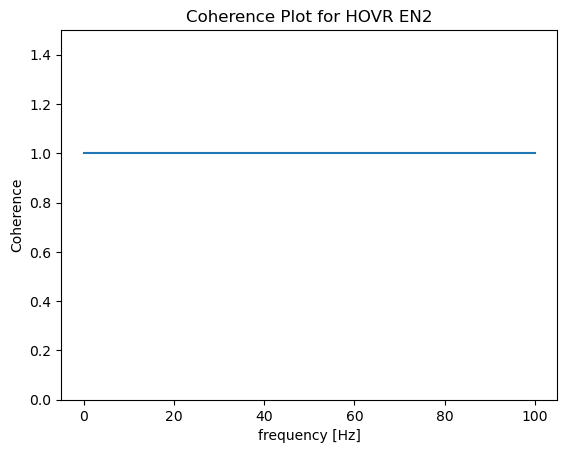

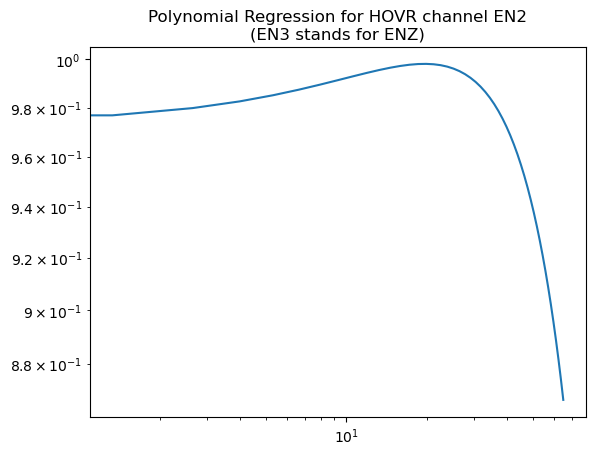

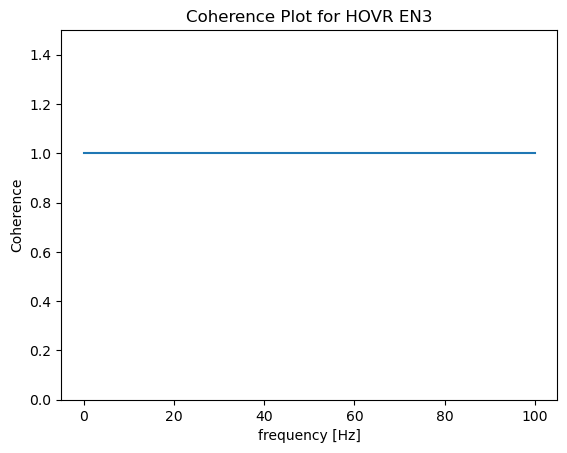

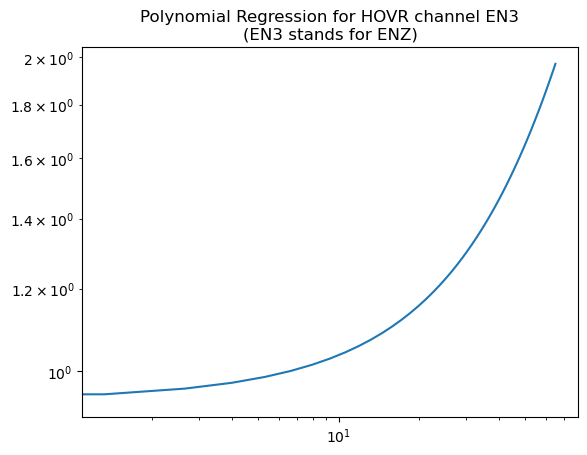

HOVR1


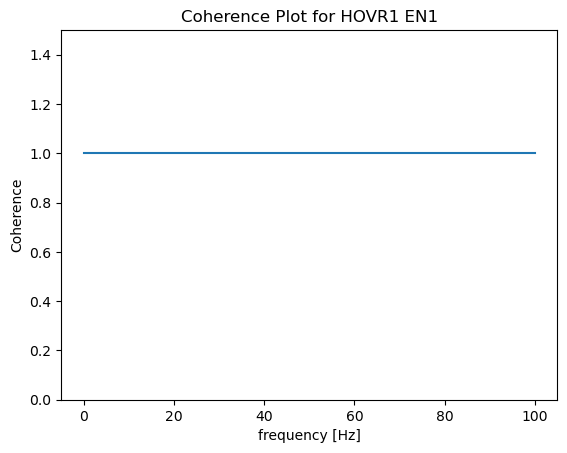

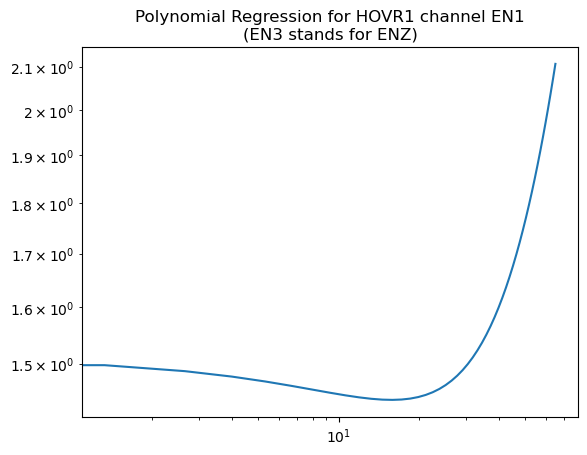

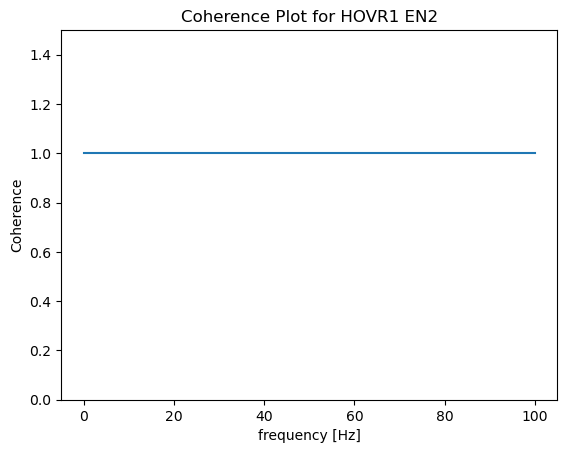

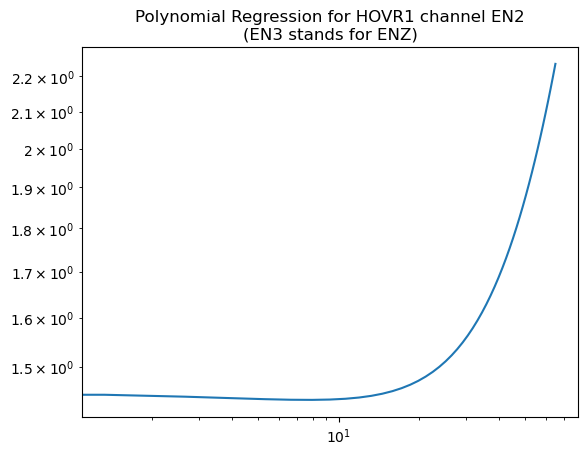

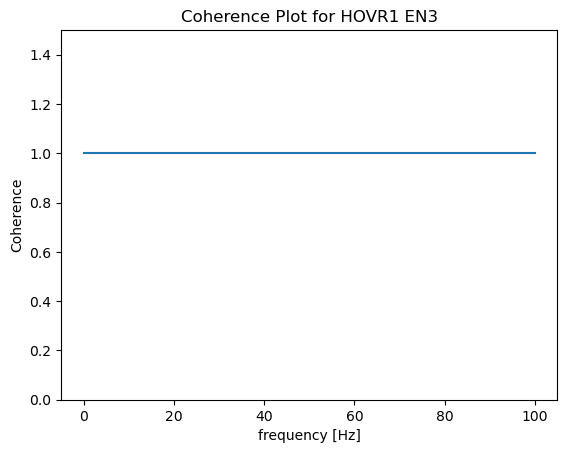

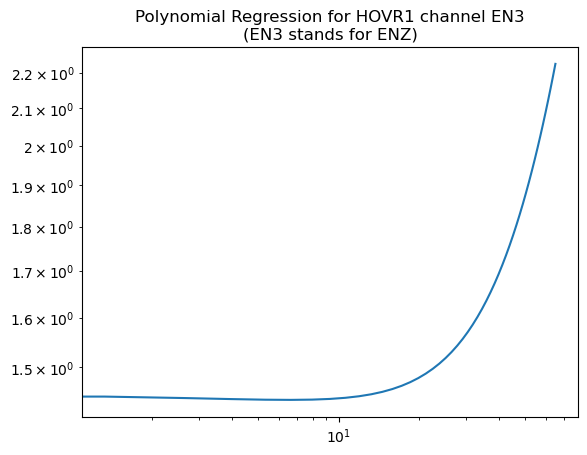

HOVR3


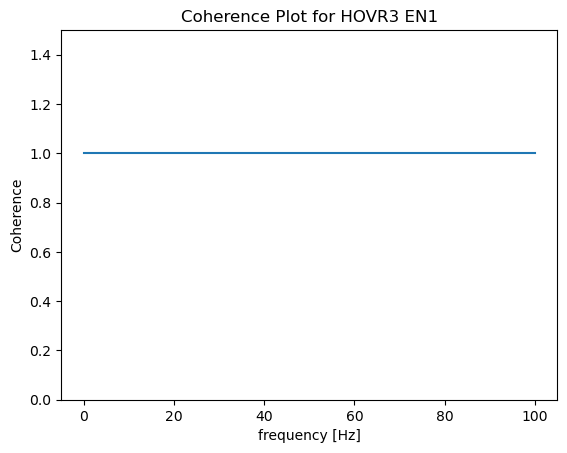

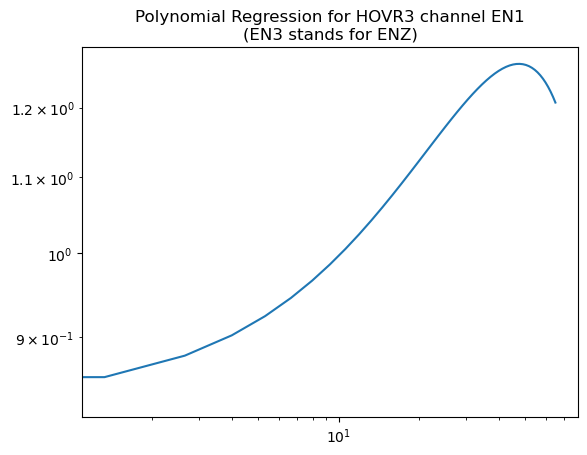

HOVR4


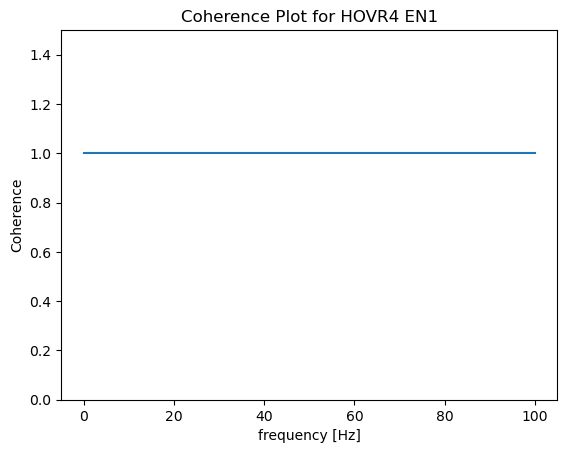

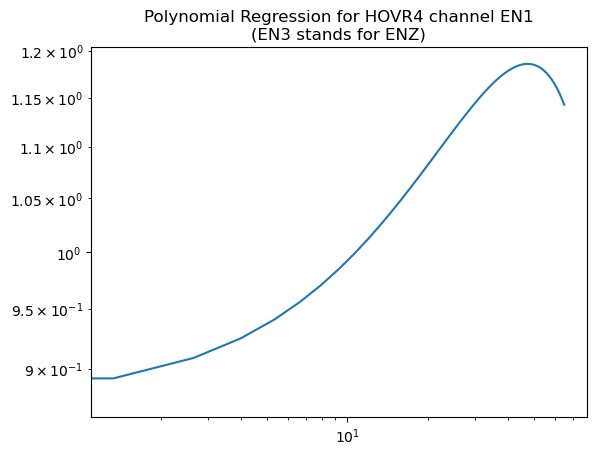

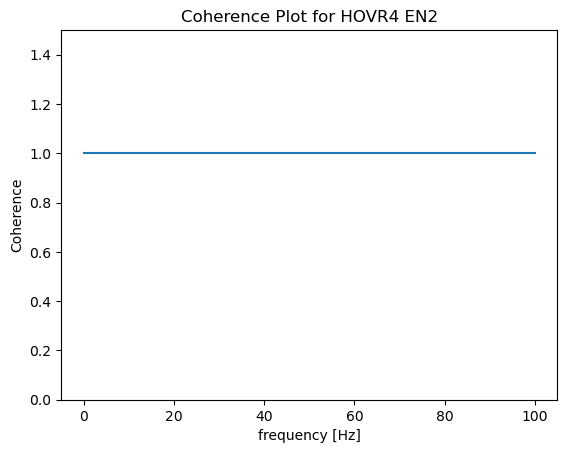

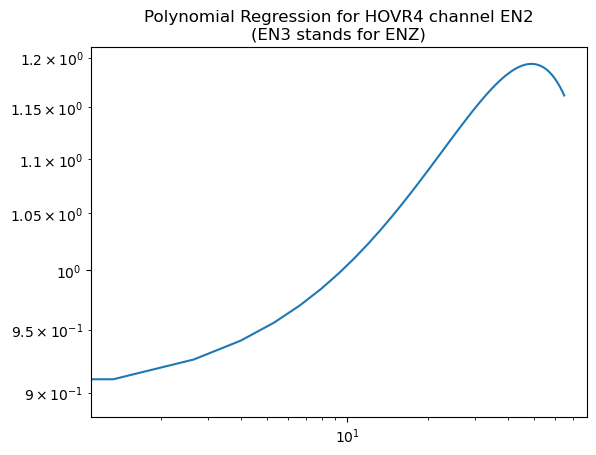

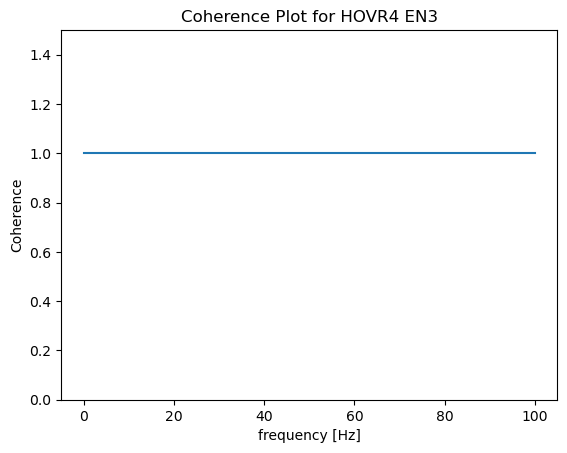

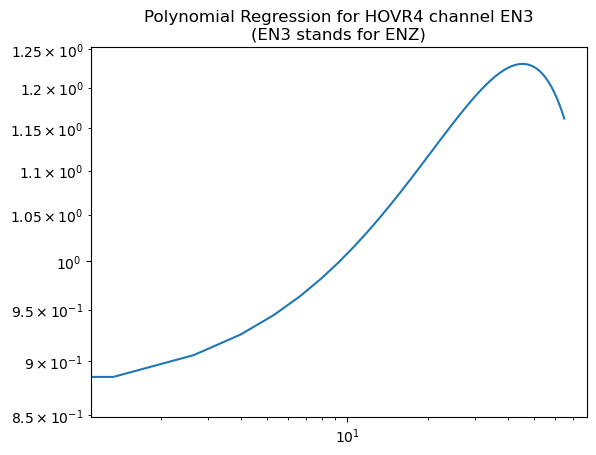

HOVR5


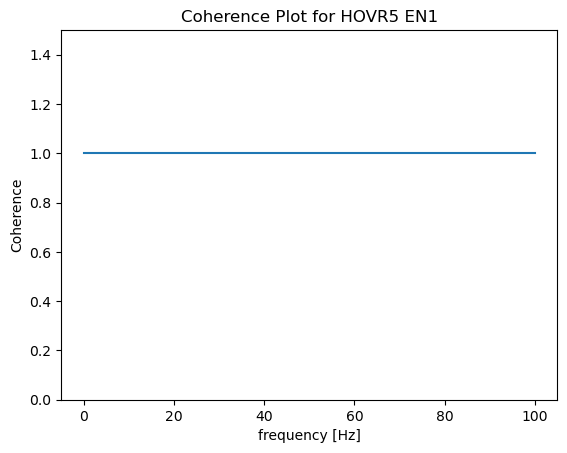

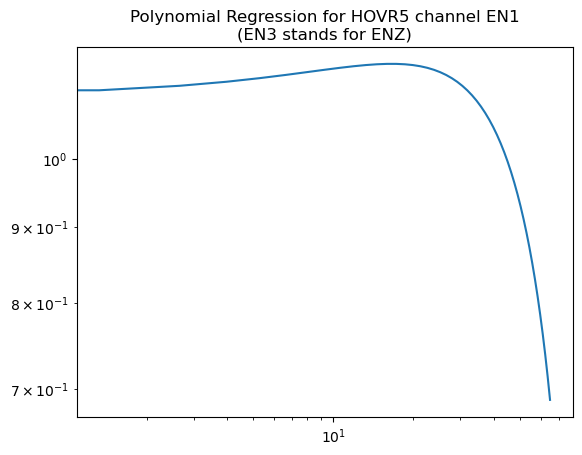

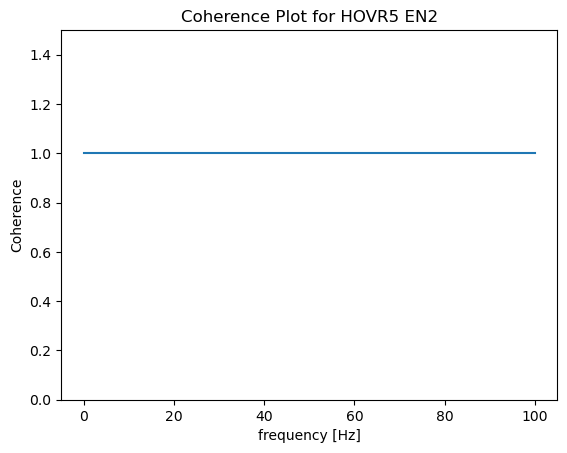

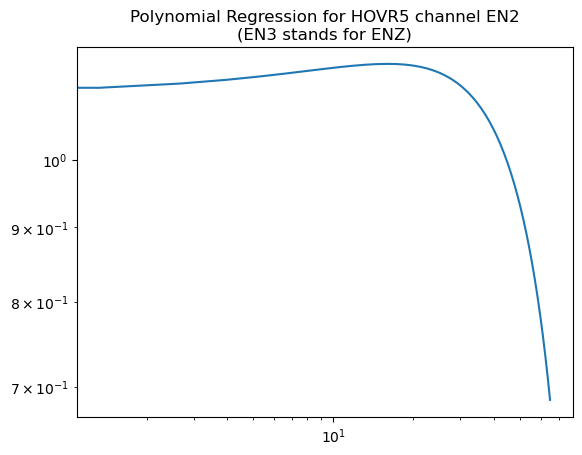

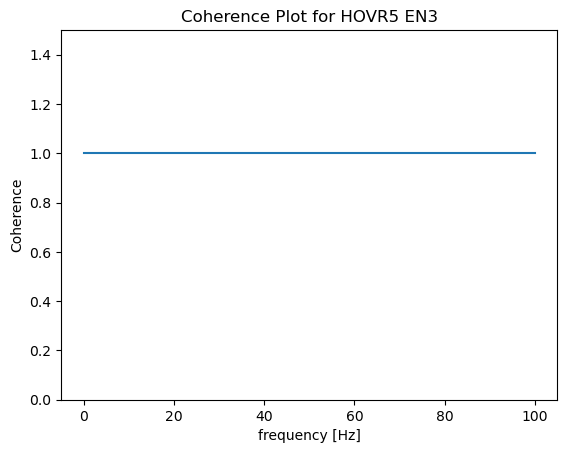

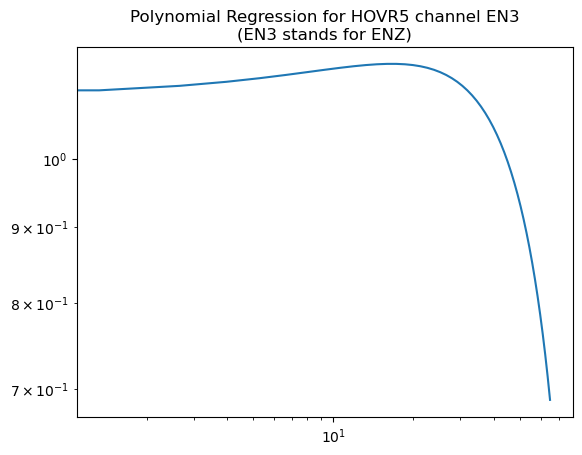

HOVR6


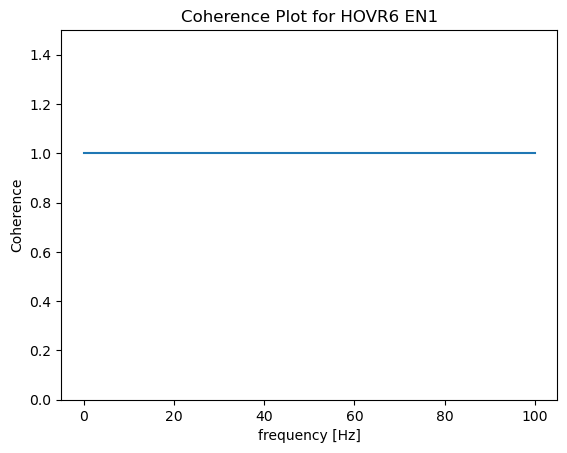

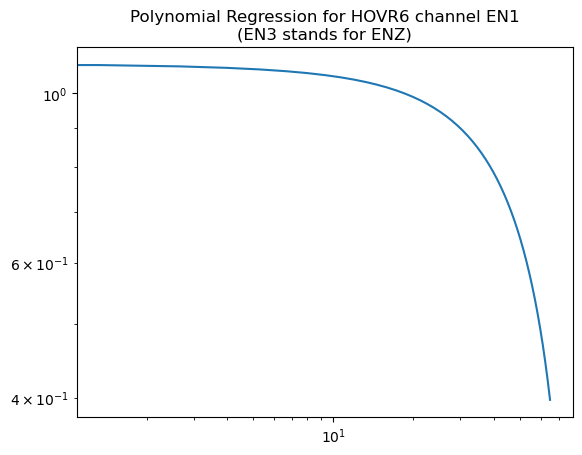

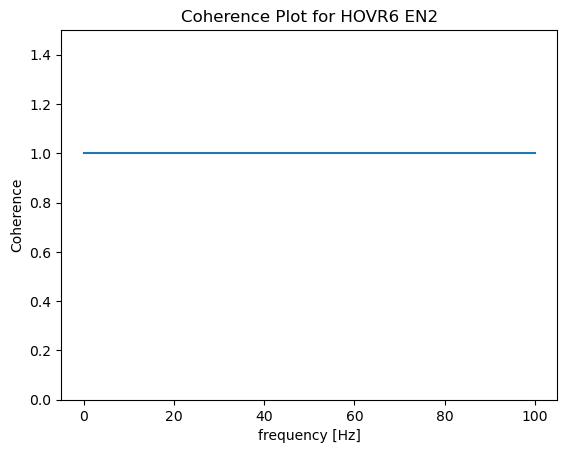

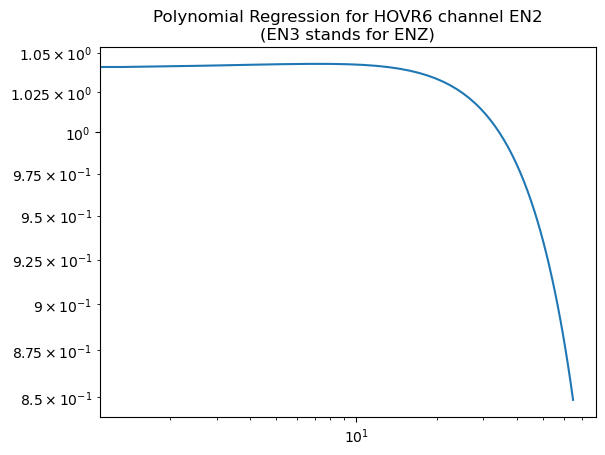

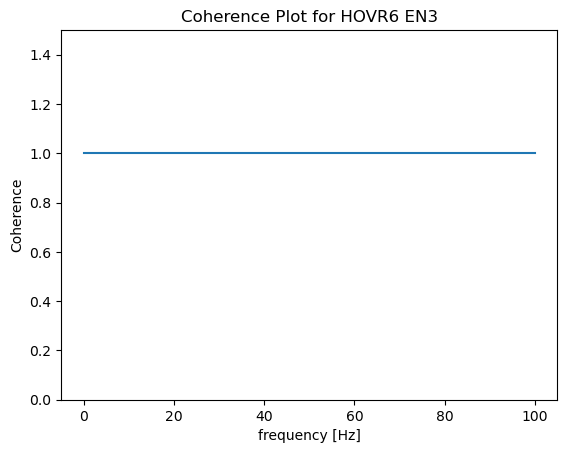

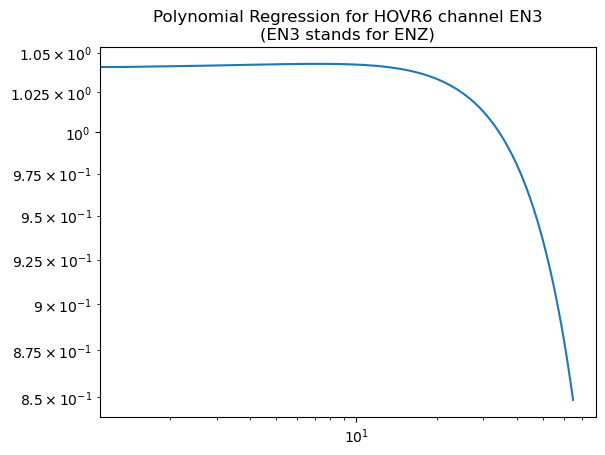

{'HOVR': [-0.9503234173259364, 0.9464970335880317, -1.0003060973694653],
 'HOVR1': [-0.9998789213838319, -0.9998785016954175, -0.9998784940942876],
 'HOVR3': [1.0000567954724395],
 'HOVR4': [1.0, 1.0, 1.0],
 'HOVR5': [-0.9999099293102696, -0.9999099293102695, -0.9999099293102696],
 'HOVR6': [1.00004624224211, 1.0000388883407607, 1.0000388883407607]}

In [119]:
def spectral_ratio_finder(station_dict_log,station_dict_sens):
    import numpy as np
    #Make two new dictionaries for the spectral ratios and model coefficients. 
    coeff_dict = {}
    ratio_dict = {}
    #Loop through the stations of atlogger
    for station in (station_dict_log):
        #Print the station Id and make two new lists for the ratios and coefficients
        print(station)
        channel_coef_ls = []
        ratio_list = []
        #Loop through the channels of a given atlogger stations
        for i, channel in enumerate(station_dict_log[station]):
            #Get the waveforms from the atlogger/sensor
            powerarrlog = channel
            powerarrsens = station_dict_sens[station][i]
            #Perform a coherence measurement on the waveforms 
            f,cxy = signal.coherence(powerarrsens,powerarrlog,fs=200,nperseg=1024)
            plt.plot(f,cxy)
            plt.title(f'Coherence Plot for {station} EN{i+1}')
            plt.xlabel('frequency [Hz]')
            plt.ylabel('Coherence')
            plt.ylim([0,1.5])
            plt.show()
            atlog_tr = Trace(powerarrlog)
            atsens_tr = Trace(powerarrsens)
            tr_list = [atlog_tr,atsens_tr]
            atlog_tr.stats.sampling_rate = 200
            atsens_tr.stats.sampling_rate = 200
            psd_list = []
            amp_max_list = []
            for tr in tr_list:
                tr.detrend('demean')
                tr.detrend('simple')
                tr.taper(type='cosine',max_percentage=0.1,side='both')
                max = tr.max()
                amp_max_list.append(max)
                tr_fft = np.fft.fft(tr.data)
                fft00= len(tr_fft)
                if fft00 % 2 == 0:
                    fftn2 = int(fft00/2)
                else:
                    fftn2 = int((fft00-1)/2)
                df = tr.stats.sampling_rate
                df2 = int(df/2)
                tr_fft = tr_fft[0:fftn2]
                freq_axis = np.linspace(0,df2,fftn2)
                scale = 2.0/((fft00-1)*(fft00-1))
                tr_psd = scale*abs2(tr_fft)
                freq_axis = float64(freq_axis)
                tr_psd = float64(tr_psd)
                psd_list.append(tr_fft)
            ratio = np.abs(psd_list[1])/np.abs(psd_list[0])
            amp_ratio = amp_max_list[1]/amp_max_list[0]
            x = np.arange(0,len(ratio[0:65]))
            smoothed_ratio = smooth(ratio,15)
            fig = px.line(smoothed_ratio,log_x=True,log_y=True,title=f'Spectral ratios for {station} channel EN{i+1}')
            fig.update_xaxes(range = [0.1,2.2])
            fig.show()
            model = np.poly1d(np.polyfit(x,smoothed_ratio[0:65],2))
            channel_coef_ls.append(model.coefficients)
            ratio_list.append(amp_ratio)
            myline = np.linspace(0,len(smoothed_ratio[0:65]))
            plt.loglog(myline, model(myline))
            plt.title(f"""Polynomial Regression for {station} channel EN{i+1}
(EN3 stands for ENZ)""")
            plt.show()
        coeff_dict[f'{station}'] = channel_coef_ls
        ratio_dict[f'{station}'] = ratio_list
    return(coeff_dict,ratio_dict)
coeff_dict,ratio_dict = spectral_ratio_finder(station_dict_atlog,station_dict_atsens)
#NOTE: EN1 on HOVR3 is actually EN2
ratio_dict

In [90]:
ratio_dict

{'HOVR': [-0.9503234173259364, 0.9464970335880317, -1.0003060973694653],
 'HOVR1': [-0.9998789213838319, -0.9998785016954175, -0.9998784940942876],
 'HOVR3': [1.0000567954724395],
 'HOVR4': [1.0, 1.0, 1.0],
 'HOVR5': [-0.9999099293102696, -0.9999099293102695, -0.9999099293102696],
 'HOVR6': [1.00004624224211, 1.0000388883407607, 1.0000388883407607]}

HOVR


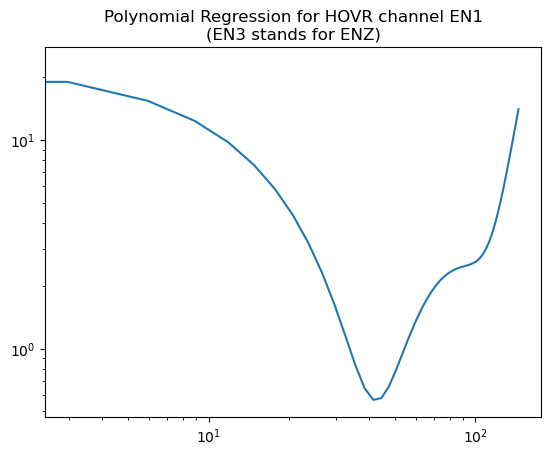

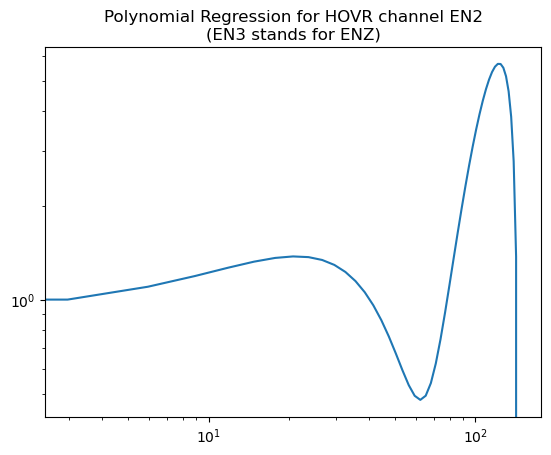

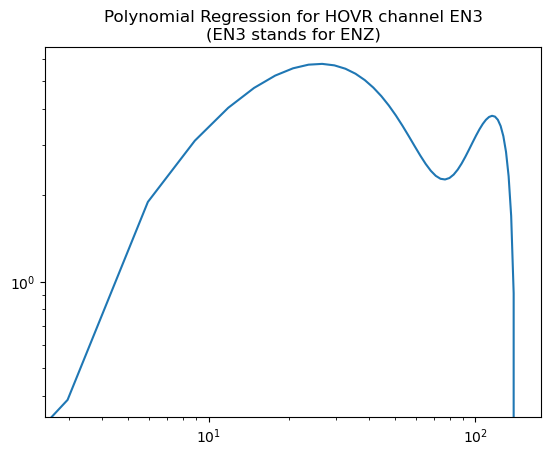

HOVR1


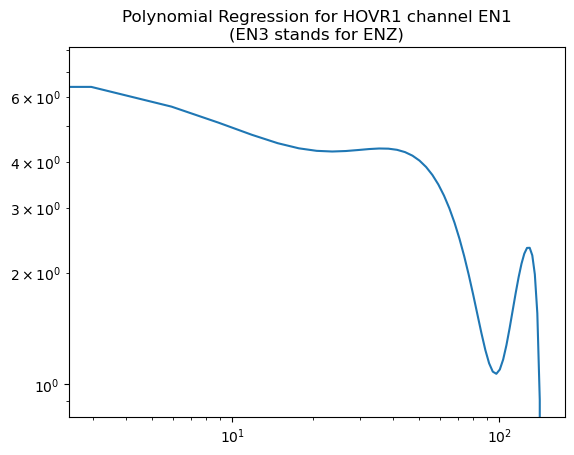

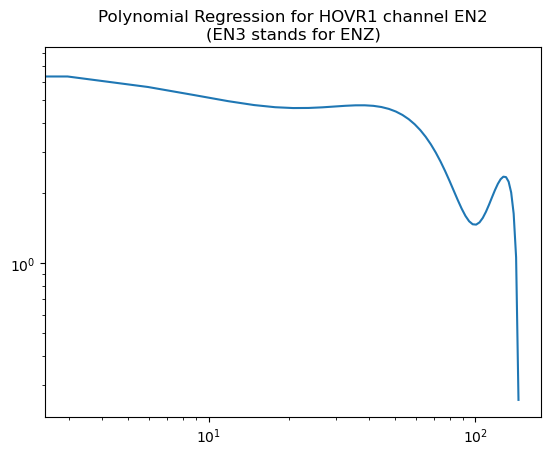

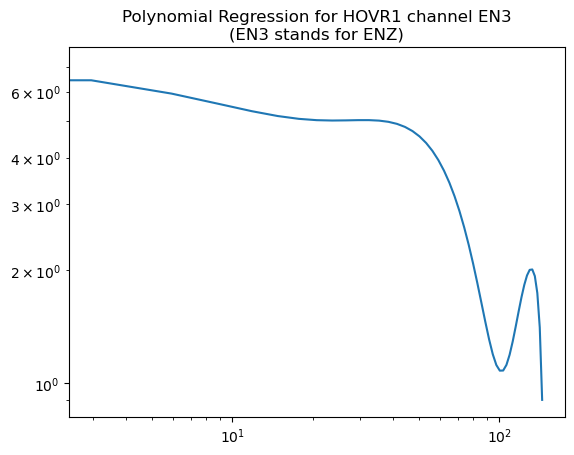

HOVR3


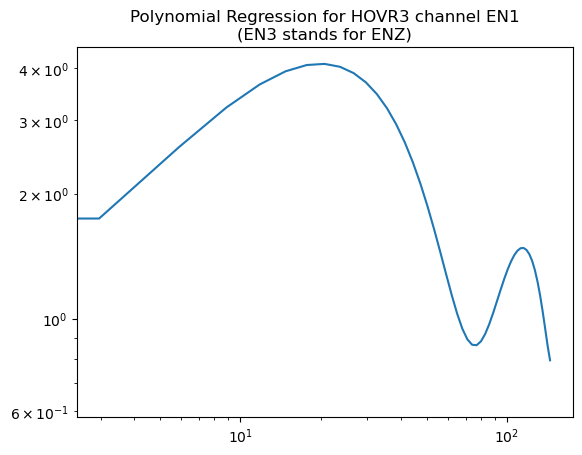

HOVR4


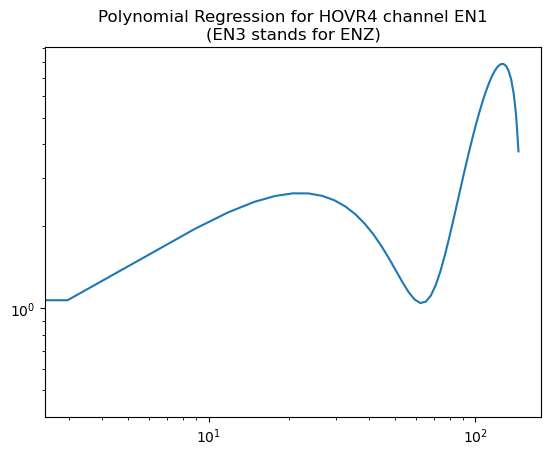

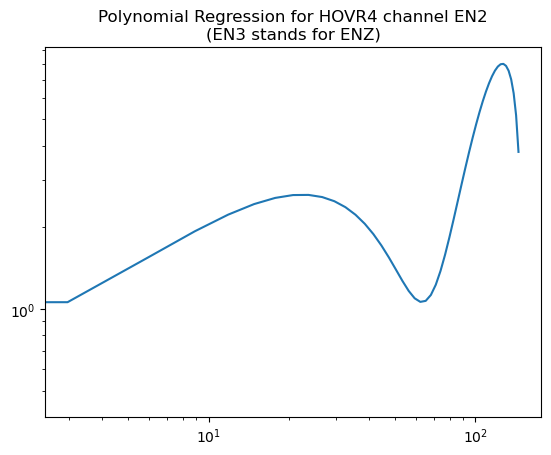

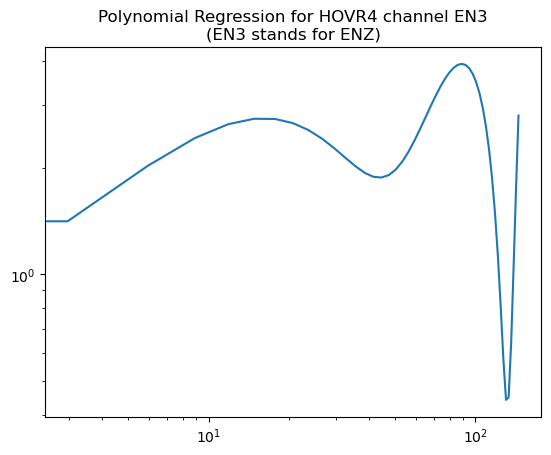

HOVR5


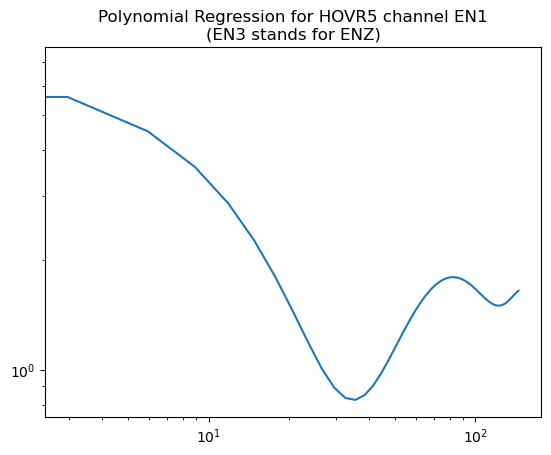

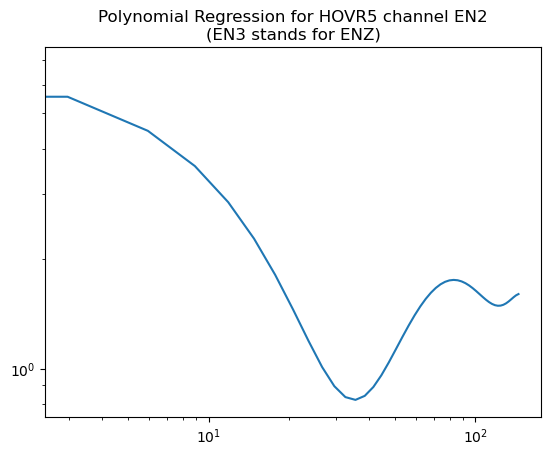

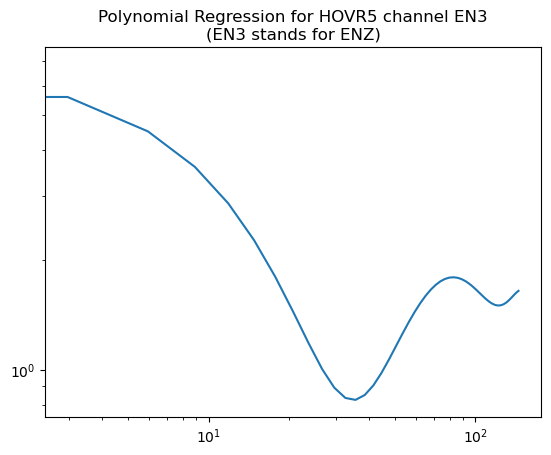

HOVR6


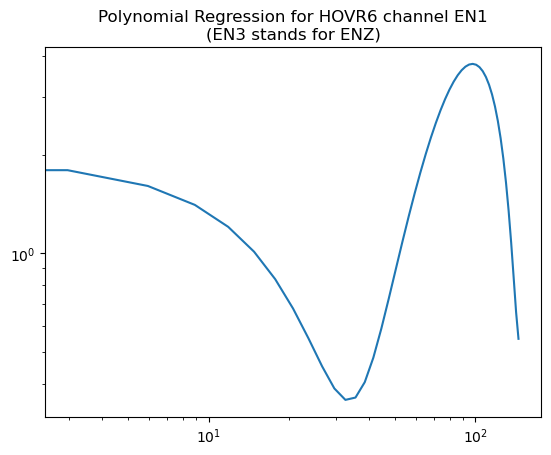

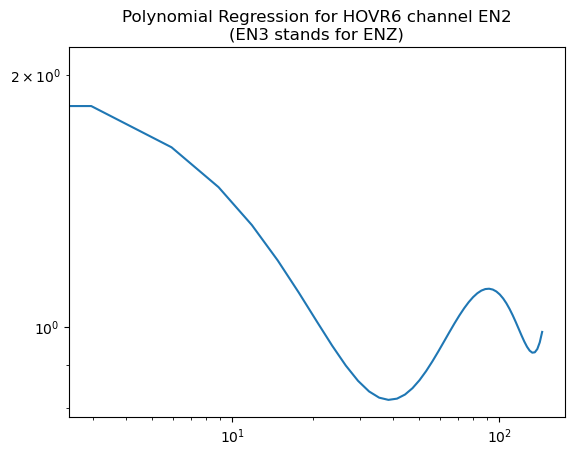

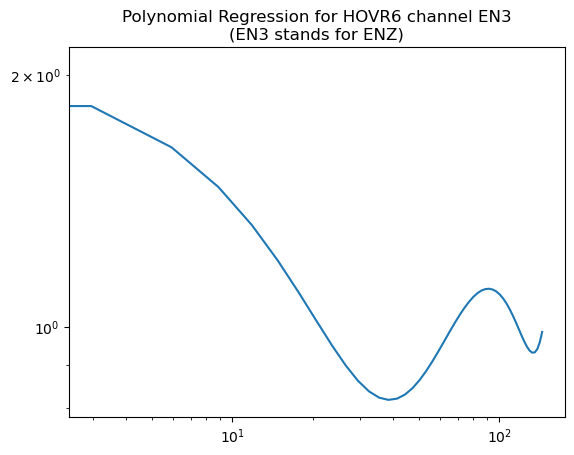

In [28]:
def spectral_ratio_finder(station_dict_log,station_dict_sens):
    import numpy as np
    for station in (station_dict_log):
        print(station)
        for i, channel in enumerate(station_dict_log[station]):
            powerarrlog = channel
            powerarrsens = station_dict_sens[station][i]
            atlog_tr = Trace(powerarrlog)
            atsens_tr = Trace(powerarrsens)
            tr_list = [atlog_tr,atsens_tr]
            atlog_tr.stats.sampling_rate = 200
            atsens_tr.stats.sampling_rate = 200
            psd_list = []
            for tr in tr_list:
                tr.detrend('demean')
                tr.detrend('simple')
                tr.taper(type='cosine',max_percentage=0.1,side='both')
                tr_fft = np.fft.fft(tr.data)
                fft00= len(tr_fft)
                if fft00 % 2 == 0:
                    fftn2 = int(fft00/2)
                else:
                    fftn2 = int((fft00-1)/2)
                df = tr.stats.sampling_rate
                df2 = int(df/2)
                tr_fft = tr_fft[0:fftn2]
                freq_axis = np.linspace(0,df2,fftn2)
                scale = 2.0/((fft00-1)*(fft00-1))
                tr_psd = scale*abs2(tr_fft)
                freq_axis = float64(freq_axis)
                tr_psd = float64(tr_psd)
                psd_list.append(tr_psd)
            ratio = np.abs(psd_list[1])/np.abs(psd_list[0])
            x = np.arange(0,len(ratio[20:165]))
            smoothed_ratio = smooth(ratio,15)
            fig = px.line(smoothed_ratio,log_x=True,log_y=True,title=f'Spectral ratios for {station} channel EN{i+1}')
            fig.update_xaxes(range = [0.1,2.2])
            fig.show()
            model = np.poly1d(np.polyfit(x,smoothed_ratio[20:165],5))
            myline = np.linspace(0,len(smoothed_ratio[20:165]))
            plt.loglog(myline, model(myline))
            plt.title(f"""Polynomial Regression for {station} channel EN{i+1}
(EN3 stands for ENZ)""")
            plt.show()
    return(smoothed_ratio)
ratio = spectral_ratio_finder(station_dict_atlog,station_dict_atsens)

# Subspace Detection

In [29]:
for j, station in enumerate(station_dict_atlog):
    for i, channel in enumerate(station_dict_atlog[station]):
        if j == 0:
            tr = Trace(channel)
            tr.stats.samplilng_rate = 200
            tr.write(f'Template_waveforms/atlogger{station+str(i+1)}.MSEED',format='MSEED')
        else:
            tr = Trace(channel)
            tr.stats.sampling_rate = 200
            k = str(j)+str(i+1)
            tr.write(f'Template_waveforms/atlogger{station+k}.MSEED',format='MSEED')
for j, station in enumerate(station_dict_atsens):
    for i, channel in enumerate(station_dict_atsens[station]):
        if j == 0:
            tr = Trace(channel)
            tr.stats.sampling_rate = 200
            tr.write(f'Template_waveforms/atsensor{station+str(i+1)}.MSEED',format='MSEED')
        else:
            tr = Trace(channel)
            tr.stats.sampling_rate = 200
            k = str(j)+str(i+1)
            tr.write(f'Template_waveforms/atsensor{station+k}.MSEED',format='MSEED')

In [30]:
from eqcorrscan.core import subspace
detector = subspace.Detector()

In [31]:
from obspy import read
import glob
import os
from eqcorrscan import tests
# Get the path for the test-data so we can test this
wavefiles = glob.glob('Template_waveforms/*')
wavefiles.sort()  # Sort the wavefiles to ensure reproducibility
streams = [read(w) for w in wavefiles]
streams[0][0].stats.sampling_rate = 200
streams[4][0].stats.sampling_rate = 200
streams[5][0].stats.sampling_rate = 200
# Channels must all be the same length
detector.construct(streams=streams, lowcut=2, highcut=9, filt_order=4,
                    sampling_rate=20, multiplex=True, name='Test_1',
                    align=True, shift_len=0.5, reject=0.2)

Detector: Test_1

In [32]:
streamey = read('Hoover_cals/HooverCals/Atlogger/HOVR2/EN2.D/347/LE.HOVR2.11.EN2.D.2022.347.22')
tr = streamey[0]
dab = tr.data
data = dab[0:1201]
streamey = Trace(data)
streamey = Stream(streamey)
detections = detector.detect(st = streamey, threshold=0.5,trig_int=3)
print(detector.energy_capture())
detections

100


[Detection(template name = Test_1 
  detection id = Test_1_19700101_000002200000 
  detection time = 1970-01-01T00:00:02.200000Z 
  number of channels = 1 
  channels = [('', '')] 
  detection value = 1.0 
  threshold = 0.5 
  threshold type = abs 
  input threshold = 0.5 
  detection type = subspace),
 Detection(template name = Test_1 
  detection id = Test_1_19700101_000005800000 
  detection time = 1970-01-01T00:00:05.800000Z 
  number of channels = 1 
  channels = [('', '')] 
  detection value = 1.0 
  threshold = 0.5 
  threshold type = abs 
  input threshold = 0.5 
  detection type = subspace),
 Detection(template name = Test_1 
  detection id = Test_1_19700101_000008950000 
  detection time = 1970-01-01T00:00:08.950000Z 
  number of channels = 1 
  channels = [('', '')] 
  detection value = 1.0 
  threshold = 0.5 
  threshold type = abs 
  input threshold = 0.5 
  detection type = subspace),
 Detection(template name = Test_1 
  detection id = Test_1_19700101_000012800000 
  dete